In [101]:
from subgrounds import Subgrounds
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [105]:
SUBGRAPH_API_URL = "https://api.thegraph.com/subgraphs/name/papercliplabs/compound-v3"

sg = Subgrounds()

comp_v3 = sg.load_subgraph(SUBGRAPH_API_URL)

print(date.today())

/Users/spencerperkins/.pyenv/versions/3.10.1/lib/python3.10/json/decoder.py:353: ResourceWarning: unclosed <ssl.SSLSocket fd=74, family=AddressFamily.AF_INET6, type=SocketKind.SOCK_STREAM, proto=0, laddr=('2604:3d08:1184:6900:d03b:e94f:d2be:b334', 62992, 0, 0), raddr=('2606:4700:4400::ac40:93e1', 443, 0, 0)>
  obj, end = self.scan_once(s, idx)


2023-10-10


In [104]:
# Protocol Current

protocols = comp_v3.Query.protocols()

overview_df = sg.query_df([protocols])
print("Overview")
display(overview_df.T)

markets_df = sg.query_df([protocols.markets])
print("Market Proxy Addresses")
display(markets_df)

accounting_df = sg.query_df([protocols.accounting])
print("Accounting")
display(accounting_df.T)

usage_df = sg.query_df([protocols.cumulativeUsage])
print("Usage")
display(usage_df.T)

Overview


0
protocols_id                          0x316f9708bb98af7da9c68c1c3b5e79039cd336e3
protocols_configuratorProxy           0x316f9708bb98af7da9c68c1c3b5e79039cd336e3
protocols_configuratorImplementation  0xcfc1fa6b7ca982176529899d99af6473ad80df4f
protocols_accounting_id               0x316f9708bb98af7da9c68c1c3b5e79039cd336e3
protocols_cumulativeUsage_id            0x50524f544f434f4c5f43554d554c4154495645

Market Proxy Addresses


protocols_markets_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
1  0xc3d688b66703497daa19211eedff47f25384cdc3   

                 protocols_markets_cometProxy  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
1  0xc3d688b66703497daa19211eedff47f25384cdc3   

                protocols_markets_protocol_id  \
0  0x316f9708bb98af7da9c68c1c3b5e79039cd336e3   
1  0x316f9708bb98af7da9c68c1c3b5e79039cd336e3   

   protocols_markets_creationBlockNumber  \
0                               16477039   
1                               15331596   

           protocols_markets_configuration_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
1  0xc3d688b66703497daa19211eedff47f25384cdc3   

              protocols_markets_accounting_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
1  0xc3d688b66703497daa19211eedff47f25384cdc3   

                                           protocols_markets_cumulativeUsage_id  
0  0x4d41524b45545f43554d554c4154495645a17581a9e3356d9a858b789d68b4d866e593ae94  
1  0x4d41524b45545f43554d554c4154495645c3d688b66703497daa19211eedff47f25384cdc3

Accounting


0
protocols_accounting_id                            0x316f9708bb98af7da9c68c1c3b5e79039cd336e3
protocols_accounting_protocol_id                   0x316f9708bb98af7da9c68c1c3b5e79039cd336e3
protocols_accounting_lastUpdatedBlock                                                18318841
protocols_accounting_totalSupplyUsd                                          414248675.972355
protocols_accounting_totalBorrowUsd                                          353943626.824132
protocols_accounting_reserveBalanceUsd                                         4230800.633822
protocols_accounting_collateralBalanceUsd                                    673265788.951198
protocols_accounting_collateralReservesBalanceUsd                                   70.717773
protocols_accounting_totalReserveBalanceUsd                                    4230871.351595
protocols_accounting_utilization                                                     0.854423
protocols_accounting_collateralization                                                1.17038
protocols_accounting_avgSupplyApr                                                    0.028471
protocols_accounting_avgBorrowApr                                                    0.038981
protocols_accounting_avgRewardSupplyApr                                               0.01202
protocols_accounting_avgRewardBorrowApr                                              0.016387
protocols_accounting_avgNetSupplyApr                                                 0.040492
protocols_accounting_avgNetBorrowApr                                                 0.022594

Usage


0
protocols_cumulativeUsage_id                         0x50524f544f434f4c5f43554d554c4154495645
protocols_cumulativeUsage_protocol_id              0x316f9708bb98af7da9c68c1c3b5e79039cd336e3
protocols_cumulativeUsage_uniqueUsersCount                                               7595
protocols_cumulativeUsage_transactionCount                                              39238
protocols_cumulativeUsage_supplyBaseCount                                                9467
protocols_cumulativeUsage_withdrawBaseCount                                             11079
protocols_cumulativeUsage_liquidationCount                                                181
protocols_cumulativeUsage_supplyCollateralCount                                         13184
protocols_cumulativeUsage_withdrawCollateralCount                                        5285
protocols_cumulativeUsage_transferCollateralCount                                          42

In [45]:
# Market Current

markets = comp_v3.Query.markets()
markets_info = sg.query_df([markets.id, markets.configuration.name])

for index, row in markets_info.iterrows():
    market_name = row["markets_configuration_name"]
    market_id = row["markets_id"]
    print(market_name)

    market = comp_v3.Query.market(id=market_id)

    overview_df = sg.query_df([market])
    print(f"{market_name} - Overview")
    display(overview_df.T)

    config_df = sg.query_df([market.configuration])
    print(f"{market_name} - Config")
    display(config_df.T)

    accounting_df = sg.query_df([market.accounting])
    print(f"{market_name} - Accounting")
    display(accounting_df.T)

    collateral_bal_df = sg.query_df([market.collateralBalances.collateralToken.token.address, 
                                     market.collateralBalances.collateralToken.token.symbol, 
                                     market.collateralBalances.collateralToken, 
                                     market.collateralBalances])

    print(f"{market_name} - Collateral Balances")
    display(collateral_bal_df.T)

    usage_df = sg.query_df([market.cumulativeUsage])
    print(f"{market_name} - Usage")
    display(usage_df.T)

    positions_df = sg.query_df([market.positions])
    print(f"{market_name} - Positions")
    display(positions_df)

    interaction_df = sg.query_df([market.supplyBaseInteractions, 
                                market.withdrawBaseInteractions, 
                                market.absorbDebtInteractions,
                                market.supplyCollateralInteractions,
                                market.withdrawCollateralInteractions,
                                market.transferCollateralInteractions,
                                market.absorbCollateralInteractions])
    print(f"{market_name} - Interactions")
    [display(df) for df in interaction_df]

Compound WETH
Compound WETH - Overview


0
market_id                          0xa17581a9e3356d9a858b789d68b4d866e593ae94
market_cometProxy                  0xa17581a9e3356d9a858b789d68b4d866e593ae94
market_protocol_id                 0x316f9708bb98af7da9c68c1c3b5e79039cd336e3
market_creationBlockNumber                                           16477039
market_configuration_id            0xa17581a9e3356d9a858b789d68b4d866e593ae94
market_accounting_id               0xa17581a9e3356d9a858b789d68b4d866e593ae94
market_cumulativeUsage_id   0x4d41524b45545f43554d554c4154495645a17581a9e3...

Compound WETH - Config


0
market_configuration_id                                    0xa17581a9e3356d9a858b789d68b4d866e593ae94
market_configuration_market_id                             0xa17581a9e3356d9a858b789d68b4d866e593ae94
market_configuration_cometImplementation                   0x7a1316220a46dce22fd5c6d55a39513367e6c967
market_configuration_lastConfigurationUpdateBlo...                                           17972006
market_configuration_name                                                               Compound WETH
market_configuration_symbol                                                                   cWETHv3
market_configuration_factory                               0xa7f7de6ccad4d83d81676717053883337ac2c1b4
market_configuration_governor                              0x6d903f6003cca6255d85cca4d3b5e5146dc33925
market_configuration_pauseGuardian                         0xbbf3f1421d886e9b2c5d716b5192ac998af2012c
market_configuration_extensionDelegate                     0xe2c1f54aff6b38fd9df7a69f22cb5fd3ba09f030
market_configuration_supplyKink                                                                   0.9
market_configuration_supplyPerSecondInterestRat...                                          900000000
market_configuration_supplyPerSecondInterestRat...                                        19236960001
market_configuration_supplyPerSecondInterestRat...                                                  0
market_configuration_borrowKink                                                                   0.9
market_configuration_borrowPerSecondInterestRat...                                         1173262303
market_configuration_borrowPerSecondInterestRat...                                        16398719999
market_configuration_borrowPerSecondInterestRat...                                          315360529
market_configuration_storeFrontPriceFactor                                        1000000000000000000
market_configuration_trackingIndexScale                                              1000000000000000
market_configuration_baseTrackingSupplySpeed                                             810185185185
market_configuration_baseTrackingBorrowSpeed                                                        0
market_configuration_baseMinForRewards                                         1000000000000000000000
market_configuration_baseBorrowMin                                                 100000000000000000
market_configuration_targetReserves                                            5000000000000000000000
market_configuration_baseToken_id                   0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...

Compound WETH - Accounting


0
market_accounting_id                                0xa17581a9e3356d9a858b789d68b4d866e593ae94
market_accounting_market_id                         0xa17581a9e3356d9a858b789d68b4d866e593ae94
market_accounting_lastAccountingUpdatedBlockNumber                                    18314678
market_accounting_baseSupplyIndex                                             1011956323729352
market_accounting_baseBorrowIndex                                             1028169419650378
market_accounting_trackingSupplyIndex                                          323020094273823
market_accounting_trackingBorrowIndex                                                        0
market_accounting_lastAccrualTime                                                   1696875815
market_accounting_totalBasePrincipalSupply                             39474502429674151208372
market_accounting_totalBasePrincipalBorrow                             26132414652405517426006
market_accounting_baseReserveBalance                                     671461677785395321888
market_accounting_totalBaseSupply                                      39946472359778427441057
market_accounting_totalBaseBorrow                                      26868549607226815381093
market_accounting_totalBaseSupplyUsd                                           63099447.739506
market_accounting_totalBaseBorrowUsd                                           42441560.959575
market_accounting_baseReserveBalanceUsd                                          1060640.86623
market_accounting_collateralBalanceUsd                                         58531720.039122
market_accounting_collateralReservesBalanceUsd                                             0.0
market_accounting_totalReserveBalanceUsd                                         1060640.86623
market_accounting_utilization                                                         0.672614
market_accounting_collateralization                                                   1.486737
market_accounting_supplyApr                                                            0.01909
market_accounting_borrowApr                                                           0.034832
market_accounting_rewardSupplyApr                                                      0.01679
market_accounting_rewardBorrowApr                                                          0.0
market_accounting_netSupplyApr                                                         0.03588
market_accounting_netBorrowApr                                                        0.034832

Compound WETH - Collateral Balances


0  \
market_collateralBalances_collateralToken_token...         0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0   
market_collateralBalances_collateralToken_token...                                             wstETH   
market_collateralBalances_collateralToken_id        0xa17581a9e3356d9a858b789d68b4d866e593ae947f39...   
market_collateralBalances_collateralToken_creat...                                           16477039   
market_collateralBalances_collateralToken_marke...         0xa17581a9e3356d9a858b789d68b4d866e593ae94   
market_collateralBalances_collateralToken_token_id         0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0   
market_collateralBalances_collateralToken_lastC...                                           17972006   
market_collateralBalances_collateralToken_price...         0x4f67e4d9bd67efa28236013288737d39aef48e79   
market_collateralBalances_collateralToken_borro...                                                0.9   
market_collateralBalances_collateralToken_liqui...                                               0.93   
market_collateralBalances_collateralToken_liqui...                                              0.975   
market_collateralBalances_collateralToken_suppl...                            64500000000000000000000   
market_collateralBalances_collateralToken_lastP...                                        1804.016568   
market_collateralBalances_collateralToken_lastP...                                           18314678   
market_collateralBalances_id                        0xa17581a9e3356d9a858b789d68b4d866e593ae947f39...   
market_collateralBalances_creationBlockNumber                                                16477039   
market_collateralBalances_market_id                        0xa17581a9e3356d9a858b789d68b4d866e593ae94   
market_collateralBalances_lastUpdateBlockNumber                                              18312961   
market_collateralBalances_balance                                             32416740323752573671366   
market_collateralBalances_reserves                                                                  0   
market_collateralBalances_balanceUsd                                                  58480336.621102   
market_collateralBalances_reservesUsd                                                             0.0   

                                                                                                    1  
market_collateralBalances_collateralToken_token...         0xbe9895146f7af43049ca1c1ae358b0541ea49704  
market_collateralBalances_collateralToken_token...                                              cbETH  
market_collateralBalances_collateralToken_id        0xa17581a9e3356d9a858b789d68b4d866e593ae94be98...  
market_collateralBalances_collateralToken_creat...                                           16477039  
market_collateralBalances_collateralToken_marke...         0xa17581a9e3356d9a858b789d68b4d866e593ae94  
market_collateralBalances_collateralToken_token_id         0xbe9895146f7af43049ca1c1ae358b0541ea49704  
market_collateralBalances_collateralToken_lastC...                                           17972006  
market_collateralBalances_collateralToken_price...         0x23a982b74a3236a5f2297856d4391b2edbbb5549  
market_collateralBalances_collateralToken_borro...                                                0.9  
market_collateralBalances_collateralToken_liqui...                                               0.93  
market_collateralBalances_collateralToken_liqui...                                              0.975  
market_collateralBalances_collateralToken_suppl...                            40000000000000000000000  
market_collateralBalances_collateralToken_lastP...                                         1658.14621  
market_collateralBalances_collateralToken_lastP...                                           18314678  
market_collateralBalances_id                        0xa17581a9e3356d9a858b789d68b4d866e593ae94be98...  
market_collateralBal

Compound WETH - Usage


0
market_cumulativeUsage_id                       0x4d41524b45545f43554d554c4154495645a17581a9e3...
market_cumulativeUsage_protocol_id                     0x316f9708bb98af7da9c68c1c3b5e79039cd336e3
market_cumulativeUsage_uniqueUsersCount                                                      1309
market_cumulativeUsage_transactionCount                                                      5267
market_cumulativeUsage_supplyBaseCount                                                       1893
market_cumulativeUsage_withdrawBaseCount                                                     1605
market_cumulativeUsage_liquidationCount                                                         0
market_cumulativeUsage_supplyCollateralCount                                                 1108
market_cumulativeUsage_withdrawCollateralCount                                                656
market_cumulativeUsage_transferCollateralCount                                                  5

Compound WETH - Positions


market_positions_id  \
0   0xa17581a9e3356d9a858b789d68b4d866e593ae940000...   
1   0xa17581a9e3356d9a858b789d68b4d866e593ae940041...   
2   0xa17581a9e3356d9a858b789d68b4d866e593ae94007e...   
3   0xa17581a9e3356d9a858b789d68b4d866e593ae9400ba...   
4   0xa17581a9e3356d9a858b789d68b4d866e593ae9400d5...   
..                                                ...   
95  0xa17581a9e3356d9a858b789d68b4d866e593ae941649...   
96  0xa17581a9e3356d9a858b789d68b4d866e593ae94166d...   
97  0xa17581a9e3356d9a858b789d68b4d866e593ae941671...   
98  0xa17581a9e3356d9a858b789d68b4d866e593ae9416aa...   
99  0xa17581a9e3356d9a858b789d68b4d866e593ae9416be...   

    market_positions_creationBlockNumber  \
0                               18067486   
1                               17865134   
2                               18194568   
3                               17837590   
4                               17614554   
..                                   ...   
95                              16973878   
96                              16659392   
97                              17436272   
98                              18085556   
99                              18026966   

                    market_positions_market_id  \
0   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
1   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
2   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
3   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
4   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
..                                         ...   
95  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
96  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
97  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
98  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
99  0xa17581a9e3356d9a858b789d68b4d866e593ae94   

                   market_positions_account_id  \
0   0x000007656f345a789bb422f0307d826660258333   
1   0x0041df1e2c32ced11bf89ed72ca090b51970b736   
2   0x007ec2e6218702e8ed4e17ce8479c8f178efb867   
3   0x00ba3ca0b6df1486c912893d9f288311a60ed753   
4   0x00d5f0f74e4b8df62eafc7e5d5cdca2ede556e8e   
..                                         ...   
95  0x1649805770d7e30906e3d6695b8faf226e3b5269   
96  0x166d51d2834856aeb852ebdf7b77b6148f0eae22   
97  0x1671b592610fb7427ed788b66fa3e9217ff41047   
98  0x16aa9154557f1394089db90d3cbe212d9a7f33bb   
99  0x16bef93d578a0089c750bfcfa49bf4bb310047e6   

                       market_positions_accounting_id  
0   0xa17581a9e3356d9a858b789d68b4d866e593ae940000...  
1   0xa17581a9e3356d9a858b789d68b4d866e593ae940041...  
2   0xa17581a9e3356d9a858b789d68b4d866e593ae94007e...  
3   0xa17581a9e3356d9a858b789d68b4d866e593ae9400ba...  
4   0xa17581a9e3356d9a858b789d68b4d866e593ae9400d5...  
..                                                ...  
95  0xa17581a9e3356d9a858b789d68b4d866e593ae941649...  
96  0xa17581a9e3356d9a858b789d68b4d866e593ae94166d...  
97  0xa17581a9e3356d9a858b789d68b4d866e593ae941671...  
98  0xa17581a9e3356d9a858b789d68b4d866e593ae9416aa...  
99  0xa17581a9e3356d9a858b789d68b4d866e593ae9416be...  

[100 rows x 5 columns]

Compound WETH - Interactions


market_supplyBaseInteractions_id  \
0   0x001feedec2af4fdc9b8a9a3fba8dd80a7298e9ec782e...   
1   0x0022400f2df9e602c8e831c723a31c1e01b681fe9823...   
2   0x0034d64278cbe44c7df4b441ae389147ef40b3f5f4fb...   
3   0x00785e14be72f0f193292e6a98b213b5ede9d05afb52...   
4   0x00b5740c5dec733533a4f6eb0dcfa04cc1735852120b...   
..                                                ...   
95  0x0dd623440f61ac6bedec2f8e0c22f08d77985760dc8e...   
96  0x0ddb66228e03fa69ef3a386d9061c10086b5f6bf888b...   
97  0x0ddb7a057e2022d5a6c11bad93c03fd754df9ab7adf3...   
98  0x0df35b6b8246336e5bfe5ec24bc6044bab53a3913715...   
99  0x0e0b023331b0268f242bdd6c43633969f4656729a9d1...   

         market_supplyBaseInteractions_transaction_id  \
0   0x001feedec2af4fdc9b8a9a3fba8dd80a7298e9ec782e...   
1   0x0022400f2df9e602c8e831c723a31c1e01b681fe9823...   
2   0x0034d64278cbe44c7df4b441ae389147ef40b3f5f4fb...   
3   0x00785e14be72f0f193292e6a98b213b5ede9d05afb52...   
4   0x00b5740c5dec733533a4f6eb0dcfa04cc1735852120b...   
..                                                ...   
95  0x0dd623440f61ac6bedec2f8e0c22f08d77985760dc8e...   
96  0x0ddb66228e03fa69ef3a386d9061c10086b5f6bf888b...   
97  0x0ddb7a057e2022d5a6c11bad93c03fd754df9ab7adf3...   
98  0x0df35b6b8246336e5bfe5ec24bc6044bab53a3913715...   
99  0x0e0b023331b0268f242bdd6c43633969f4656729a9d1...   

       market_supplyBaseInteractions_market_id  \
0   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
1   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
2   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
3   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
4   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
..                                         ...   
95  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
96  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
97  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
98  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
99  0xa17581a9e3356d9a858b789d68b4d866e593ae94   

            market_supplyBaseInteractions_position_id  \
0   0xa17581a9e3356d9a858b789d68b4d866e593ae94a2b6...   
1   0xa17581a9e3356d9a858b789d68b4d866e593ae948638...   
2   0xa17581a9e3356d9a858b789d68b4d866e593ae943baa...   
3   0xa17581a9e3356d9a858b789d68b4d866e593ae948a12...   
4   0xa17581a9e3356d9a858b789d68b4d866e593ae943ff2...   
..                                                ...   
95  0xa17581a9e3356d9a858b789d68b4d866e593ae94bdb9...   
96  0xa17581a9e3356d9a858b789d68b4d866e593ae946994...   
97  0xa17581a9e3356d9a858b789d68b4d866e593ae9496de...   
98  0xa17581a9e3356d9a858b789d68b4d866e593ae94ef12...   
99  0xa17581a9e3356d9a858b789d68b4d866e593ae9456c8...   

        market_supplyBaseInteractions_supplier  \
0   0xa397a8c2086c554b531c02e29f3291c9704b00c7   
1   0xa397a8c2086c554b531c02e29f3291c9704b00c7   
2   0xa397a8c2086c554b531c02e29f3291c9704b00c7   
3   0xa397a8c2086c554b531c02e29f3291c9704b00c7   
4   0x25537c8aedce52928c87e610f1e731cf078ded36   
..                                         ...   
95  0xa397a8c2086c554b531c02e29f3291c9704b00c7   
96  0xa397a8c2086c554b531c02e29f3291c9704b00c7   
97  0xa397a8c2086c554b531c02e29f3291c9704b00c7   
98  0xa397a8c2086c554b531c02e29f3291c9704b00c7   
99  0xa397a8c2086c554b531c02e29f3291c9704b00c7   

               market_supplyBaseInteractions_asset_id  \
0   0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
1   0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
2   0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
3   0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
4   0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
..                                                ...   
95  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
96  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
97  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
98  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
99  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   

   market_supplyBaseInteractions_amount  \
0                    130000000000000

market_withdrawBaseInteractions_id  \
0   0x0006e0aed6e01729b97d04902eb8a84d9e4a4f4f363e...   
1   0x00172bac3ef63f40feb12e7340fec1f93b0143db8239...   
2   0x001b5813e1f1f63f9938b286f062bed02d3c34fb69c1...   
3   0x0032c1659077f74c98884564cfe6bd3383fda235ef3c...   
4   0x0043ec957f2660ef10ed0716098564842e95a3681e25...   
..                                                ...   
95  0x0e56e981993e7da16b4f050c7579f216c3eda08ab9b5...   
96  0x0e68c270891f475568d31181066997ea41fd0fc771ba...   
97  0x0e756f72998098be2ba4896e04ca9b93cdc16c8fb111...   
98  0x0e7ce1104387881478215daff0da4c193d3d062455fa...   
99  0x0ec794dbb2bea973ee1f28125796e57091d61d4a603c...   

       market_withdrawBaseInteractions_transaction_id  \
0   0x0006e0aed6e01729b97d04902eb8a84d9e4a4f4f363e...   
1   0x00172bac3ef63f40feb12e7340fec1f93b0143db8239...   
2   0x001b5813e1f1f63f9938b286f062bed02d3c34fb69c1...   
3   0x0032c1659077f74c98884564cfe6bd3383fda235ef3c...   
4   0x0043ec957f2660ef10ed0716098564842e95a3681e25...   
..                                                ...   
95  0x0e56e981993e7da16b4f050c7579f216c3eda08ab9b5...   
96  0x0e68c270891f475568d31181066997ea41fd0fc771ba...   
97  0x0e756f72998098be2ba4896e04ca9b93cdc16c8fb111...   
98  0x0e7ce1104387881478215daff0da4c193d3d062455fa...   
99  0x0ec794dbb2bea973ee1f28125796e57091d61d4a603c...   

     market_withdrawBaseInteractions_market_id  \
0   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
1   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
2   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
3   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
4   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
..                                         ...   
95  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
96  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
97  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
98  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
99  0xa17581a9e3356d9a858b789d68b4d866e593ae94   

          market_withdrawBaseInteractions_position_id  \
0   0xa17581a9e3356d9a858b789d68b4d866e593ae94a3e5...   
1   0xa17581a9e3356d9a858b789d68b4d866e593ae9463e5...   
2   0xa17581a9e3356d9a858b789d68b4d866e593ae9456aa...   
3   0xa17581a9e3356d9a858b789d68b4d866e593ae94e7ce...   
4   0xa17581a9e3356d9a858b789d68b4d866e593ae9461c0...   
..                                                ...   
95  0xa17581a9e3356d9a858b789d68b4d866e593ae94b4ab...   
96  0xa17581a9e3356d9a858b789d68b4d866e593ae9474a0...   
97  0xa17581a9e3356d9a858b789d68b4d866e593ae946994...   
98  0xa17581a9e3356d9a858b789d68b4d866e593ae94965e...   
99  0xa17581a9e3356d9a858b789d68b4d866e593ae94a5d1...   

   market_withdrawBaseInteractions_destination  \
0   0xa3e5e60b6d5f23aebc91a062b96ea3cad1a341f0   
1   0xa397a8c2086c554b531c02e29f3291c9704b00c7   
2   0xa397a8c2086c554b531c02e29f3291c9704b00c7   
3   0xa397a8c2086c554b531c02e29f3291c9704b00c7   
4   0xa397a8c2086c554b531c02e29f3291c9704b00c7   
..                                         ...   
95  0xa397a8c2086c554b531c02e29f3291c9704b00c7   
96  0x74a0b3b58d4481c6b82b43cb4997f5a4b05ff152   
97  0xa397a8c2086c554b531c02e29f3291c9704b00c7   
98  0xa397a8c2086c554b531c02e29f3291c9704b00c7   
99  0xa397a8c2086c554b531c02e29f3291c9704b00c7   

             market_withdrawBaseInteractions_asset_id  \
0   0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
1   0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
2   0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
3   0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
4   0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
..                                                ...   
95  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
96  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
97  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
98  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
99  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   

   market_withdrawBaseInteractions_amount  \
0                   200100000000

Empty DataFrame
Columns: []
Index: []

market_supplyCollateralInteractions_id  \
0   0x0006e0aed6e01729b97d04902eb8a84d9e4a4f4f363e...   
1   0x001b5813e1f1f63f9938b286f062bed02d3c34fb69c1...   
2   0x004543c5cc21abbd1436322d1b29415d681145f1b537...   
3   0x0050db11f1ce1a8cbb968bc12a0a419ced4696cd5b9e...   
4   0x006167bc7b4491ee12a188a40e2c11d6bee0cdac4313...   
..                                                ...   
95  0x1300b940f9763a6169bdf7c824b91fdbbb3cece1d013...   
96  0x1311fe3a126ed5d2e1552fd5133ecfe944d427b2924f...   
97  0x132cdf269a977e6ad94f45aaa94e46929d9c7d83cb83...   
98  0x1338bde1f71c7eb812de266644242a829d991b3e06ec...   
99  0x13c1cc81000bca75f9e52633999c7bb5e18e6850e230...   

   market_supplyCollateralInteractions_transaction_id  \
0   0x0006e0aed6e01729b97d04902eb8a84d9e4a4f4f363e...   
1   0x001b5813e1f1f63f9938b286f062bed02d3c34fb69c1...   
2   0x004543c5cc21abbd1436322d1b29415d681145f1b537...   
3   0x0050db11f1ce1a8cbb968bc12a0a419ced4696cd5b9e...   
4   0x006167bc7b4491ee12a188a40e2c11d6bee0cdac4313...   
..                                                ...   
95  0x1300b940f9763a6169bdf7c824b91fdbbb3cece1d013...   
96  0x1311fe3a126ed5d2e1552fd5133ecfe944d427b2924f...   
97  0x132cdf269a977e6ad94f45aaa94e46929d9c7d83cb83...   
98  0x1338bde1f71c7eb812de266644242a829d991b3e06ec...   
99  0x13c1cc81000bca75f9e52633999c7bb5e18e6850e230...   

   market_supplyCollateralInteractions_market_id  \
0     0xa17581a9e3356d9a858b789d68b4d866e593ae94   
1     0xa17581a9e3356d9a858b789d68b4d866e593ae94   
2     0xa17581a9e3356d9a858b789d68b4d866e593ae94   
3     0xa17581a9e3356d9a858b789d68b4d866e593ae94   
4     0xa17581a9e3356d9a858b789d68b4d866e593ae94   
..                                           ...   
95    0xa17581a9e3356d9a858b789d68b4d866e593ae94   
96    0xa17581a9e3356d9a858b789d68b4d866e593ae94   
97    0xa17581a9e3356d9a858b789d68b4d866e593ae94   
98    0xa17581a9e3356d9a858b789d68b4d866e593ae94   
99    0xa17581a9e3356d9a858b789d68b4d866e593ae94   

      market_supplyCollateralInteractions_position_id  \
0   0xa17581a9e3356d9a858b789d68b4d866e593ae94a3e5...   
1   0xa17581a9e3356d9a858b789d68b4d866e593ae9456aa...   
2   0xa17581a9e3356d9a858b789d68b4d866e593ae94c72d...   
3   0xa17581a9e3356d9a858b789d68b4d866e593ae94d4ca...   
4   0xa17581a9e3356d9a858b789d68b4d866e593ae946994...   
..                                                ...   
95  0xa17581a9e3356d9a858b789d68b4d866e593ae94d0b8...   
96  0xa17581a9e3356d9a858b789d68b4d866e593ae9423b0...   
97  0xa17581a9e3356d9a858b789d68b4d866e593ae949f4f...   
98  0xa17581a9e3356d9a858b789d68b4d866e593ae94754f...   
99  0xa17581a9e3356d9a858b789d68b4d866e593ae94f96d...   

   market_supplyCollateralInteractions_supplier  \
0    0xa3e5e60b6d5f23aebc91a062b96ea3cad1a341f0   
1    0x56aa33f20e25baa99e916c91abb4f59ae72491e0   
2    0xc72d57b880a988d120141f09328f7daef527a8b0   
3    0xd4ca789f73d87aaf87d31b558ec7f1e159849ed6   
4    0x6994e2026fd823933a795ca74779edb0739b7b66   
..                                          ...   
95   0xd0b8dfcf9da999db981a60a8da6584e8e52b757c   
96   0x23b0b0439335b4a3c5ac9451da31137192356cf4   
97   0x9f4f18ac9cc9de7c1441ac39ab2dbd7174fa1561   
98   0x754f8c5df6fb5bfc2b3001fcbe4ac5797f2fe534   
99   0xf96d647f12ec15b461be3ac1f0f7ad50415fcbc5   

         market_supplyCollateralInteractions_asset_id  \
0   0xa17581a9e3356d9a858b789d68b4d866e593ae94be98...   
1   0xa17581a9e3356d9a858b789d68b4d866e593ae947f39...   
2   0xa17581a9e3356d9a858b789d68b4d866e593ae94be98...   
3   0xa17581a9e3356d9a858b789d68b4d866e593ae947f39...   
4   0xa17581a9e3356d9a858b789d68b4d866e593ae94be98...   
..                                                ...   
95  0xa17581a9e3356d9a858b789d68b4d866e593ae947f39...   
96  0xa17581a9e3356d9a858b789d68b4d866e593ae94be98...   
97  0xa17581a9e3356d9a858b789d68b4d866e593ae94be98...   
98  0xa17581a9e3356d9a858b789d68b4d866e593ae94be98...   
99  0xa17581a9e3356d9a858b789d68b4d866e593ae947f39...   

   market_supplyCollateralInteraction

market_withdrawCollateralInteractions_id  \
0   0x006664298a091e9b152b480ebe2194b9cbdda6daebe6...   
1   0x013357567659bf53cc7cec52fb9cea068e0e9563df5d...   
2   0x013407b190024075bc892b51312cd0fd8cddf528b99d...   
3   0x01aeee16b70c3cca53c00d6f5586055b017540e6f251...   
4   0x01beaeb6b86bd27e63001beefaf0c389adb2b48dd111...   
..                                                ...   
95  0x25e404610c156cdd20a11b31d51a40f480e285667450...   
96  0x2645267dfcf982186d344db24bbcd1078d3ce84e1acb...   
97  0x26909cc3881b7746df347c4a2aba9d65b7c5d8606f48...   
98  0x26cc53a9b898b2409b257ec842bf24652fe9278d705f...   
99  0x2701af2a3a58bb14dc5d424357289ebaf7ab4a7ac136...   

   market_withdrawCollateralInteractions_transaction_id  \
0   0x006664298a091e9b152b480ebe2194b9cbdda6daebe6...     
1   0x013357567659bf53cc7cec52fb9cea068e0e9563df5d...     
2   0x013407b190024075bc892b51312cd0fd8cddf528b99d...     
3   0x01aeee16b70c3cca53c00d6f5586055b017540e6f251...     
4   0x01beaeb6b86bd27e63001beefaf0c389adb2b48dd111...     
..                                                ...     
95  0x25e404610c156cdd20a11b31d51a40f480e285667450...     
96  0x2645267dfcf982186d344db24bbcd1078d3ce84e1acb...     
97  0x26909cc3881b7746df347c4a2aba9d65b7c5d8606f48...     
98  0x26cc53a9b898b2409b257ec842bf24652fe9278d705f...     
99  0x2701af2a3a58bb14dc5d424357289ebaf7ab4a7ac136...     

   market_withdrawCollateralInteractions_market_id  \
0       0xa17581a9e3356d9a858b789d68b4d866e593ae94   
1       0xa17581a9e3356d9a858b789d68b4d866e593ae94   
2       0xa17581a9e3356d9a858b789d68b4d866e593ae94   
3       0xa17581a9e3356d9a858b789d68b4d866e593ae94   
4       0xa17581a9e3356d9a858b789d68b4d866e593ae94   
..                                             ...   
95      0xa17581a9e3356d9a858b789d68b4d866e593ae94   
96      0xa17581a9e3356d9a858b789d68b4d866e593ae94   
97      0xa17581a9e3356d9a858b789d68b4d866e593ae94   
98      0xa17581a9e3356d9a858b789d68b4d866e593ae94   
99      0xa17581a9e3356d9a858b789d68b4d866e593ae94   

    market_withdrawCollateralInteractions_position_id  \
0   0xa17581a9e3356d9a858b789d68b4d866e593ae94b1cc...   
1   0xa17581a9e3356d9a858b789d68b4d866e593ae9488b7...   
2   0xa17581a9e3356d9a858b789d68b4d866e593ae94870c...   
3   0xa17581a9e3356d9a858b789d68b4d866e593ae94e01d...   
4   0xa17581a9e3356d9a858b789d68b4d866e593ae94b4ab...   
..                                                ...   
95  0xa17581a9e3356d9a858b789d68b4d866e593ae942f03...   
96  0xa17581a9e3356d9a858b789d68b4d866e593ae94b3aa...   
97  0xa17581a9e3356d9a858b789d68b4d866e593ae94544f...   
98  0xa17581a9e3356d9a858b789d68b4d866e593ae946960...   
99  0xa17581a9e3356d9a858b789d68b4d866e593ae944c09...   

   market_withdrawCollateralInteractions_destination  \
0         0xb1cc0f5e5afd1164dc2c3c61a3f84563e6c46a21   
1         0x88b7a44cecd526cd2d424b0a4cc2bbb26341dd8f   
2         0x870ce4cbe75814672c0f1e62d3d19474dbca2edc   
3         0xa397a8c2086c554b531c02e29f3291c9704b00c7   
4         0xb4ab9ccc51d5e8532da753aa71aa0bdede948e63   
..                                               ...   
95        0x2f03ce8b4e68b860ea89a59010f964e377fc058c   
96        0xb3aa47e78d08e4b1b397323658e482517072e688   
97        0xa397a8c2086c554b531c02e29f3291c9704b00c7   
98        0x6960e82522bdf1c8ab6f92b17cdc2e29f6406664   
99        0x4c09dd7c598b12c781c4b5d74d245a1784a2e148   

       market_withdrawCollateralInteractions_asset_id  \
0   0xa17581a9e3356d9a858b789d68b4d866e593ae947f39...   
1   0xa17581a9e3356d9a858b789d68b4d866e593ae947f39...   
2   0xa17581a9e3356d9a858b789d68b4d866e593ae94be98...   
3   0xa17581a9e3356d9a858b789d68b4d866e593ae947f39...   
4   0xa17581a9e3356d9a858b789d68b4d866e593ae94be98...   
..                                                ...   
95  0xa17581a9e3356d9a858b789d68b4d866e593ae947f39...   
96  0xa17581a9e3356d9a858b789d68b4d866e593ae94be98...   
97  0xa17581a9e3356d9a858b789d68b4d866e593ae947f39...   
98  0xa17581a9e3356d9a858b789d68b4d866e593

market_transferCollateralInteractions_id  \
0  0x00b5740c5dec733533a4f6eb0dcfa04cc1735852120b...   
1  0x00b5740c5dec733533a4f6eb0dcfa04cc1735852120b...   
2  0x2199e9988c5ba5c15d8296e297f4fe3183b67838082b...   
3  0x31940a2ebe989ece631f7055b19c5381801e40a56f51...   
4  0xa09e8f2cb4204ff198b67f53be8c78c1ae07e84a32fa...   

  market_transferCollateralInteractions_transaction_id  \
0  0x00b5740c5dec733533a4f6eb0dcfa04cc1735852120b...     
1  0x00b5740c5dec733533a4f6eb0dcfa04cc1735852120b...     
2  0x2199e9988c5ba5c15d8296e297f4fe3183b67838082b...     
3  0x31940a2ebe989ece631f7055b19c5381801e40a56f51...     
4  0xa09e8f2cb4204ff198b67f53be8c78c1ae07e84a32fa...     

  market_transferCollateralInteractions_market_id  \
0      0xa17581a9e3356d9a858b789d68b4d866e593ae94   
1      0xa17581a9e3356d9a858b789d68b4d866e593ae94   
2      0xa17581a9e3356d9a858b789d68b4d866e593ae94   
3      0xa17581a9e3356d9a858b789d68b4d866e593ae94   
4      0xa17581a9e3356d9a858b789d68b4d866e593ae94   

  market_transferCollateralInteractions_fromPosition_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae943ff2...      
1  0xa17581a9e3356d9a858b789d68b4d866e593ae943ff2...      
2  0xa17581a9e3356d9a858b789d68b4d866e593ae949965...      
3  0xa17581a9e3356d9a858b789d68b4d866e593ae94910e...      
4  0xa17581a9e3356d9a858b789d68b4d866e593ae944c09...      

  market_transferCollateralInteractions_toPosition_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae942553...    
1  0xa17581a9e3356d9a858b789d68b4d866e593ae942553...    
2  0xa17581a9e3356d9a858b789d68b4d866e593ae942e20...    
3  0xa17581a9e3356d9a858b789d68b4d866e593ae942553...    
4  0xa17581a9e3356d9a858b789d68b4d866e593ae944f28...    

      market_transferCollateralInteractions_asset_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae94be98...   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae947f39...   
2  0xa17581a9e3356d9a858b789d68b4d866e593ae947f39...   
3  0xa17581a9e3356d9a858b789d68b4d866e593ae947f39...   
4  0xa17581a9e3356d9a858b789d68b4d866e593ae947f39...   

  market_transferCollateralInteractions_amount  \
0                             9954775470249616   
1                           107231347482693256   
2                         37845129691193158310   
3                              899380998268022   
4                       2038308823175766313997   

   market_transferCollateralInteractions_amountUsd  
0                                     2.093176e+01  
1                                     2.254738e+02  
2                                     6.965673e+04  
3                                     1.653675e+00  
4                                     3.321764e+06

Empty DataFrame
Columns: []
Index: []

Compound USDC
Compound USDC - Overview


0
market_id                          0xc3d688b66703497daa19211eedff47f25384cdc3
market_cometProxy                  0xc3d688b66703497daa19211eedff47f25384cdc3
market_protocol_id                 0x316f9708bb98af7da9c68c1c3b5e79039cd336e3
market_creationBlockNumber                                           15331596
market_configuration_id            0xc3d688b66703497daa19211eedff47f25384cdc3
market_accounting_id               0xc3d688b66703497daa19211eedff47f25384cdc3
market_cumulativeUsage_id   0x4d41524b45545f43554d554c4154495645c3d688b667...

Compound USDC - Config


0
market_configuration_id                                    0xc3d688b66703497daa19211eedff47f25384cdc3
market_configuration_market_id                             0xc3d688b66703497daa19211eedff47f25384cdc3
market_configuration_cometImplementation                   0xbfc4feec175996c08c8f3a0469793a7979526065
market_configuration_lastConfigurationUpdateBlo...                                           18164399
market_configuration_name                                                               Compound USDC
market_configuration_symbol                                                                   cUSDCv3
market_configuration_factory                               0xa7f7de6ccad4d83d81676717053883337ac2c1b4
market_configuration_governor                              0x6d903f6003cca6255d85cca4d3b5e5146dc33925
market_configuration_pauseGuardian                         0xbbf3f1421d886e9b2c5d716b5192ac998af2012c
market_configuration_extensionDelegate                     0x285617313887d43256f852cae0ee4de4b68d45b0
market_configuration_supplyKink                                                                  0.93
market_configuration_supplyPerSecondInterestRat...                                         1078132927
market_configuration_supplyPerSecondInterestRat...                                        47564687975
market_configuration_supplyPerSecondInterestRat...                                                  0
market_configuration_borrowKink                                                                  0.93
market_configuration_borrowPerSecondInterestRat...                                         1055936073
market_configuration_borrowPerSecondInterestRat...                                        47564687975
market_configuration_borrowPerSecondInterestRat...                                          317097919
market_configuration_storeFrontPriceFactor                                         600000000000000000
market_configuration_trackingIndexScale                                              1000000000000000
market_configuration_baseTrackingSupplySpeed                                            2979166666666
market_configuration_baseTrackingBorrowSpeed                                            4414467592592
market_configuration_baseMinForRewards                                                  1000000000000
market_configuration_baseBorrowMin                                                          100000000
market_configuration_targetReserves                                                     5000000000000
market_configuration_baseToken_id                   0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...

Compound USDC - Accounting


0
market_accounting_id                                0xc3d688b66703497daa19211eedff47f25384cdc3
market_accounting_market_id                         0xc3d688b66703497daa19211eedff47f25384cdc3
market_accounting_lastAccountingUpdatedBlockNumber                                    18315072
market_accounting_baseSupplyIndex                                             1030578396231378
market_accounting_baseBorrowIndex                                             1045905120578121
market_accounting_trackingSupplyIndex                                              34955335423
market_accounting_trackingBorrowIndex                                             993336762196
market_accounting_lastAccrualTime                                                   1696880603
market_accounting_totalBasePrincipalSupply                                     337911847195102
market_accounting_totalBasePrincipalBorrow                                     297578916155678
market_accounting_baseReserveBalance                                             3161213554734
market_accounting_totalBaseSupply                                              348244649549910
market_accounting_totalBaseBorrow                                              311239312183310
market_accounting_totalBaseSupplyUsd                                          348191019.873879
market_accounting_totalBaseBorrowUsd                                          311191381.329234
market_accounting_baseReserveBalanceUsd                                         3160726.727847
market_accounting_collateralBalanceUsd                                        611477343.801927
market_accounting_collateralReservesBalanceUsd                                       70.469595
market_accounting_totalReserveBalanceUsd                                        3160797.197441
market_accounting_utilization                                                         0.893738
market_accounting_collateralization                                                   1.118897
market_accounting_supplyApr                                                           0.030387
market_accounting_borrowApr                                                           0.039761
market_accounting_rewardSupplyApr                                                     0.011247
market_accounting_rewardBorrowApr                                                     0.018646
market_accounting_netSupplyApr                                                        0.041634
market_accounting_netBorrowApr                                                        0.021115

Compound USDC - Collateral Balances


0  \
market_collateralBalances_collateralToken_token...         0x1f9840a85d5af5bf1d1762f925bdaddc4201f984   
market_collateralBalances_collateralToken_token...                                                UNI   
market_collateralBalances_collateralToken_id        0xc3d688b66703497daa19211eedff47f25384cdc31f98...   
market_collateralBalances_collateralToken_creat...                                           15331596   
market_collateralBalances_collateralToken_marke...         0xc3d688b66703497daa19211eedff47f25384cdc3   
market_collateralBalances_collateralToken_token_id         0x1f9840a85d5af5bf1d1762f925bdaddc4201f984   
market_collateralBalances_collateralToken_lastC...                                           18164399   
market_collateralBalances_collateralToken_price...         0x553303d460ee0afb37edff9be42922d8ff63220e   
market_collateralBalances_collateralToken_borro...                                               0.75   
market_collateralBalances_collateralToken_liqui...                                               0.81   
market_collateralBalances_collateralToken_liqui...                                               0.93   
market_collateralBalances_collateralToken_suppl...                          6000000000000000000000000   
market_collateralBalances_collateralToken_lastP...                                           4.133573   
market_collateralBalances_collateralToken_lastP...                                           18315072   
market_collateralBalances_id                        0xc3d688b66703497daa19211eedff47f25384cdc31f98...   
market_collateralBalances_creationBlockNumber                                                15331596   
market_collateralBalances_market_id                        0xc3d688b66703497daa19211eedff47f25384cdc3   
market_collateralBalances_lastUpdateBlockNumber                                              18314444   
market_collateralBalances_balance                                           3596982440186039810430170   
market_collateralBalances_reserves                                                1785498462573024605   
market_collateralBalances_balanceUsd                                                  14868390.107714   
market_collateralBalances_reservesUsd                                                        7.380489   

                                                                                                    1  \
market_collateralBalances_collateralToken_token...         0x2260fac5e5542a773aa44fbcfedf7c193bc2c599   
market_collateralBalances_collateralToken_token...                                               WBTC   
market_collateralBalances_collateralToken_id        0xc3d688b66703497daa19211eedff47f25384cdc32260...   
market_collateralBalances_collateralToken_creat...                                           15331596   
market_collateralBalances_collateralToken_marke...         0xc3d688b66703497daa19211eedff47f25384cdc3   
market_collateralBalances_collateralToken_token_id         0x2260fac5e5542a773aa44fbcfedf7c193bc2c599   
market_collateralBalances_collateralToken_lastC...                                           18164399   
market_collateralBalances_collateralToken_price...         0xf4030086522a5beea4988f8ca5b36dbc97bee88c   
market_collateralBalances_collateralToken_borro...                                                0.7   
market_collateralBalances_collateralToken_liqui...                                               0.77   
market_collateralBalances_collateralToken_liqui...                                               0.95   
market_collateralBalances_collateralToken_suppl...                                      1800000000000   
market_collateralBalances_collateralToken_lastP...                                       27597.989178   
market_collateralBalances_collateralToken_lastP...                                           18315072   
market_collateralBalances_id                        0xc3d688b66703497daa19211eedff47f25384cdc32260...   
mark

Compound USDC - Usage


0
market_cumulativeUsage_id                       0x4d41524b45545f43554d554c4154495645c3d688b667...
market_cumulativeUsage_protocol_id                     0x316f9708bb98af7da9c68c1c3b5e79039cd336e3
market_cumulativeUsage_uniqueUsersCount                                                      6576
market_cumulativeUsage_transactionCount                                                     33908
market_cumulativeUsage_supplyBaseCount                                                       7560
market_cumulativeUsage_withdrawBaseCount                                                     9457
market_cumulativeUsage_liquidationCount                                                       181
market_cumulativeUsage_supplyCollateralCount                                                12053
market_cumulativeUsage_withdrawCollateralCount                                               4620
market_cumulativeUsage_transferCollateralCount                                                 37

Compound USDC - Positions


market_positions_id  \
0   0xc3d688b66703497daa19211eedff47f25384cdc30000...   
1   0xc3d688b66703497daa19211eedff47f25384cdc30000...   
2   0xc3d688b66703497daa19211eedff47f25384cdc30005...   
3   0xc3d688b66703497daa19211eedff47f25384cdc30008...   
4   0xc3d688b66703497daa19211eedff47f25384cdc3000d...   
..                                                ...   
95  0xc3d688b66703497daa19211eedff47f25384cdc3043a...   
96  0xc3d688b66703497daa19211eedff47f25384cdc30449...   
97  0xc3d688b66703497daa19211eedff47f25384cdc3044a...   
98  0xc3d688b66703497daa19211eedff47f25384cdc3046c...   
99  0xc3d688b66703497daa19211eedff47f25384cdc30479...   

    market_positions_creationBlockNumber  \
0                               17681758   
1                               18078390   
2                               16102509   
3                               17329329   
4                               16782962   
..                                   ...   
95                              17393039   
96                              16682132   
97                              18291835   
98                              16026129   
99                              16682418   

                    market_positions_market_id  \
0   0xc3d688b66703497daa19211eedff47f25384cdc3   
1   0xc3d688b66703497daa19211eedff47f25384cdc3   
2   0xc3d688b66703497daa19211eedff47f25384cdc3   
3   0xc3d688b66703497daa19211eedff47f25384cdc3   
4   0xc3d688b66703497daa19211eedff47f25384cdc3   
..                                         ...   
95  0xc3d688b66703497daa19211eedff47f25384cdc3   
96  0xc3d688b66703497daa19211eedff47f25384cdc3   
97  0xc3d688b66703497daa19211eedff47f25384cdc3   
98  0xc3d688b66703497daa19211eedff47f25384cdc3   
99  0xc3d688b66703497daa19211eedff47f25384cdc3   

                   market_positions_account_id  \
0   0x000000000029ebdbac531e86895078017c4ace26   
1   0x000007656f345a789bb422f0307d826660258333   
2   0x000566b53e028d21e104e4320de61c2314ef4064   
3   0x000872be5ec7dc8197ef6618ef507d9a449cac1a   
4   0x000dbf2733da51135c1b21c8ef71a3d474383f0d   
..                                         ...   
95  0x043af534df5fdba7162e95b117c22b2fad343244   
96  0x0449e53aa1a3f75133df621d0ee755d5381a934e   
97  0x044a59c9d695bd7a09aff5ac968bc2145a2a6fc5   
98  0x046c62fe7ab523a826c25d632d23300a7e18d59d   
99  0x04795cdee2b677b46878896dae76be5cb174dac6   

                       market_positions_accounting_id  
0   0xc3d688b66703497daa19211eedff47f25384cdc30000...  
1   0xc3d688b66703497daa19211eedff47f25384cdc30000...  
2   0xc3d688b66703497daa19211eedff47f25384cdc30005...  
3   0xc3d688b66703497daa19211eedff47f25384cdc30008...  
4   0xc3d688b66703497daa19211eedff47f25384cdc3000d...  
..                                                ...  
95  0xc3d688b66703497daa19211eedff47f25384cdc3043a...  
96  0xc3d688b66703497daa19211eedff47f25384cdc30449...  
97  0xc3d688b66703497daa19211eedff47f25384cdc3044a...  
98  0xc3d688b66703497daa19211eedff47f25384cdc3046c...  
99  0xc3d688b66703497daa19211eedff47f25384cdc30479...  

[100 rows x 5 columns]

Compound USDC - Interactions


market_supplyBaseInteractions_id  \
0   0x0000fcb1b7e9e1f37e561fb056d0d170d9fbc07430b6...   
1   0x00073f13e1fb72e9d527a468e975dfed57b7e2a862cc...   
2   0x0008664db43bc9dcdaccc0770191f5f6a7f483765740...   
3   0x002b93aff61b91b83479fdff5e5f51fc80dce3716305...   
4   0x003cc6a1b1b932dc890157a1d197fb737deba2b9a884...   
..                                                ...   
95  0x03554720d4aca1b616875bc686afbdea02e1f93beae3...   
96  0x0356ff79a26e69973628fcb237a5b7545f94ab33e3fb...   
97  0x035798de43562f7a3125fe2858a72fe6f5dcd56c08c3...   
98  0x03599b0e2e751efc6360216481cde58cd3f198e3091e...   
99  0x03605f29a908ba0bec13feb56ffa8887ae9c818d97a2...   

         market_supplyBaseInteractions_transaction_id  \
0   0x0000fcb1b7e9e1f37e561fb056d0d170d9fbc07430b6...   
1   0x00073f13e1fb72e9d527a468e975dfed57b7e2a862cc...   
2   0x0008664db43bc9dcdaccc0770191f5f6a7f483765740...   
3   0x002b93aff61b91b83479fdff5e5f51fc80dce3716305...   
4   0x003cc6a1b1b932dc890157a1d197fb737deba2b9a884...   
..                                                ...   
95  0x03554720d4aca1b616875bc686afbdea02e1f93beae3...   
96  0x0356ff79a26e69973628fcb237a5b7545f94ab33e3fb...   
97  0x035798de43562f7a3125fe2858a72fe6f5dcd56c08c3...   
98  0x03599b0e2e751efc6360216481cde58cd3f198e3091e...   
99  0x03605f29a908ba0bec13feb56ffa8887ae9c818d97a2...   

       market_supplyBaseInteractions_market_id  \
0   0xc3d688b66703497daa19211eedff47f25384cdc3   
1   0xc3d688b66703497daa19211eedff47f25384cdc3   
2   0xc3d688b66703497daa19211eedff47f25384cdc3   
3   0xc3d688b66703497daa19211eedff47f25384cdc3   
4   0xc3d688b66703497daa19211eedff47f25384cdc3   
..                                         ...   
95  0xc3d688b66703497daa19211eedff47f25384cdc3   
96  0xc3d688b66703497daa19211eedff47f25384cdc3   
97  0xc3d688b66703497daa19211eedff47f25384cdc3   
98  0xc3d688b66703497daa19211eedff47f25384cdc3   
99  0xc3d688b66703497daa19211eedff47f25384cdc3   

            market_supplyBaseInteractions_position_id  \
0   0xc3d688b66703497daa19211eedff47f25384cdc384e2...   
1   0xc3d688b66703497daa19211eedff47f25384cdc34303...   
2   0xc3d688b66703497daa19211eedff47f25384cdc333a3...   
3   0xc3d688b66703497daa19211eedff47f25384cdc3a812...   
4   0xc3d688b66703497daa19211eedff47f25384cdc3cd09...   
..                                                ...   
95  0xc3d688b66703497daa19211eedff47f25384cdc33c0e...   
96  0xc3d688b66703497daa19211eedff47f25384cdc311b5...   
97  0xc3d688b66703497daa19211eedff47f25384cdc31583...   
98  0xc3d688b66703497daa19211eedff47f25384cdc357f5...   
99  0xc3d688b66703497daa19211eedff47f25384cdc33155...   

        market_supplyBaseInteractions_supplier  \
0   0xd6c1da57c7483cb87f69b72530646b178cf14a98   
1   0x4303c46c71f6e48eaa96ab3f194b79fac082e46a   
2   0x33a3433830f11ce43eb5a1c2a3281d6af9a3e772   
3   0xa8120f2ca4b3495d460df02122e90833e928da86   
4   0xcd097d446ad68520c93cc347249fb3d0e481f644   
..                                         ...   
95  0x3c0e16f15e408218077a91526bc0f907c64c0fa2   
96  0x11b50686d3983c14c0d0972a5e46e38e0d9b2e14   
97  0x15830adde1901bb57579a03978c374b759005422   
98  0x57f54aa18d6871149c4d160814be0193666bc9b0   
99  0x3155c5a49aa31ee99ea7fbcb1258192652a8001c   

               market_supplyBaseInteractions_asset_id  \
0   0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...   
1   0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...   
2   0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...   
3   0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...   
4   0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...   
..                                                ...   
95  0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...   
96  0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...   
97  0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...   
98  0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...   
99  0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...   

    market_supplyBaseInteractions_amount  \
0                               224

market_withdrawBaseInteractions_id  \
0   0x0003ceb230a18c2bcfbc0cc624b9ceadcc01e90d76f9...   
1   0x0003f88ac4dd40519ce1330a8d47e790f3045e729937...   
2   0x000aa458aaeba9b4565c08142c7b84a22f76445ec3b3...   
3   0x000e58a2e8e815eff9c197517f8b678f2b75df11e175...   
4   0x0022cf8819a9d976837964d0d61f3e2133bde28427ed...   
..                                                ...   
95  0x030e8c3de6ae8f86e1a5068d8e1f72d8c2883ab01499...   
96  0x031de946dcf229208b58e373bcbc0589cce0b8b6c712...   
97  0x031f9d56ed7743dc85dbd50dad84517336ab77ec0e3e...   
98  0x0321443152a51b49b84b8d121082f65e5c71f80d6a02...   
99  0x03234c879d7b07051e495f9019ac85ea6c5b8c49107d...   

       market_withdrawBaseInteractions_transaction_id  \
0   0x0003ceb230a18c2bcfbc0cc624b9ceadcc01e90d76f9...   
1   0x0003f88ac4dd40519ce1330a8d47e790f3045e729937...   
2   0x000aa458aaeba9b4565c08142c7b84a22f76445ec3b3...   
3   0x000e58a2e8e815eff9c197517f8b678f2b75df11e175...   
4   0x0022cf8819a9d976837964d0d61f3e2133bde28427ed...   
..                                                ...   
95  0x030e8c3de6ae8f86e1a5068d8e1f72d8c2883ab01499...   
96  0x031de946dcf229208b58e373bcbc0589cce0b8b6c712...   
97  0x031f9d56ed7743dc85dbd50dad84517336ab77ec0e3e...   
98  0x0321443152a51b49b84b8d121082f65e5c71f80d6a02...   
99  0x03234c879d7b07051e495f9019ac85ea6c5b8c49107d...   

     market_withdrawBaseInteractions_market_id  \
0   0xc3d688b66703497daa19211eedff47f25384cdc3   
1   0xc3d688b66703497daa19211eedff47f25384cdc3   
2   0xc3d688b66703497daa19211eedff47f25384cdc3   
3   0xc3d688b66703497daa19211eedff47f25384cdc3   
4   0xc3d688b66703497daa19211eedff47f25384cdc3   
..                                         ...   
95  0xc3d688b66703497daa19211eedff47f25384cdc3   
96  0xc3d688b66703497daa19211eedff47f25384cdc3   
97  0xc3d688b66703497daa19211eedff47f25384cdc3   
98  0xc3d688b66703497daa19211eedff47f25384cdc3   
99  0xc3d688b66703497daa19211eedff47f25384cdc3   

          market_withdrawBaseInteractions_position_id  \
0   0xc3d688b66703497daa19211eedff47f25384cdc37ad3...   
1   0xc3d688b66703497daa19211eedff47f25384cdc39bd9...   
2   0xc3d688b66703497daa19211eedff47f25384cdc38563...   
3   0xc3d688b66703497daa19211eedff47f25384cdc3e21b...   
4   0xc3d688b66703497daa19211eedff47f25384cdc39f3a...   
..                                                ...   
95  0xc3d688b66703497daa19211eedff47f25384cdc3de6c...   
96  0xc3d688b66703497daa19211eedff47f25384cdc34f54...   
97  0xc3d688b66703497daa19211eedff47f25384cdc3c7b4...   
98  0xc3d688b66703497daa19211eedff47f25384cdc34970...   
99  0xc3d688b66703497daa19211eedff47f25384cdc34198...   

   market_withdrawBaseInteractions_destination  \
0   0x7ad38e3d81122b049d550bea1a5af54685ea04ad   
1   0x9bd99067562ad8249b2e606e2e31808cc5c4d04a   
2   0x8563762fb9299526b7913cbaa96bd049862eb948   
3   0xe21b0ffa9b76f4a115eff043e3fc09908f2c850e   
4   0x9f3a279000b2d557b10b12950a2708ac1724fcd6   
..                                         ...   
95  0xde6ccca84010b3f450ec7b95501c4cbe98ac84e9   
96  0x4f54fe07fceaf69eed80ca624eec060ca869524b   
97  0xc7b42f99c63126b22858f4eed636f805cfe82c91   
98  0x49707808908f0c2450b3f2672e012edbf49ed808   
99  0x41980e3ae9f3cec843ab191adbb6357e4183cd17   

             market_withdrawBaseInteractions_asset_id  \
0   0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...   
1   0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...   
2   0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...   
3   0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...   
4   0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...   
..                                                ...   
95  0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...   
96  0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...   
97  0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...   
98  0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...   
99  0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...   

    market_withdrawBaseInteractions_amount  \
0                              

market_absorbDebtInteractions_id  \
0   0x00efb771b01ae8e463876fe8ff2de0f2c5bc90b48f4c...   
1   0x011203d9485a8eb223e6194891db40b03e4fdbf412ac...   
2   0x023b281a9d93f85b11707c17e9e0c63dec3631af7386...   
3   0x036d090099da091d00cc56fe0ddafadbcfd7598c1c35...   
4   0x03926e83b70e54472f095c717e3ce1556faef934e1e9...   
..                                                ...   
95  0x741a1e3d0b7e7624ac9fb6ca32371647491e7f655144...   
96  0x741a1e3d0b7e7624ac9fb6ca32371647491e7f655144...   
97  0x741a1e3d0b7e7624ac9fb6ca32371647491e7f655144...   
98  0x741a1e3d0b7e7624ac9fb6ca32371647491e7f655144...   
99  0x761dc9400333d5c4d6d2a13ef5d07d4d7e857feb8eb4...   

         market_absorbDebtInteractions_transaction_id  \
0   0x00efb771b01ae8e463876fe8ff2de0f2c5bc90b48f4c...   
1   0x011203d9485a8eb223e6194891db40b03e4fdbf412ac...   
2   0x023b281a9d93f85b11707c17e9e0c63dec3631af7386...   
3   0x036d090099da091d00cc56fe0ddafadbcfd7598c1c35...   
4   0x03926e83b70e54472f095c717e3ce1556faef934e1e9...   
..                                                ...   
95  0x741a1e3d0b7e7624ac9fb6ca32371647491e7f655144...   
96  0x741a1e3d0b7e7624ac9fb6ca32371647491e7f655144...   
97  0x741a1e3d0b7e7624ac9fb6ca32371647491e7f655144...   
98  0x741a1e3d0b7e7624ac9fb6ca32371647491e7f655144...   
99  0x761dc9400333d5c4d6d2a13ef5d07d4d7e857feb8eb4...   

       market_absorbDebtInteractions_market_id  \
0   0xc3d688b66703497daa19211eedff47f25384cdc3   
1   0xc3d688b66703497daa19211eedff47f25384cdc3   
2   0xc3d688b66703497daa19211eedff47f25384cdc3   
3   0xc3d688b66703497daa19211eedff47f25384cdc3   
4   0xc3d688b66703497daa19211eedff47f25384cdc3   
..                                         ...   
95  0xc3d688b66703497daa19211eedff47f25384cdc3   
96  0xc3d688b66703497daa19211eedff47f25384cdc3   
97  0xc3d688b66703497daa19211eedff47f25384cdc3   
98  0xc3d688b66703497daa19211eedff47f25384cdc3   
99  0xc3d688b66703497daa19211eedff47f25384cdc3   

            market_absorbDebtInteractions_position_id  \
0   0xc3d688b66703497daa19211eedff47f25384cdc369e3...   
1   0xc3d688b66703497daa19211eedff47f25384cdc305bd...   
2   0xc3d688b66703497daa19211eedff47f25384cdc3230c...   
3   0xc3d688b66703497daa19211eedff47f25384cdc3de0c...   
4   0xc3d688b66703497daa19211eedff47f25384cdc32f37...   
..                                                ...   
95  0xc3d688b66703497daa19211eedff47f25384cdc31bf0...   
96  0xc3d688b66703497daa19211eedff47f25384cdc3309f...   
97  0xc3d688b66703497daa19211eedff47f25384cdc35548...   
98  0xc3d688b66703497daa19211eedff47f25384cdc3c27e...   
99  0xc3d688b66703497daa19211eedff47f25384cdc3247e...   

        market_absorbDebtInteractions_absorber  \
0   0x42480c37b249e33aabaf4c22b20235656bd38068   
1   0x80d4230c0a68fc59cb264329d3a717fcaa472a13   
2   0x88e281a4cac6d6edbd900488695da602582b6cff   
3   0xa51b24e54bfc91f2fa4ac125e97cf0da526e1716   
4   0x777777751f9115c5491375c28080e8c8aab99554   
..                                         ...   
95  0x0035146a0000af00ef048f0000e80061a10014cb   
96  0x0035146a0000af00ef048f0000e80061a10014cb   
97  0x0035146a0000af00ef048f0000e80061a10014cb   
98  0x0035146a0000af00ef048f0000e80061a10014cb   
99  0x0035146a0000af00ef048f0000e80061a10014cb   

               market_absorbDebtInteractions_asset_id  \
0   0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...   
1   0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...   
2   0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...   
3   0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...   
4   0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...   
..                                                ...   
95  0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...   
96  0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...   
97  0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...   
98  0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...   
99  0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...   

    market_absorbDebtInteractions_amount  \
0                              1069

market_supplyCollateralInteractions_id  \
0   0x000672f170d67e7c043fb301f5f6fd18252a4df486f2...   
1   0x0009baf7fc373b774a55977d33e4e9a0d184f67d4fb8...   
2   0x000aa458aaeba9b4565c08142c7b84a22f76445ec3b3...   
3   0x0011ba2eb5707a7befbfe91ad7661fd5641c1e0b2b60...   
4   0x0019f50ced81999ef8725313d75728431ea924fd92cd...   
..                                                ...   
95  0x023ee6ced76f4096690cdec231e3dd88fbd0adc211a4...   
96  0x02409a43fcb38b439f599e140d208aac2280303c0bdb...   
97  0x024155e5934ff766f2fb4e6870dd9db8ea1855a495d7...   
98  0x0246f05e20e3cfebc97fd2625a6f80c007a54724e913...   
99  0x0252df7dd81fe0bc9d71615247513fce5b172399a4e8...   

   market_supplyCollateralInteractions_transaction_id  \
0   0x000672f170d67e7c043fb301f5f6fd18252a4df486f2...   
1   0x0009baf7fc373b774a55977d33e4e9a0d184f67d4fb8...   
2   0x000aa458aaeba9b4565c08142c7b84a22f76445ec3b3...   
3   0x0011ba2eb5707a7befbfe91ad7661fd5641c1e0b2b60...   
4   0x0019f50ced81999ef8725313d75728431ea924fd92cd...   
..                                                ...   
95  0x023ee6ced76f4096690cdec231e3dd88fbd0adc211a4...   
96  0x02409a43fcb38b439f599e140d208aac2280303c0bdb...   
97  0x024155e5934ff766f2fb4e6870dd9db8ea1855a495d7...   
98  0x0246f05e20e3cfebc97fd2625a6f80c007a54724e913...   
99  0x0252df7dd81fe0bc9d71615247513fce5b172399a4e8...   

   market_supplyCollateralInteractions_market_id  \
0     0xc3d688b66703497daa19211eedff47f25384cdc3   
1     0xc3d688b66703497daa19211eedff47f25384cdc3   
2     0xc3d688b66703497daa19211eedff47f25384cdc3   
3     0xc3d688b66703497daa19211eedff47f25384cdc3   
4     0xc3d688b66703497daa19211eedff47f25384cdc3   
..                                           ...   
95    0xc3d688b66703497daa19211eedff47f25384cdc3   
96    0xc3d688b66703497daa19211eedff47f25384cdc3   
97    0xc3d688b66703497daa19211eedff47f25384cdc3   
98    0xc3d688b66703497daa19211eedff47f25384cdc3   
99    0xc3d688b66703497daa19211eedff47f25384cdc3   

      market_supplyCollateralInteractions_position_id  \
0   0xc3d688b66703497daa19211eedff47f25384cdc37f3b...   
1   0xc3d688b66703497daa19211eedff47f25384cdc3bc87...   
2   0xc3d688b66703497daa19211eedff47f25384cdc38563...   
3   0xc3d688b66703497daa19211eedff47f25384cdc311fc...   
4   0xc3d688b66703497daa19211eedff47f25384cdc303d3...   
..                                                ...   
95  0xc3d688b66703497daa19211eedff47f25384cdc34125...   
96  0xc3d688b66703497daa19211eedff47f25384cdc3117e...   
97  0xc3d688b66703497daa19211eedff47f25384cdc31591...   
98  0xc3d688b66703497daa19211eedff47f25384cdc3f00e...   
99  0xc3d688b66703497daa19211eedff47f25384cdc3c0aa...   

   market_supplyCollateralInteractions_supplier  \
0    0x7f3bd73c598b5956440089fda4e99c950feb6a83   
1    0xa397a8c2086c554b531c02e29f3291c9704b00c7   
2    0xa397a8c2086c554b531c02e29f3291c9704b00c7   
3    0x74a81f84268744a40febc48f8b812a1f188d80c3   
4    0x74a81f84268744a40febc48f8b812a1f188d80c3   
..                                          ...   
95   0xa397a8c2086c554b531c02e29f3291c9704b00c7   
96   0xa397a8c2086c554b531c02e29f3291c9704b00c7   
97   0x1591560fc90459467edc2319adaa8438bc13a306   
98   0xf00e9ebc55fc836c81296d217218dd82d3159bd4   
99   0xa397a8c2086c554b531c02e29f3291c9704b00c7   

         market_supplyCollateralInteractions_asset_id  \
0   0xc3d688b66703497daa19211eedff47f25384cdc35149...   
1   0xc3d688b66703497daa19211eedff47f25384cdc3c02a...   
2   0xc3d688b66703497daa19211eedff47f25384cdc3c02a...   
3   0xc3d688b66703497daa19211eedff47f25384cdc3c02a...   
4   0xc3d688b66703497daa19211eedff47f25384cdc3c02a...   
..                                                ...   
95  0xc3d688b66703497daa19211eedff47f25384cdc3c02a...   
96  0xc3d688b66703497daa19211eedff47f25384cdc3c02a...   
97  0xc3d688b66703497daa19211eedff47f25384cdc3c00e...   
98  0xc3d688b66703497daa19211eedff47f25384cdc31f98...   
99  0xc3d688b66703497daa19211eedff47f25384cdc3c02a...   

   market_supplyCollateralInteraction

market_withdrawCollateralInteractions_id  \
0   0x0015839fb9d446bba4e581e1285444539efe00f06abf...   
1   0x0032fad286c5491cb66a893f877201f45378a69a3a1c...   
2   0x0045b2b722a85f46e0cd19bc8e6cfeac583bf56935a3...   
3   0x004f03a96b9c11d327424aa9e0c41edae661d589f289...   
4   0x005147ecbd756dd5e5ea8e5ab6ba271b64c739255a0c...   
..                                                ...   
95  0x0481f5f94e1a43d476c9e5ada4e9482dbc2d89b8d617...   
96  0x048ffcacd600ae33aa8b2191b0b80c7a9e1f52947dd6...   
97  0x04960c712da1520d567a6eca9d8b06d5516921a45bd6...   
98  0x049a9fa31acc7dc57b3cf6c1470b8887eaf2656c9cf9...   
99  0x04a60d2429c2dc557ed7ac498282aed625809a720bfd...   

   market_withdrawCollateralInteractions_transaction_id  \
0   0x0015839fb9d446bba4e581e1285444539efe00f06abf...     
1   0x0032fad286c5491cb66a893f877201f45378a69a3a1c...     
2   0x0045b2b722a85f46e0cd19bc8e6cfeac583bf56935a3...     
3   0x004f03a96b9c11d327424aa9e0c41edae661d589f289...     
4   0x005147ecbd756dd5e5ea8e5ab6ba271b64c739255a0c...     
..                                                ...     
95  0x0481f5f94e1a43d476c9e5ada4e9482dbc2d89b8d617...     
96  0x048ffcacd600ae33aa8b2191b0b80c7a9e1f52947dd6...     
97  0x04960c712da1520d567a6eca9d8b06d5516921a45bd6...     
98  0x049a9fa31acc7dc57b3cf6c1470b8887eaf2656c9cf9...     
99  0x04a60d2429c2dc557ed7ac498282aed625809a720bfd...     

   market_withdrawCollateralInteractions_market_id  \
0       0xc3d688b66703497daa19211eedff47f25384cdc3   
1       0xc3d688b66703497daa19211eedff47f25384cdc3   
2       0xc3d688b66703497daa19211eedff47f25384cdc3   
3       0xc3d688b66703497daa19211eedff47f25384cdc3   
4       0xc3d688b66703497daa19211eedff47f25384cdc3   
..                                             ...   
95      0xc3d688b66703497daa19211eedff47f25384cdc3   
96      0xc3d688b66703497daa19211eedff47f25384cdc3   
97      0xc3d688b66703497daa19211eedff47f25384cdc3   
98      0xc3d688b66703497daa19211eedff47f25384cdc3   
99      0xc3d688b66703497daa19211eedff47f25384cdc3   

    market_withdrawCollateralInteractions_position_id  \
0   0xc3d688b66703497daa19211eedff47f25384cdc3d28d...   
1   0xc3d688b66703497daa19211eedff47f25384cdc34e61...   
2   0xc3d688b66703497daa19211eedff47f25384cdc3e826...   
3   0xc3d688b66703497daa19211eedff47f25384cdc3789d...   
4   0xc3d688b66703497daa19211eedff47f25384cdc3ecde...   
..                                                ...   
95  0xc3d688b66703497daa19211eedff47f25384cdc30c01...   
96  0xc3d688b66703497daa19211eedff47f25384cdc39521...   
97  0xc3d688b66703497daa19211eedff47f25384cdc3f00e...   
98  0xc3d688b66703497daa19211eedff47f25384cdc330dd...   
99  0xc3d688b66703497daa19211eedff47f25384cdc3420f...   

   market_withdrawCollateralInteractions_destination  \
0         0xa397a8c2086c554b531c02e29f3291c9704b00c7   
1         0x74a81f84268744a40febc48f8b812a1f188d80c3   
2         0xa397a8c2086c554b531c02e29f3291c9704b00c7   
3         0xa397a8c2086c554b531c02e29f3291c9704b00c7   
4         0xa397a8c2086c554b531c02e29f3291c9704b00c7   
..                                               ...   
95        0x0c0194e9873278db3d424768f692a94f9f8e7acd   
96        0x74a81f84268744a40febc48f8b812a1f188d80c3   
97        0xbd01c8707d6530e7ad4c2bb80faef75d59959df0   
98        0xa397a8c2086c554b531c02e29f3291c9704b00c7   
99        0x420f253087044b8bcf028dd89f8fe83ba6275e84   

       market_withdrawCollateralInteractions_asset_id  \
0   0xc3d688b66703497daa19211eedff47f25384cdc3c02a...   
1   0xc3d688b66703497daa19211eedff47f25384cdc3c02a...   
2   0xc3d688b66703497daa19211eedff47f25384cdc3c02a...   
3   0xc3d688b66703497daa19211eedff47f25384cdc3c02a...   
4   0xc3d688b66703497daa19211eedff47f25384cdc3c02a...   
..                                                ...   
95  0xc3d688b66703497daa19211eedff47f25384cdc3c02a...   
96  0xc3d688b66703497daa19211eedff47f25384cdc3c02a...   
97  0xc3d688b66703497daa19211eedff47f25384cdc31f98...   
98  0xc3d688b66703497daa19211eedff47f25384

market_transferCollateralInteractions_id  \
0   0x0f63f321aae44679dd0b5518bd22c6a609215c4eabf3...   
1   0x136042693659e55c76798982f24b80c720b5337efaa5...   
2   0x1b23bff42ecf4c051106c6f9e2dda2fde95844a4abcf...   
3   0x1e99793799470d90094f49a35db302bfa3f86571860f...   
4   0x28f4b9dbcf1e41e99e0f4068feb9f013896dc34a5793...   
5   0x3f84185cd2845433222c71bba79df1988715f4f20950...   
6   0x44b2e94debce02c703d73485e747c4592e4748720e3c...   
7   0x44e4fbd3d53ddc2823f5a21b2260692a63f988239856...   
8   0x4a7cfcda2bb36d8832c385c237860ad25320b0ffcbba...   
9   0x530ddfa5702a2d8a7244987fd9bf3aa1c73cdf11d01b...   
10  0x539a561afc6bed57f0dd65b7c8b58b350b988f614143...   
11  0x56f21dc1b5f653a1eff1df21a550d989d835fc3e328f...   
12  0x6e2fbdf6a6d4982add0b75ef522c47d6d1b2fa61581d...   
13  0x7503219bcf5d06017f6d905f878add6497af1246d791...   
14  0x7f3078c32462849c64dd6d85a8f26ad06b4c2d8869cf...   
15  0x84ee4a7eaa6e4fbe5b2c2d0f8e39791eb373b489eaa6...   
16  0x85a3042940087610eecc1609a366832940fd5346b351...   
17  0x85a3042940087610eecc1609a366832940fd5346b351...   
18  0x8e1e28d09f465ee62d9441f241f45b959d68626a5844...   
19  0x98fb7a99fc2ca581209700457677ed3b7c7a51054d29...   
20  0xac447b28502f7cba26196c0d6cac2fa625f19939104e...   
21  0xad8cb5a45031c69596bb80a71a40ae758c5efbc5bd9d...   
22  0xad8cb5a45031c69596bb80a71a40ae758c5efbc5bd9d...   
23  0xae7a9cffbec1f170420c7d1aed2eb864111de5b1926d...   
24  0xb205e3dcec623e6c172b085f736c3e4e49ccc1daa607...   
25  0xb66854e1e071bf5edb6686b7e34e1d2faac64ad3f699...   
26  0xc70182082ff1746928e39a47982238a4f32d11bdae6b...   
27  0xc7061912b846280cb1a0230289af423cd0e055919407...   
28  0xd2bd18504f929453b4aba5512abdc466c9f82055de75...   
29  0xd6a0d01071ffa3ffb31708f23b244c4549087993f4b6...   
30  0xd95ea5a40a7adc95c51fb3c6fd3a06c58605aecd6b31...   
31  0xe1c17710e9ee107113fb32383c66227e22e107ea1eba...   
32  0xe355d66563d166295bc75a269fd5ed8e2d13640921dd...   
33  0xea9a36ebde914aaadf43b6b18cffe0dca2522cd9e827...   
34  0xef59d695c5fa9faa750f334eb4f66cac498e73eff57c...   
35  0xef59d695c5fa9faa750f334eb4f66cac498e73eff57c...   
36  0xf09efab6835e359454dfbfde28a6791a8ba79ff9c163...   

   market_transferCollateralInteractions_transaction_id  \
0   0x0f63f321aae44679dd0b5518bd22c6a609215c4eabf3...     
1   0x136042693659e55c76798982f24b80c720b5337efaa5...     
2   0x1b23bff42ecf4c051106c6f9e2dda2fde95844a4abcf...     
3   0x1e99793799470d90094f49a35db302bfa3f86571860f...     
4   0x28f4b9dbcf1e41e99e0f4068feb9f013896dc34a5793...     
5   0x3f84185cd2845433222c71bba79df1988715f4f20950...     
6   0x44b2e94debce02c703d73485e747c4592e4748720e3c...     
7   0x44e4fbd3d53ddc2823f5a21b2260692a63f988239856...     
8   0x4a7cfcda2bb36d8832c385c237860ad25320b0ffcbba...     
9   0x530ddfa5702a2d8a7244987fd9bf3aa1c73cdf11d01b...     
10  0x539a561afc6bed57f0dd65b7c8b58b350b988f614143...     
11  0x56f21dc1b5f653a1eff1df21a550d989d835fc3e328f...     
12  0x6e2fbdf6a6d4982add0b75ef522c47d6d1b2fa61581d...     
13  0x7503219bcf5d06017f6d905f878add6497af1246d791...     
14  0x7f3078c32462849c64dd6d85a8f26ad06b4c2d8869cf...     
15  0x84ee4a7eaa6e4fbe5b2c2d0f8e39791eb373b489eaa6...     
16  0x85a3042940087610eecc1609a366832940fd5346b351...     
17  0x85a3042940087610eecc1609a366832940fd5346b351...     
18  0x8e1e28d09f465ee62d9441f241f45b959d68626a5844...     
19  0x98fb7a99fc2ca581209700457677ed3b7c7a51054d29...     
20  0xac447b28502f7cba26196c0d6cac2fa625f19939104e...     
21  0xad8cb5a45031c69596bb80a71a40ae758c5efbc5bd9d...     
22  0xad8cb5a45031c69596bb80a71a40ae758c5efbc5bd9d...     
23  0xae7a9cffbec1f170420c7d1aed2eb864111de5b1926d...     
24  0xb205e3dcec623e6c172b085f736c3e4e49ccc1daa607...     
25  0xb66854e1e071bf5edb6686b7e34e1d2faac64ad3f699...     
26  0xc70182082ff1746928e39a47982238a4f32d11bdae6b...     
27  0xc7061912b846280cb1a0230289af423cd0e055919407...     
28  0xd2bd18504f929453b4aba5512abdc466c9f82055de75...     
29  0xd6a0d01071ffa3ffb31708f23b244c4549087993f4b6...     
30  0xd95ea5a40a7

market_absorbCollateralInteractions_id  \
0   0x00efb771b01ae8e463876fe8ff2de0f2c5bc90b48f4c...   
1   0x011203d9485a8eb223e6194891db40b03e4fdbf412ac...   
2   0x023b281a9d93f85b11707c17e9e0c63dec3631af7386...   
3   0x036d090099da091d00cc56fe0ddafadbcfd7598c1c35...   
4   0x03926e83b70e54472f095c717e3ce1556faef934e1e9...   
..                                                ...   
95  0x63bae542d0430be40077fc31816e049a6185e29f5a02...   
96  0x63bae542d0430be40077fc31816e049a6185e29f5a02...   
97  0x676d37d7378c98ea7212ee8c551e8660de670c80bade...   
98  0x676d37d7378c98ea7212ee8c551e8660de670c80bade...   
99  0x67e632506c154d56d76bceda75f842d53bafd0cf7672...   

   market_absorbCollateralInteractions_transaction_id  \
0   0x00efb771b01ae8e463876fe8ff2de0f2c5bc90b48f4c...   
1   0x011203d9485a8eb223e6194891db40b03e4fdbf412ac...   
2   0x023b281a9d93f85b11707c17e9e0c63dec3631af7386...   
3   0x036d090099da091d00cc56fe0ddafadbcfd7598c1c35...   
4   0x03926e83b70e54472f095c717e3ce1556faef934e1e9...   
..                                                ...   
95  0x63bae542d0430be40077fc31816e049a6185e29f5a02...   
96  0x63bae542d0430be40077fc31816e049a6185e29f5a02...   
97  0x676d37d7378c98ea7212ee8c551e8660de670c80bade...   
98  0x676d37d7378c98ea7212ee8c551e8660de670c80bade...   
99  0x67e632506c154d56d76bceda75f842d53bafd0cf7672...   

   market_absorbCollateralInteractions_market_id  \
0     0xc3d688b66703497daa19211eedff47f25384cdc3   
1     0xc3d688b66703497daa19211eedff47f25384cdc3   
2     0xc3d688b66703497daa19211eedff47f25384cdc3   
3     0xc3d688b66703497daa19211eedff47f25384cdc3   
4     0xc3d688b66703497daa19211eedff47f25384cdc3   
..                                           ...   
95    0xc3d688b66703497daa19211eedff47f25384cdc3   
96    0xc3d688b66703497daa19211eedff47f25384cdc3   
97    0xc3d688b66703497daa19211eedff47f25384cdc3   
98    0xc3d688b66703497daa19211eedff47f25384cdc3   
99    0xc3d688b66703497daa19211eedff47f25384cdc3   

      market_absorbCollateralInteractions_position_id  \
0   0xc3d688b66703497daa19211eedff47f25384cdc369e3...   
1   0xc3d688b66703497daa19211eedff47f25384cdc305bd...   
2   0xc3d688b66703497daa19211eedff47f25384cdc3230c...   
3   0xc3d688b66703497daa19211eedff47f25384cdc3de0c...   
4   0xc3d688b66703497daa19211eedff47f25384cdc32f37...   
..                                                ...   
95  0xc3d688b66703497daa19211eedff47f25384cdc3d8ff...   
96  0xc3d688b66703497daa19211eedff47f25384cdc3d8ff...   
97  0xc3d688b66703497daa19211eedff47f25384cdc32ce6...   
98  0xc3d688b66703497daa19211eedff47f25384cdc32ce6...   
99  0xc3d688b66703497daa19211eedff47f25384cdc3512d...   

   market_absorbCollateralInteractions_absorber  \
0    0x42480c37b249e33aabaf4c22b20235656bd38068   
1    0x80d4230c0a68fc59cb264329d3a717fcaa472a13   
2    0x88e281a4cac6d6edbd900488695da602582b6cff   
3    0xa51b24e54bfc91f2fa4ac125e97cf0da526e1716   
4    0x777777751f9115c5491375c28080e8c8aab99554   
..                                          ...   
95   0x7c28e0977f72c5d08d5e1ac7d52a34db378282b3   
96   0x7c28e0977f72c5d08d5e1ac7d52a34db378282b3   
97   0xd050e0a4838d74769228b49dff97241b4ef3805d   
98   0xd050e0a4838d74769228b49dff97241b4ef3805d   
99   0x1c64bcc23cf214788fc7ca5ec132cfc127fad742   

         market_absorbCollateralInteractions_asset_id  \
0   0xc3d688b66703497daa19211eedff47f25384cdc3c02a...   
1   0xc3d688b66703497daa19211eedff47f25384cdc3c02a...   
2   0xc3d688b66703497daa19211eedff47f25384cdc35149...   
3   0xc3d688b66703497daa19211eedff47f25384cdc3c02a...   
4   0xc3d688b66703497daa19211eedff47f25384cdc3c02a...   
..                                                ...   
95  0xc3d688b66703497daa19211eedff47f25384cdc3c00e...   
96  0xc3d688b66703497daa19211eedff47f25384cdc3c02a...   
97  0xc3d688b66703497daa19211eedff47f25384cdc3c02a...   
98  0xc3d688b66703497daa19211eedff47f25384cdc35149...   
99  0xc3d688b66703497daa19211eedff47f25384cdc3c00e...   

   market_absorbCollateralInteraction

In [77]:
# Position Current

supply_positions = comp_v3.Query.positions(first=2, orderBy=comp_v3.Position.accounting.baseBalance, orderDirection="asc")
supply_positions_info = sg.query_df([supply_positions.id, supply_positions.account.address], columns=["id", "address"])

borrow_positions = comp_v3.Query.positions(first=2, orderBy=comp_v3.Position.accounting.baseBalance, orderDirection="desc")
borrow_positions_info = sg.query_df([borrow_positions.id, borrow_positions.account.address], columns=["id", "address"])

for info in [supply_positions_info, borrow_positions_info]:
    for index, row in info.iterrows():
        address = row["address"]
        position_id = row["id"]
        print(f"POSITION - {address}")

        position = comp_v3.Query.position(id=position_id)

        overview_df = sg.query_df([position])
        print("Overview")
        display(overview_df.T)

        accounting_df = sg.query_df([position.accounting])
        print("Accounting")
        display(accounting_df.T)

        collateral_bal_df = sg.query_df([position.collateralBalances.collateralToken.token.symbol, 
                                         position.collateralBalances.collateralToken.token.address, 
                                         position.collateralBalances])
        print("Collateral Balances")
        display(collateral_bal_df.T)

        interaction_df = sg.query_df([position.supplyBaseInteractions, 
                                    position.withdrawBaseInteractions, 
                                    position.absorbDebtInteractions,
                                    position.supplyCollateralInteractions,
                                    position.withdrawCollateralInteractions,
                                    position.transferFromCollateralInteractions,
                                    position.transferToCollateralInteractions,
                                    position.absorbCollateralInteractions])
        print("Interactions")
        [display(df) for df in interaction_df]


POSITION - 0x73f3869e754a0a9df4bb33bad248c0182dda5175
Overview


0
position_id                   0xa17581a9e3356d9a858b789d68b4d866e593ae9473f3...
position_creationBlockNumber                                           17280193
position_market_id                   0xa17581a9e3356d9a858b789d68b4d866e593ae94
position_account_id                  0x73f3869e754a0a9df4bb33bad248c0182dda5175
position_accounting_id        0xa17581a9e3356d9a858b789d68b4d866e593ae9473f3...

Accounting


0
position_accounting_id                      0xa17581a9e3356d9a858b789d68b4d866e593ae9473f3...
position_accounting_lastUpdatedBlockNumber                                           17367801
position_accounting_position_id             0xa17581a9e3356d9a858b789d68b4d866e593ae9473f3...
position_accounting_basePrincipal                                     -9213355250522236472139
position_accounting_baseBalance                                       -9355639391267816432384
position_accounting_baseTrackingIndex                                                       0
position_accounting_baseTrackingAccrued                                                     0
position_accounting_baseBalanceUsd                                           -17704892.653217
position_accounting_collateralBalanceUsd                                      20110857.633635

Collateral Balances


0  \
position_collateralBalances_collateralToken_tok...                                             wstETH   
position_collateralBalances_collateralToken_tok...         0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0   
position_collateralBalances_id                      0xa17581a9e3356d9a858b789d68b4d866e593ae9473f3...   
position_collateralBalances_creationBlockNumber                                              17280193   
position_collateralBalances_collateralToken_id      0xa17581a9e3356d9a858b789d68b4d866e593ae947f39...   
position_collateralBalances_position_id             0xa17581a9e3356d9a858b789d68b4d866e593ae9473f3...   
position_collateralBalances_lastUpdateBlockNumber                                            17367807   
position_collateralBalances_balance                                           10705453625670576232609   

                                                                                                    1  
position_collateralBalances_collateralToken_tok...                                              cbETH  
position_collateralBalances_collateralToken_tok...         0xbe9895146f7af43049ca1c1ae358b0541ea49704  
position_collateralBalances_id                      0xa17581a9e3356d9a858b789d68b4d866e593ae9473f3...  
position_collateralBalances_creationBlockNumber                                              17280193  
position_collateralBalances_collateralToken_id      0xa17581a9e3356d9a858b789d68b4d866e593ae94be98...  
position_collateralBalances_position_id             0xa17581a9e3356d9a858b789d68b4d866e593ae9473f3...  
position_collateralBalances_lastUpdateBlockNumber                                            17280193  
position_collateralBalances_balance                                                                 0

Interactions


Empty DataFrame
Columns: []
Index: []

position_withdrawBaseInteractions_id  \
0  0x075db40f81fa7145e1cc1d90f36a880e4d6660c39aa7...   
1  0x5d80097dc5d7eae6b6d9cc922077615cf526ae75db1a...   
2  0xa67adc8fa5bdf0bb61c922191283ac51abbf7da14fb8...   
3  0xb2a003b9ef494efc4e7808a80e0c65dd700d15d9a137...   
4  0xc11c795896a2b9e1abbf7525a620400626834be0a732...   
5  0xcadcd4fb56f73b2e0f1c85164d05a25eb6829a555cd2...   

    position_withdrawBaseInteractions_transaction_id  \
0  0x075db40f81fa7145e1cc1d90f36a880e4d6660c39aa7...   
1  0x5d80097dc5d7eae6b6d9cc922077615cf526ae75db1a...   
2  0xa67adc8fa5bdf0bb61c922191283ac51abbf7da14fb8...   
3  0xb2a003b9ef494efc4e7808a80e0c65dd700d15d9a137...   
4  0xc11c795896a2b9e1abbf7525a620400626834be0a732...   
5  0xcadcd4fb56f73b2e0f1c85164d05a25eb6829a555cd2...   

  position_withdrawBaseInteractions_market_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
2  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
3  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
4  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
5  0xa17581a9e3356d9a858b789d68b4d866e593ae94   

       position_withdrawBaseInteractions_position_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae9473f3...   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae9473f3...   
2  0xa17581a9e3356d9a858b789d68b4d866e593ae9473f3...   
3  0xa17581a9e3356d9a858b789d68b4d866e593ae9473f3...   
4  0xa17581a9e3356d9a858b789d68b4d866e593ae9473f3...   
5  0xa17581a9e3356d9a858b789d68b4d866e593ae9473f3...   

  position_withdrawBaseInteractions_destination  \
0    0xa397a8c2086c554b531c02e29f3291c9704b00c7   
1    0xa397a8c2086c554b531c02e29f3291c9704b00c7   
2    0xa397a8c2086c554b531c02e29f3291c9704b00c7   
3    0xa397a8c2086c554b531c02e29f3291c9704b00c7   
4    0xa397a8c2086c554b531c02e29f3291c9704b00c7   
5    0xa397a8c2086c554b531c02e29f3291c9704b00c7   

          position_withdrawBaseInteractions_asset_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
2  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
3  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
4  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
5  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   

  position_withdrawBaseInteractions_amount  \
0                    375000000000000000000   
1                   1840000000000000000000   
2                   1619000000000000000000   
3                   2091000000000000000000   
4                   2000000000000000000000   
5                   1425000000000000000000   

   position_withdrawBaseInteractions_amountUsd  
0                                   695400.000  
1                                  3402124.488  
2                                  3063844.170  
3                                  3877550.400  
4                                  3631920.000  
5                                  2696712.750

Empty DataFrame
Columns: []
Index: []

position_supplyCollateralInteractions_id  \
0  0x147875ce55c063e9ed320464fe4cc2d911b24f7885ff...   
1  0x484c59142bbe9dec797e07569bf943587e9b371f88bb...   
2  0x5d80097dc5d7eae6b6d9cc922077615cf526ae75db1a...   
3  0x6aa8be2823a54328f0d1000318b24794742926d51fff...   
4  0x7b2fe534adf41cd55d703fef46d64fd93c939708a5da...   
5  0xeeeb13412ced990b71543bc84868ef0ce8edb7681f04...   
6  0xf0b851200a67765aa94d75f0d8b415d67dd09472c6cc...   

  position_supplyCollateralInteractions_transaction_id  \
0  0x147875ce55c063e9ed320464fe4cc2d911b24f7885ff...     
1  0x484c59142bbe9dec797e07569bf943587e9b371f88bb...     
2  0x5d80097dc5d7eae6b6d9cc922077615cf526ae75db1a...     
3  0x6aa8be2823a54328f0d1000318b24794742926d51fff...     
4  0x7b2fe534adf41cd55d703fef46d64fd93c939708a5da...     
5  0xeeeb13412ced990b71543bc84868ef0ce8edb7681f04...     
6  0xf0b851200a67765aa94d75f0d8b415d67dd09472c6cc...     

  position_supplyCollateralInteractions_market_id  \
0      0xa17581a9e3356d9a858b789d68b4d866e593ae94   
1      0xa17581a9e3356d9a858b789d68b4d866e593ae94   
2      0xa17581a9e3356d9a858b789d68b4d866e593ae94   
3      0xa17581a9e3356d9a858b789d68b4d866e593ae94   
4      0xa17581a9e3356d9a858b789d68b4d866e593ae94   
5      0xa17581a9e3356d9a858b789d68b4d866e593ae94   
6      0xa17581a9e3356d9a858b789d68b4d866e593ae94   

   position_supplyCollateralInteractions_position_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae9473f3...   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae9473f3...   
2  0xa17581a9e3356d9a858b789d68b4d866e593ae9473f3...   
3  0xa17581a9e3356d9a858b789d68b4d866e593ae9473f3...   
4  0xa17581a9e3356d9a858b789d68b4d866e593ae9473f3...   
5  0xa17581a9e3356d9a858b789d68b4d866e593ae9473f3...   
6  0xa17581a9e3356d9a858b789d68b4d866e593ae9473f3...   

  position_supplyCollateralInteractions_supplier  \
0     0x73f3869e754a0a9df4bb33bad248c0182dda5175   
1     0xa397a8c2086c554b531c02e29f3291c9704b00c7   
2     0xa397a8c2086c554b531c02e29f3291c9704b00c7   
3     0xa397a8c2086c554b531c02e29f3291c9704b00c7   
4     0xa397a8c2086c554b531c02e29f3291c9704b00c7   
5     0x73f3869e754a0a9df4bb33bad248c0182dda5175   
6     0xa397a8c2086c554b531c02e29f3291c9704b00c7   

      position_supplyCollateralInteractions_asset_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae947f39...   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae947f39...   
2  0xa17581a9e3356d9a858b789d68b4d866e593ae947f39...   
3  0xa17581a9e3356d9a858b789d68b4d866e593ae947f39...   
4  0xa17581a9e3356d9a858b789d68b4d866e593ae947f39...   
5  0xa17581a9e3356d9a858b789d68b4d866e593ae947f39...   
6  0xa17581a9e3356d9a858b789d68b4d866e593ae947f39...   

  position_supplyCollateralInteractions_amount  \
0                       2397835486471492481429   
1                       1634946286308668662324   
2                       1857974285147514224413   
3                       2111213247972498229175   
4                       1438306928744844751768   
5                       2397835486461196721759   
6                       1265177391025557883500   

   position_supplyCollateralInteractions_amountUsd  
0                                     4.307396e+06  
1                                     3.022984e+06  
2                                     3.435359e+06  
3                                     3.915034e+06  
4                                     2.721895e+06  
5                                     4.354373e+06  
6                                     2.394260e+06

position_withdrawCollateralInteractions_id  \
0  0xa19de1a1d42d9f154fedaffe766617e8cb41c27aa3c7...   

  position_withdrawCollateralInteractions_transaction_id  \
0  0xa19de1a1d42d9f154fedaffe766617e8cb41c27aa3c7...       

  position_withdrawCollateralInteractions_market_id  \
0        0xa17581a9e3356d9a858b789d68b4d866e593ae94   

  position_withdrawCollateralInteractions_position_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae9473f3...    

  position_withdrawCollateralInteractions_destination  \
0         0x73f3869e754a0a9df4bb33bad248c0182dda5175    

    position_withdrawCollateralInteractions_asset_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae947f39...   

  position_withdrawCollateralInteractions_amount  \
0                         2397835486461196721759   

   position_withdrawCollateralInteractions_amountUsd  
0                                       4.354373e+06

Empty DataFrame
Columns: []
Index: []

Empty DataFrame
Columns: []
Index: []

Empty DataFrame
Columns: []
Index: []

POSITION - 0x4f962bb0ea0785c539f8ab52a17f1f873ddc355f
Overview


0
position_id                   0xa17581a9e3356d9a858b789d68b4d866e593ae944f96...
position_creationBlockNumber                                           18097806
position_market_id                   0xa17581a9e3356d9a858b789d68b4d866e593ae94
position_account_id                  0x4f962bb0ea0785c539f8ab52a17f1f873ddc355f
position_accounting_id        0xa17581a9e3356d9a858b789d68b4d866e593ae944f96...

Accounting


0
position_accounting_id                      0xa17581a9e3356d9a858b789d68b4d866e593ae944f96...
position_accounting_lastUpdatedBlockNumber                                           18232093
position_accounting_position_id             0xa17581a9e3356d9a858b789d68b4d866e593ae944f96...
position_accounting_basePrincipal                                     -4092387024453232609784
position_accounting_baseBalance                                       -4203026305697863500349
position_accounting_baseTrackingIndex                                                       0
position_accounting_baseTrackingAccrued                                                     0
position_accounting_baseBalanceUsd                                            -6756816.191435
position_accounting_collateralBalanceUsd                                       7887974.384714

Collateral Balances


0  \
position_collateralBalances_collateralToken_tok...                                             wstETH   
position_collateralBalances_collateralToken_tok...         0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0   
position_collateralBalances_id                      0xa17581a9e3356d9a858b789d68b4d866e593ae944f96...   
position_collateralBalances_creationBlockNumber                                              18097806   
position_collateralBalances_collateralToken_id      0xa17581a9e3356d9a858b789d68b4d866e593ae947f39...   
position_collateralBalances_position_id             0xa17581a9e3356d9a858b789d68b4d866e593ae944f96...   
position_collateralBalances_lastUpdateBlockNumber                                            18232093   
position_collateralBalances_balance                                            4300862656167626911524   

                                                                                                    1  
position_collateralBalances_collateralToken_tok...                                              cbETH  
position_collateralBalances_collateralToken_tok...         0xbe9895146f7af43049ca1c1ae358b0541ea49704  
position_collateralBalances_id                      0xa17581a9e3356d9a858b789d68b4d866e593ae944f96...  
position_collateralBalances_creationBlockNumber                                              18097806  
position_collateralBalances_collateralToken_id      0xa17581a9e3356d9a858b789d68b4d866e593ae94be98...  
position_collateralBalances_position_id             0xa17581a9e3356d9a858b789d68b4d866e593ae944f96...  
position_collateralBalances_lastUpdateBlockNumber                                            18097806  
position_collateralBalances_balance                                                                 0

Interactions


Empty DataFrame
Columns: []
Index: []

position_withdrawBaseInteractions_id  \
0  0x02548c8fe7343c0fa02a773f290fca9ed04b7c1926ee...   
1  0x7490fb96d3133093987eccf6097ecebf4d460058c4c3...   
2  0x8887bc056ed62ad375ac8fdb3670f8df5e67e2ceb5dc...   

    position_withdrawBaseInteractions_transaction_id  \
0  0x02548c8fe7343c0fa02a773f290fca9ed04b7c1926ee...   
1  0x7490fb96d3133093987eccf6097ecebf4d460058c4c3...   
2  0x8887bc056ed62ad375ac8fdb3670f8df5e67e2ceb5dc...   

  position_withdrawBaseInteractions_market_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
2  0xa17581a9e3356d9a858b789d68b4d866e593ae94   

       position_withdrawBaseInteractions_position_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae944f96...   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae944f96...   
2  0xa17581a9e3356d9a858b789d68b4d866e593ae944f96...   

  position_withdrawBaseInteractions_destination  \
0    0x540a83e36e5e6aa916a6c591934d800e17115048   
1    0x540a83e36e5e6aa916a6c591934d800e17115048   
2    0x4f962bb0ea0785c539f8ab52a17f1f873ddc355f   

          position_withdrawBaseInteractions_asset_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
2  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   

  position_withdrawBaseInteractions_amount  \
0                   1900000000000000000000   
1                   1300000000000000000000   
2                   1000000000000000000000   

   position_withdrawBaseInteractions_amountUsd  
0                                   3054454.06  
1                                   2127684.00  
2                                   1633776.87

Empty DataFrame
Columns: []
Index: []

position_supplyCollateralInteractions_id  \
0  0x02548c8fe7343c0fa02a773f290fca9ed04b7c1926ee...   
1  0x1955f54de50c5ff39414b135f3e08c25f17787b04a6a...   
2  0x7490fb96d3133093987eccf6097ecebf4d460058c4c3...   
3  0x8887bc056ed62ad375ac8fdb3670f8df5e67e2ceb5dc...   
4  0xe9ab75354d9d0052c3ee0f4d71221bdb6e39dd2cb261...   

  position_supplyCollateralInteractions_transaction_id  \
0  0x02548c8fe7343c0fa02a773f290fca9ed04b7c1926ee...     
1  0x1955f54de50c5ff39414b135f3e08c25f17787b04a6a...     
2  0x7490fb96d3133093987eccf6097ecebf4d460058c4c3...     
3  0x8887bc056ed62ad375ac8fdb3670f8df5e67e2ceb5dc...     
4  0xe9ab75354d9d0052c3ee0f4d71221bdb6e39dd2cb261...     

  position_supplyCollateralInteractions_market_id  \
0      0xa17581a9e3356d9a858b789d68b4d866e593ae94   
1      0xa17581a9e3356d9a858b789d68b4d866e593ae94   
2      0xa17581a9e3356d9a858b789d68b4d866e593ae94   
3      0xa17581a9e3356d9a858b789d68b4d866e593ae94   
4      0xa17581a9e3356d9a858b789d68b4d866e593ae94   

   position_supplyCollateralInteractions_position_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae944f96...   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae944f96...   
2  0xa17581a9e3356d9a858b789d68b4d866e593ae944f96...   
3  0xa17581a9e3356d9a858b789d68b4d866e593ae944f96...   
4  0xa17581a9e3356d9a858b789d68b4d866e593ae944f96...   

  position_supplyCollateralInteractions_supplier  \
0     0x4f962bb0ea0785c539f8ab52a17f1f873ddc355f   
1     0x4f962bb0ea0785c539f8ab52a17f1f873ddc355f   
2     0x4f962bb0ea0785c539f8ab52a17f1f873ddc355f   
3     0x4f962bb0ea0785c539f8ab52a17f1f873ddc355f   
4     0x4f962bb0ea0785c539f8ab52a17f1f873ddc355f   

      position_supplyCollateralInteractions_asset_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae947f39...   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae947f39...   
2  0xa17581a9e3356d9a858b789d68b4d866e593ae947f39...   
3  0xa17581a9e3356d9a858b789d68b4d866e593ae947f39...   
4  0xa17581a9e3356d9a858b789d68b4d866e593ae947f39...   

  position_supplyCollateralInteractions_amount  \
0                       1665157211796525179483   
1                        210613143159437557886   
2                       1140665655052299280657   
3                       1053675920266711729743   
4                        230750725892653163755   

   position_supplyCollateralInteractions_amountUsd  
0                                     2.676919e+06  
1                                     3.447063e+05  
2                                     1.866905e+06  
3                                     1.721471e+06  
4                                     3.709566e+05

Empty DataFrame
Columns: []
Index: []

Empty DataFrame
Columns: []
Index: []

Empty DataFrame
Columns: []
Index: []

Empty DataFrame
Columns: []
Index: []

POSITION - 0x10d88638be3c26f3a47d861b8b5641508501035d
Overview


0
position_id                   0xa17581a9e3356d9a858b789d68b4d866e593ae9410d8...
position_creationBlockNumber                                           16479956
position_market_id                   0xa17581a9e3356d9a858b789d68b4d866e593ae94
position_account_id                  0x10d88638be3c26f3a47d861b8b5641508501035d
position_accounting_id        0xa17581a9e3356d9a858b789d68b4d866e593ae9410d8...

Accounting


0
position_accounting_id                      0xa17581a9e3356d9a858b789d68b4d866e593ae9410d8...
position_accounting_lastUpdatedBlockNumber                                           17607287
position_accounting_position_id             0xa17581a9e3356d9a858b789d68b4d866e593ae9410d8...
position_accounting_basePrincipal                                     29767562379533695489604
position_accounting_baseBalance                                       29999928024283075857734
position_accounting_baseTrackingIndex                                         192401479542966
position_accounting_baseTrackingAccrued                                                     0
position_accounting_baseBalanceUsd                                            57534761.962811
position_accounting_collateralBalanceUsd                                                  0.0

Collateral Balances


0  \
position_collateralBalances_collateralToken_tok...                                             wstETH   
position_collateralBalances_collateralToken_tok...         0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0   
position_collateralBalances_id                      0xa17581a9e3356d9a858b789d68b4d866e593ae9410d8...   
position_collateralBalances_creationBlockNumber                                              16479956   
position_collateralBalances_collateralToken_id      0xa17581a9e3356d9a858b789d68b4d866e593ae947f39...   
position_collateralBalances_position_id             0xa17581a9e3356d9a858b789d68b4d866e593ae9410d8...   
position_collateralBalances_lastUpdateBlockNumber                                            16680720   
position_collateralBalances_balance                                                                 0   

                                                                                                    1  
position_collateralBalances_collateralToken_tok...                                              cbETH  
position_collateralBalances_collateralToken_tok...         0xbe9895146f7af43049ca1c1ae358b0541ea49704  
position_collateralBalances_id                      0xa17581a9e3356d9a858b789d68b4d866e593ae9410d8...  
position_collateralBalances_creationBlockNumber                                              16479956  
position_collateralBalances_collateralToken_id      0xa17581a9e3356d9a858b789d68b4d866e593ae94be98...  
position_collateralBalances_position_id             0xa17581a9e3356d9a858b789d68b4d866e593ae9410d8...  
position_collateralBalances_lastUpdateBlockNumber                                            16479956  
position_collateralBalances_balance                                                                 0

Interactions


position_supplyBaseInteractions_id  \
0  0x83846f456c14429ab9c6452cbc25a6fba7ff80f0c939...   
1  0xf490d69abc880a2f3257ae3693ce6a4d41d915b4b009...   

      position_supplyBaseInteractions_transaction_id  \
0  0x83846f456c14429ab9c6452cbc25a6fba7ff80f0c939...   
1  0xf490d69abc880a2f3257ae3693ce6a4d41d915b4b009...   

    position_supplyBaseInteractions_market_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae94   

         position_supplyBaseInteractions_position_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae9410d8...   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae9410d8...   

     position_supplyBaseInteractions_supplier  \
0  0x10d88638be3c26f3a47d861b8b5641508501035d   
1  0x10d88638be3c26f3a47d861b8b5641508501035d   

            position_supplyBaseInteractions_asset_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   

  position_supplyBaseInteractions_amount  \
0                30000000000000000000000   
1                 2704983664829763336430   

   position_supplyBaseInteractions_amountUsd  
0                               5.753490e+07  
1                               4.151227e+06

position_withdrawBaseInteractions_id  \
0  0x17c5eb00fc66112643dfa9f52392baa3031127f3a0b8...   

    position_withdrawBaseInteractions_transaction_id  \
0  0x17c5eb00fc66112643dfa9f52392baa3031127f3a0b8...   

  position_withdrawBaseInteractions_market_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae94   

       position_withdrawBaseInteractions_position_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae9410d8...   

  position_withdrawBaseInteractions_destination  \
0    0x10d88638be3c26f3a47d861b8b5641508501035d   

          position_withdrawBaseInteractions_asset_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   

  position_withdrawBaseInteractions_amount  \
0                   2700000000000000000000   

   position_withdrawBaseInteractions_amountUsd  
0                                  4198085.388

Empty DataFrame
Columns: []
Index: []

position_supplyCollateralInteractions_id  \
0  0xfc062ba883dc9c0e4a47e5986a1f32499c754f75f06e...   

  position_supplyCollateralInteractions_transaction_id  \
0  0xfc062ba883dc9c0e4a47e5986a1f32499c754f75f06e...     

  position_supplyCollateralInteractions_market_id  \
0      0xa17581a9e3356d9a858b789d68b4d866e593ae94   

   position_supplyCollateralInteractions_position_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae9410d8...   

  position_supplyCollateralInteractions_supplier  \
0     0x10d88638be3c26f3a47d861b8b5641508501035d   

      position_supplyCollateralInteractions_asset_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae947f39...   

  position_supplyCollateralInteractions_amount  \
0                       5000000000000000000000   

   position_supplyCollateralInteractions_amountUsd  
0                                        7734738.2

position_withdrawCollateralInteractions_id  \
0  0x60ae35b76c81c16761b6a0b3edeb25b0fc3e5330657c...   

  position_withdrawCollateralInteractions_transaction_id  \
0  0x60ae35b76c81c16761b6a0b3edeb25b0fc3e5330657c...       

  position_withdrawCollateralInteractions_market_id  \
0        0xa17581a9e3356d9a858b789d68b4d866e593ae94   

  position_withdrawCollateralInteractions_position_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae9410d8...    

  position_withdrawCollateralInteractions_destination  \
0         0x10d88638be3c26f3a47d861b8b5641508501035d    

    position_withdrawCollateralInteractions_asset_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae947f39...   

  position_withdrawCollateralInteractions_amount  \
0                         5000000000000000000000   

   position_withdrawCollateralInteractions_amountUsd  
0                                       8.297584e+06

Empty DataFrame
Columns: []
Index: []

Empty DataFrame
Columns: []
Index: []

Empty DataFrame
Columns: []
Index: []

POSITION - 0x59a661f1c909ca13ba3e9114bfdd81e5a420705d
Overview


0
position_id                   0xa17581a9e3356d9a858b789d68b4d866e593ae9459a6...
position_creationBlockNumber                                           16509163
position_market_id                   0xa17581a9e3356d9a858b789d68b4d866e593ae94
position_account_id                  0x59a661f1c909ca13ba3e9114bfdd81e5a420705d
position_accounting_id        0xa17581a9e3356d9a858b789d68b4d866e593ae9459a6...

Accounting


0
position_accounting_id                      0xa17581a9e3356d9a858b789d68b4d866e593ae9459a6...
position_accounting_lastUpdatedBlockNumber                                           16861529
position_accounting_position_id             0xa17581a9e3356d9a858b789d68b4d866e593ae9459a6...
position_accounting_basePrincipal                                      6488079088093233054305
position_accounting_baseBalance                                        6508075815131431149190
position_accounting_baseTrackingIndex                                          88416382695334
position_accounting_baseTrackingAccrued                                             443198605
position_accounting_baseBalanceUsd                                             11573962.02963
position_accounting_collateralBalanceUsd                                                  0.0

Collateral Balances


0  \
position_collateralBalances_collateralToken_tok...                                             wstETH   
position_collateralBalances_collateralToken_tok...         0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0   
position_collateralBalances_id                      0xa17581a9e3356d9a858b789d68b4d866e593ae9459a6...   
position_collateralBalances_creationBlockNumber                                              16509163   
position_collateralBalances_collateralToken_id      0xa17581a9e3356d9a858b789d68b4d866e593ae947f39...   
position_collateralBalances_position_id             0xa17581a9e3356d9a858b789d68b4d866e593ae9459a6...   
position_collateralBalances_lastUpdateBlockNumber                                            16509163   
position_collateralBalances_balance                                                                 0   

                                                                                                    1  
position_collateralBalances_collateralToken_tok...                                              cbETH  
position_collateralBalances_collateralToken_tok...         0xbe9895146f7af43049ca1c1ae358b0541ea49704  
position_collateralBalances_id                      0xa17581a9e3356d9a858b789d68b4d866e593ae9459a6...  
position_collateralBalances_creationBlockNumber                                              16509163  
position_collateralBalances_collateralToken_id      0xa17581a9e3356d9a858b789d68b4d866e593ae94be98...  
position_collateralBalances_position_id             0xa17581a9e3356d9a858b789d68b4d866e593ae9459a6...  
position_collateralBalances_lastUpdateBlockNumber                                            16509163  
position_collateralBalances_balance                                                                 0

Interactions


position_supplyBaseInteractions_id  \
0  0x4dd48dac2e5bf2e902359a23d9632184023eee58ffaa...   
1  0xdc7bfb8ada83043a9aa33440878c83a164e87dc88a6d...   

      position_supplyBaseInteractions_transaction_id  \
0  0x4dd48dac2e5bf2e902359a23d9632184023eee58ffaa...   
1  0xdc7bfb8ada83043a9aa33440878c83a164e87dc88a6d...   

    position_supplyBaseInteractions_market_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae94   

         position_supplyBaseInteractions_position_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae9459a6...   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae9459a6...   

     position_supplyBaseInteractions_supplier  \
0  0xa397a8c2086c554b531c02e29f3291c9704b00c7   
1  0xa397a8c2086c554b531c02e29f3291c9704b00c7   

            position_supplyBaseInteractions_asset_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   

  position_supplyBaseInteractions_amount  \
0                 5000000000000000000000   
1                 5000000000000000000000   

   position_supplyBaseInteractions_amountUsd  
0                               8.074215e+06  
1                               7.817446e+06

position_withdrawBaseInteractions_id  \
0  0x2ebe04cfcb052eab599fafde339cd97eb1c94987399d...   

    position_withdrawBaseInteractions_transaction_id  \
0  0x2ebe04cfcb052eab599fafde339cd97eb1c94987399d...   

  position_withdrawBaseInteractions_market_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae94   

       position_withdrawBaseInteractions_position_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae9459a6...   

  position_withdrawBaseInteractions_destination  \
0    0xa397a8c2086c554b531c02e29f3291c9704b00c7   

          position_withdrawBaseInteractions_asset_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   

  position_withdrawBaseInteractions_amount  \
0                   3510000000000000000000   

   position_withdrawBaseInteractions_amountUsd  
0                                    6242184.0

Empty DataFrame
Columns: []
Index: []

Empty DataFrame
Columns: []
Index: []

Empty DataFrame
Columns: []
Index: []

Empty DataFrame
Columns: []
Index: []

Empty DataFrame
Columns: []
Index: []

Empty DataFrame
Columns: []
Index: []

In [108]:
# Interactions
pd.set_option('display.max_colwidth', None)

print("Supply Base")
supply_base_interaction_query = comp_v3.Query.supplyBaseInteractions(first=1)
supply_base_interactions_df = sg.query_df([supply_base_interaction_query, 
                                           supply_base_interaction_query.asset.token.address, 
                                           supply_base_interaction_query.position.account.address,
                                           supply_base_interaction_query.transaction])
display(supply_base_interactions_df.T)

print("Withdraw Base")
withdraw_base_interaction_query = comp_v3.Query.withdrawBaseInteractions(first=1)
withdraw_base_interactions_df = sg.query_df([withdraw_base_interaction_query, 
                                             withdraw_base_interaction_query.asset.token.address, 
                                             withdraw_base_interaction_query.position.account.address,
                                             withdraw_base_interaction_query.transaction])
display(withdraw_base_interactions_df.T)

print("Absorb Debt")
absorb_debt_interaction_query = comp_v3.Query.absorbDebtInteractions(first=1)
absorb_debt_interaction_df = sg.query_df([absorb_debt_interaction_query, 
                                          absorb_debt_interaction_query.asset.token.address, 
                                          absorb_debt_interaction_query.position.account.address, 
                                          absorb_debt_interaction_query.transaction])
display(absorb_debt_interaction_df.T)

print("Supply Collateral")
supply_collateral_interaction_query = comp_v3.Query.supplyCollateralInteractions(first=1)
supply_collateral_interaction_df = sg.query_df([supply_collateral_interaction_query, 
                                                supply_collateral_interaction_query.asset.token.address, 
                                                supply_collateral_interaction_query.position.account.address,
                                                supply_collateral_interaction_query.transaction])
display(supply_collateral_interaction_df.T)

print("Withdraw Collateral")
withdraw_collateral_interaction_query = comp_v3.Query.withdrawCollateralInteractions(first=1)
withdraw_collateral_interaction_df = sg.query_df([withdraw_collateral_interaction_query, 
                                                  withdraw_collateral_interaction_query.asset.token.address, 
                                                  withdraw_collateral_interaction_query.position.account.address,
                                                  withdraw_collateral_interaction_query.transaction])
display(withdraw_collateral_interaction_df.T)

print("Transfer Collateral")
transfer_collateral_interaction_query = comp_v3.Query.transferCollateralInteractions(first=1)
transfer_collateral_interaction_df = sg.query_df([transfer_collateral_interaction_query, 
                                                  transfer_collateral_interaction_query.asset.token.address, 
                                                  transfer_collateral_interaction_query.fromPosition.account.address, 
                                                  transfer_collateral_interaction_query.toPosition.account.address, 
                                                  transfer_collateral_interaction_query.transaction])
display(transfer_collateral_interaction_df.T)

print("Absorb Collateral")
absorb_collateral_interaction_query = comp_v3.Query.absorbCollateralInteractions(first=1)
absorb_collateral_interaction_df = sg.query_df([absorb_collateral_interaction_query, 
                                                absorb_collateral_interaction_query.asset.token.address, 
                                                absorb_collateral_interaction_query.position.account.address,
                                                absorb_collateral_interaction_query.transaction])
display(absorb_collateral_interaction_df.T)

print("Buy Collateral")
buy_collateral_interaction_query = comp_v3.Query.buyCollateralInteractions(first=1)
buy_collateral_interaction_df = sg.query_df([buy_collateral_interaction_query, 
                                             buy_collateral_interaction_query.asset.token.address, 
                                             buy_collateral_interaction_query.transaction])
display(buy_collateral_interaction_df.T)

print("Withdraw Reserves")
withdraw_reserves_interaction_query = comp_v3.Query.withdrawReservesInteractions(first=1)
withdraw_reserves_interaction_df = sg.query_df([withdraw_reserves_interaction_query, 
                                                withdraw_reserves_interaction_query.transaction])
display(withdraw_reserves_interaction_df.T)

print("Claim Rewards")
claim_rewards_interaction_query = comp_v3.Query.claimRewardsInteractions(first=1)
claim_rewards_interaction_df = sg.query_df([claim_rewards_interaction_query, 
                                            claim_rewards_interaction_query.account.address,
                                            claim_rewards_interaction_query.transaction])
display(claim_rewards_interaction_df.T)



Supply Base


0
supplyBaseInteractions_id                                    0x0000fcb1b7e9e1f37e561fb056d0d170d9fbc07430b6919c8d1532342b2cf35d9100
supplyBaseInteractions_transaction_id                            0x0000fcb1b7e9e1f37e561fb056d0d170d9fbc07430b6919c8d1532342b2cf35d
supplyBaseInteractions_market_id                                                         0xc3d688b66703497daa19211eedff47f25384cdc3
supplyBaseInteractions_position_id               0xc3d688b66703497daa19211eedff47f25384cdc384e2c0837d761ef6078b9dbf3839e108155d84f2
supplyBaseInteractions_supplier                                                          0xd6c1da57c7483cb87f69b72530646b178cf14a98
supplyBaseInteractions_asset_id                  0xc3d688b66703497daa19211eedff47f25384cdc3a0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
supplyBaseInteractions_amount                                                                                              22419769
supplyBaseInteractions_amountUsd                                                                                          22.419769
supplyBaseInteractions_asset_token_address                                               0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
supplyBaseInteractions_position_account_address                                          0x84e2c0837d761ef6078b9dbf3839e108155d84f2
supplyBaseInteractions_transaction_hash                          0x0000fcb1b7e9e1f37e561fb056d0d170d9fbc07430b6919c8d1532342b2cf35d
supplyBaseInteractions_transaction_blockNumber                                                                             17698402
supplyBaseInteractions_transaction_timestamp                                                                             1689419375
supplyBaseInteractions_transaction_from                                                  0x84e2c0837d761ef6078b9dbf3839e108155d84f2
supplyBaseInteractions_transaction_to                                                    0x7251febeabb01ec9de53ece7a96f1c951f886dd2
supplyBaseInteractions_transaction_gasLimit                                                                                  335704
supplyBaseInteractions_transaction_gasPrice                                                                             13684314937
supplyBaseInteractions_transaction_gasUsed                                                                                   188368

Withdraw Base


0
withdrawBaseInteractions_id                                    0x0003ceb230a18c2bcfbc0cc624b9ceadcc01e90d76f9ae33e040950bd6ea264efc00
withdrawBaseInteractions_transaction_id                            0x0003ceb230a18c2bcfbc0cc624b9ceadcc01e90d76f9ae33e040950bd6ea264e
withdrawBaseInteractions_market_id                                                         0xc3d688b66703497daa19211eedff47f25384cdc3
withdrawBaseInteractions_position_id               0xc3d688b66703497daa19211eedff47f25384cdc37ad38e3d81122b049d550bea1a5af54685ea04ad
withdrawBaseInteractions_destination                                                       0x7ad38e3d81122b049d550bea1a5af54685ea04ad
withdrawBaseInteractions_asset_id                  0xc3d688b66703497daa19211eedff47f25384cdc3a0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
withdrawBaseInteractions_amount                                                                                             300000000
withdrawBaseInteractions_amountUsd                                                                                         299.989146
withdrawBaseInteractions_asset_token_address                                               0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
withdrawBaseInteractions_position_account_address                                          0x7ad38e3d81122b049d550bea1a5af54685ea04ad
withdrawBaseInteractions_transaction_hash                          0x0003ceb230a18c2bcfbc0cc624b9ceadcc01e90d76f9ae33e040950bd6ea264e
withdrawBaseInteractions_transaction_blockNumber                                                                             18185427
withdrawBaseInteractions_transaction_timestamp                                                                             1695313523
withdrawBaseInteractions_transaction_from                                                  0x7ad38e3d81122b049d550bea1a5af54685ea04ad
withdrawBaseInteractions_transaction_to                                                    0xc3d688b66703497daa19211eedff47f25384cdc3
withdrawBaseInteractions_transaction_gasLimit                                                                                  211874
withdrawBaseInteractions_transaction_gasPrice                                                                             29413662079
withdrawBaseInteractions_transaction_gasUsed                                                                                   174285

Absorb Debt


0
absorbDebtInteractions_id                                    0x00efb771b01ae8e463876fe8ff2de0f2c5bc90b48f4cebbb43b2d0309722c45c9800
absorbDebtInteractions_transaction_id                            0x00efb771b01ae8e463876fe8ff2de0f2c5bc90b48f4cebbb43b2d0309722c45c
absorbDebtInteractions_market_id                                                         0xc3d688b66703497daa19211eedff47f25384cdc3
absorbDebtInteractions_position_id               0xc3d688b66703497daa19211eedff47f25384cdc369e3e3a4b84a942b7454f846259ebe0d59a9bb8d
absorbDebtInteractions_absorber                                                          0x42480c37b249e33aabaf4c22b20235656bd38068
absorbDebtInteractions_asset_id                  0xc3d688b66703497daa19211eedff47f25384cdc3a0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
absorbDebtInteractions_amount                                                                                             106995304
absorbDebtInteractions_amountUsd                                                                                         107.377549
absorbDebtInteractions_asset_token_address                                               0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
absorbDebtInteractions_position_account_address                                          0x69e3e3a4b84a942b7454f846259ebe0d59a9bb8d
absorbDebtInteractions_transaction_hash                          0x00efb771b01ae8e463876fe8ff2de0f2c5bc90b48f4cebbb43b2d0309722c45c
absorbDebtInteractions_transaction_blockNumber                                                                             15935125
absorbDebtInteractions_transaction_timestamp                                                                             1668029075
absorbDebtInteractions_transaction_from                                                  0x5a13d329a193ca3b1fe2d7b459097eddba14c28f
absorbDebtInteractions_transaction_to                                                    0x42480c37b249e33aabaf4c22b20235656bd38068
absorbDebtInteractions_transaction_gasLimit                                                                                  786821
absorbDebtInteractions_transaction_gasPrice                                                                            164787622741
absorbDebtInteractions_transaction_gasUsed                                                                                   671634

Supply Collateral


0
supplyCollateralInteractions_id                                          0x000672f170d67e7c043fb301f5f6fd18252a4df486f270fc689eeab4cc9ad846f900
supplyCollateralInteractions_transaction_id                                  0x000672f170d67e7c043fb301f5f6fd18252a4df486f270fc689eeab4cc9ad846
supplyCollateralInteractions_market_id                                                               0xc3d688b66703497daa19211eedff47f25384cdc3
supplyCollateralInteractions_position_id                     0xc3d688b66703497daa19211eedff47f25384cdc37f3bd73c598b5956440089fda4e99c950feb6a83
supplyCollateralInteractions_supplier                                                                0x7f3bd73c598b5956440089fda4e99c950feb6a83
supplyCollateralInteractions_asset_id                  0xc3d688b66703497daa19211eedff47f25384cdc3514910771af9ca656af840dff83e8264ecf986ca434f4c
supplyCollateralInteractions_amount                                                                                         2400000000000000000
supplyCollateralInteractions_amountUsd                                                                                                17.616676
supplyCollateralInteractions_asset_token_address                                                     0x514910771af9ca656af840dff83e8264ecf986ca
supplyCollateralInteractions_position_account_address                                                0x7f3bd73c598b5956440089fda4e99c950feb6a83
supplyCollateralInteractions_transaction_hash                                0x000672f170d67e7c043fb301f5f6fd18252a4df486f270fc689eeab4cc9ad846
supplyCollateralInteractions_transaction_blockNumber                                                                                   16504305
supplyCollateralInteractions_transaction_timestamp                                                                                   1674896723
supplyCollateralInteractions_transaction_from                                                        0x7f3bd73c598b5956440089fda4e99c950feb6a83
supplyCollateralInteractions_transaction_to                                                          0xc3d688b66703497daa19211eedff47f25384cdc3
supplyCollateralInteractions_transaction_gasLimit                                                                                         96544
supplyCollateralInteractions_transaction_gasPrice                                                                                   14066864465
supplyCollateralInteractions_transaction_gasUsed                                                                                          79678

Withdraw Collateral


0
withdrawCollateralInteractions_id                                          0x0015839fb9d446bba4e581e1285444539efe00f06abfc29978d75ca7bf414f04c100
withdrawCollateralInteractions_transaction_id                                  0x0015839fb9d446bba4e581e1285444539efe00f06abfc29978d75ca7bf414f04
withdrawCollateralInteractions_market_id                                                               0xc3d688b66703497daa19211eedff47f25384cdc3
withdrawCollateralInteractions_position_id                     0xc3d688b66703497daa19211eedff47f25384cdc3d28d417701f11ff9f7e32c4ecf589271cb44e230
withdrawCollateralInteractions_destination                                                             0xa397a8c2086c554b531c02e29f3291c9704b00c7
withdrawCollateralInteractions_asset_id                  0xc3d688b66703497daa19211eedff47f25384cdc3c02aaa39b223fe8d0a0e5c4f27ead9083c756cc2434f4c
withdrawCollateralInteractions_amount                                                                                           89957105938570679
withdrawCollateralInteractions_amountUsd                                                                                                163.33028
withdrawCollateralInteractions_asset_token_address                                                     0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2
withdrawCollateralInteractions_position_account_address                                                0xd28d417701f11ff9f7e32c4ecf589271cb44e230
withdrawCollateralInteractions_transaction_hash                                0x0015839fb9d446bba4e581e1285444539efe00f06abfc29978d75ca7bf414f04
withdrawCollateralInteractions_transaction_blockNumber                                                                                   17343553
withdrawCollateralInteractions_transaction_timestamp                                                                                   1685107559
withdrawCollateralInteractions_transaction_from                                                        0xd28d417701f11ff9f7e32c4ecf589271cb44e230
withdrawCollateralInteractions_transaction_to                                                          0xa397a8c2086c554b531c02e29f3291c9704b00c7
withdrawCollateralInteractions_transaction_gasLimit                                                                                        194152
withdrawCollateralInteractions_transaction_gasPrice                                                                                   38064142507
withdrawCollateralInteractions_transaction_gasUsed                                                                                         139739

Transfer Collateral


0
transferCollateralInteractions_id                                              0x00b5740c5dec733533a4f6eb0dcfa04cc1735852120b972d30b801b4bcd2cb0f2201
transferCollateralInteractions_transaction_id                                      0x00b5740c5dec733533a4f6eb0dcfa04cc1735852120b972d30b801b4bcd2cb0f
transferCollateralInteractions_market_id                                                                   0xa17581a9e3356d9a858b789d68b4d866e593ae94
transferCollateralInteractions_fromPosition_id                     0xa17581a9e3356d9a858b789d68b4d866e593ae943ff21f1930b39a53f79ddf79d2c809477d33bf78
transferCollateralInteractions_toPosition_id                       0xa17581a9e3356d9a858b789d68b4d866e593ae9425537c8aedce52928c87e610f1e731cf078ded36
transferCollateralInteractions_asset_id                      0xa17581a9e3356d9a858b789d68b4d866e593ae94be9895146f7af43049ca1c1ae358b0541ea49704434f4c
transferCollateralInteractions_amount                                                                                                9954775470249616
transferCollateralInteractions_amountUsd                                                                                                    21.466226
transferCollateralInteractions_asset_token_address                                                         0xbe9895146f7af43049ca1c1ae358b0541ea49704
transferCollateralInteractions_fromPosition_account_address                                                0x3ff21f1930b39a53f79ddf79d2c809477d33bf78
transferCollateralInteractions_toPosition_account_address                                                  0x25537c8aedce52928c87e610f1e731cf078ded36
transferCollateralInteractions_transaction_hash                                    0x00b5740c5dec733533a4f6eb0dcfa04cc1735852120b972d30b801b4bcd2cb0f
transferCollateralInteractions_transaction_blockNumber                                                                                       17074161
transferCollateralInteractions_transaction_timestamp                                                                                       1681828223
transferCollateralInteractions_transaction_from                                                            0x9348e6807a587b18c3ba6e9ba11dc4085dbae7ae
transferCollateralInteractions_transaction_to                                                              0x8cdaac0371a443985c6faf07938ddaa7a5818674
transferCollateralInteractions_transaction_gasLimit                                                                                            994550
transferCollateralInteractions_transaction_gasPrice                                                                                       55292178883
transferCollateralInteractions_transaction_gasUsed                                                                                             695524

Absorb Collateral


0
absorbCollateralInteractions_id                                          0x00efb771b01ae8e463876fe8ff2de0f2c5bc90b48f4cebbb43b2d0309722c45c9700
absorbCollateralInteractions_transaction_id                                  0x00efb771b01ae8e463876fe8ff2de0f2c5bc90b48f4cebbb43b2d0309722c45c
absorbCollateralInteractions_market_id                                                               0xc3d688b66703497daa19211eedff47f25384cdc3
absorbCollateralInteractions_position_id                     0xc3d688b66703497daa19211eedff47f25384cdc369e3e3a4b84a942b7454f846259ebe0d59a9bb8d
absorbCollateralInteractions_absorber                                                                0x42480c37b249e33aabaf4c22b20235656bd38068
absorbCollateralInteractions_asset_id                  0xc3d688b66703497daa19211eedff47f25384cdc3c02aaa39b223fe8d0a0e5c4f27ead9083c756cc2434f4c
absorbCollateralInteractions_amount                                                                                          100000000000000000
absorbCollateralInteractions_amountUsd                                                                                                  113.709
absorbCollateralInteractions_asset_token_address                                                     0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2
absorbCollateralInteractions_position_account_address                                                0x69e3e3a4b84a942b7454f846259ebe0d59a9bb8d
absorbCollateralInteractions_transaction_hash                                0x00efb771b01ae8e463876fe8ff2de0f2c5bc90b48f4cebbb43b2d0309722c45c
absorbCollateralInteractions_transaction_blockNumber                                                                                   15935125
absorbCollateralInteractions_transaction_timestamp                                                                                   1668029075
absorbCollateralInteractions_transaction_from                                                        0x5a13d329a193ca3b1fe2d7b459097eddba14c28f
absorbCollateralInteractions_transaction_to                                                          0x42480c37b249e33aabaf4c22b20235656bd38068
absorbCollateralInteractions_transaction_gasLimit                                                                                        786821
absorbCollateralInteractions_transaction_gasPrice                                                                                  164787622741
absorbCollateralInteractions_transaction_gasUsed                                                                                         671634

Buy Collateral


0
buyCollateralInteractions_id                                         0x00efb771b01ae8e463876fe8ff2de0f2c5bc90b48f4cebbb43b2d0309722c45c9f00
buyCollateralInteractions_transaction_id                                 0x00efb771b01ae8e463876fe8ff2de0f2c5bc90b48f4cebbb43b2d0309722c45c
buyCollateralInteractions_market_id                                                              0xc3d688b66703497daa19211eedff47f25384cdc3
buyCollateralInteractions_buyer                                                                  0x42480c37b249e33aabaf4c22b20235656bd38068
buyCollateralInteractions_asset_id                 0xc3d688b66703497daa19211eedff47f25384cdc32260fac5e5542a773aa44fbcfedf7c193bc2c599434f4c
buyCollateralInteractions_collateralAmount                                                                                                0
buyCollateralInteractions_baseAmount                                                                                                    156
buyCollateralInteractions_collateralAmountUsd                                                                                           0.0
buyCollateralInteractions_baseAmountUsd                                                                                            0.000157
buyCollateralInteractions_asset_token_address                                                    0x2260fac5e5542a773aa44fbcfedf7c193bc2c599
buyCollateralInteractions_transaction_hash                               0x00efb771b01ae8e463876fe8ff2de0f2c5bc90b48f4cebbb43b2d0309722c45c
buyCollateralInteractions_transaction_blockNumber                                                                                  15935125
buyCollateralInteractions_transaction_timestamp                                                                                  1668029075
buyCollateralInteractions_transaction_from                                                       0x5a13d329a193ca3b1fe2d7b459097eddba14c28f
buyCollateralInteractions_transaction_to                                                         0x42480c37b249e33aabaf4c22b20235656bd38068
buyCollateralInteractions_transaction_gasLimit                                                                                       786821
buyCollateralInteractions_transaction_gasPrice                                                                                 164787622741
buyCollateralInteractions_transaction_gasUsed                                                                                        671634

Withdraw Reserves


Empty DataFrame
Columns: []
Index: []

Claim Rewards


0
claimRewardsInteractions_id                       0x00185440cbc5b32250ed3ff7337f969ae09903860a1a75675c4fb9f8debc61f960
claimRewardsInteractions_transaction_id             0x00185440cbc5b32250ed3ff7337f969ae09903860a1a75675c4fb9f8debc61f9
claimRewardsInteractions_account_id                                         0x227e93bc160fc34f1f31500dbf83619c6147aedb
claimRewardsInteractions_destination                                        0x227e93bc160fc34f1f31500dbf83619c6147aedb
claimRewardsInteractions_token_id                                           0xc00e94cb662c3520282e6f5717214004a7f26888
claimRewardsInteractions_amount                                                                   54643267000000000000
claimRewardsInteractions_amountUsd                                                                          2844.82617
claimRewardsInteractions_account_address                                    0x227e93bc160fc34f1f31500dbf83619c6147aedb
claimRewardsInteractions_transaction_hash           0x00185440cbc5b32250ed3ff7337f969ae09903860a1a75675c4fb9f8debc61f9
claimRewardsInteractions_transaction_blockNumber                                                              15899353
claimRewardsInteractions_transaction_timestamp                                                              1667597447
claimRewardsInteractions_transaction_from                                   0x227e93bc160fc34f1f31500dbf83619c6147aedb
claimRewardsInteractions_transaction_to                                     0x1b0e765f6224c21223aea2af16c1c46e38885a40
claimRewardsInteractions_transaction_gasLimit                                                                   400000
claimRewardsInteractions_transaction_gasPrice                                                              22250324608
claimRewardsInteractions_transaction_gasUsed                                                                    111815

In [ ]:
def plot_all(data_frames, time_axis, desc, verbose=False):
    print(desc)
    for i in range(0, len(data_frames[0].columns.values)):
        fig, axes = plt.subplots(1, len(data_frames), figsize=(15, 3))
        if(len(data_frames) == 1): 
            axes = [axes]
        for j in range(0, len(data_frames)):
            try:
                y = data_frames[j].columns.values[i]
                # print(time_axis[j], y)
                data_frames[j].plot(x=time_axis[j], y=y, ax=axes[j], legend=False, title=y.split("_")[-1])
            except Exception as e:
                if verbose:
                    print(e, time_axis[j], y)
                # Ignore things that are non numeric
                plt.close(fig)
                break
        plt.show()


Protocol Accounting (hourly, daily, weekly)


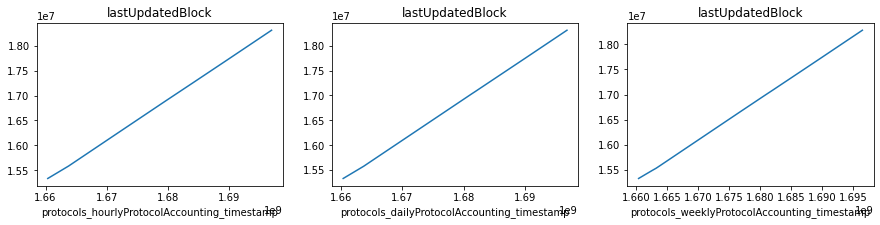

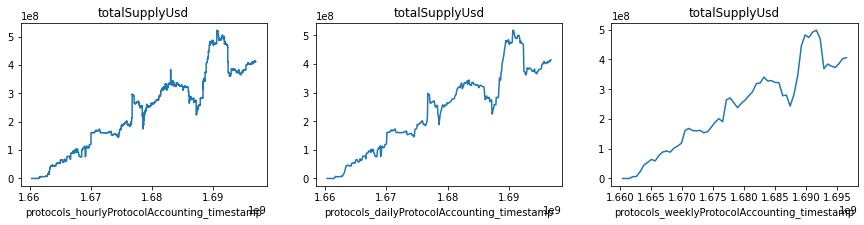

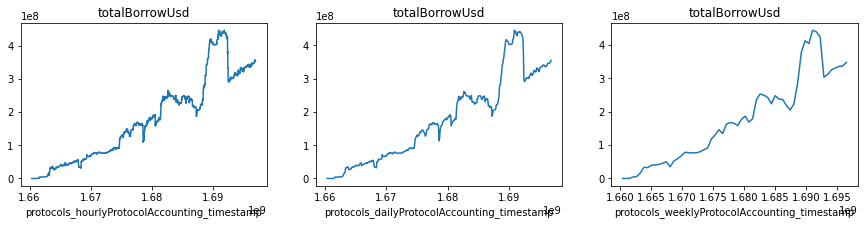

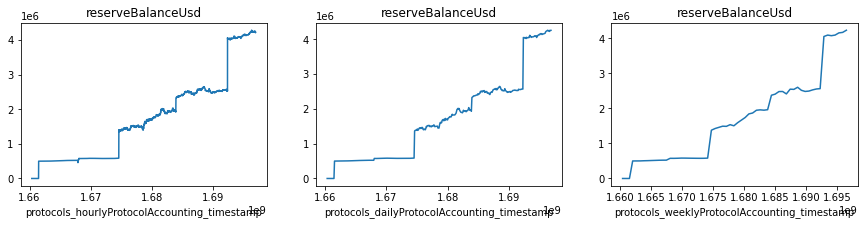

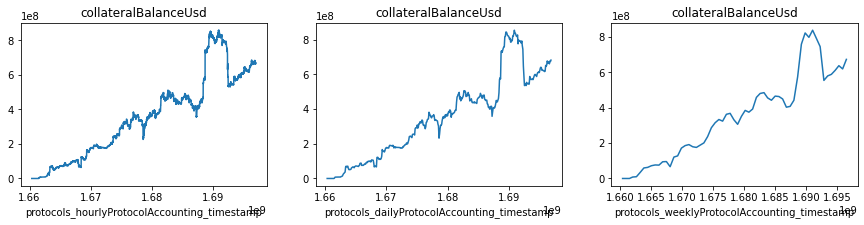

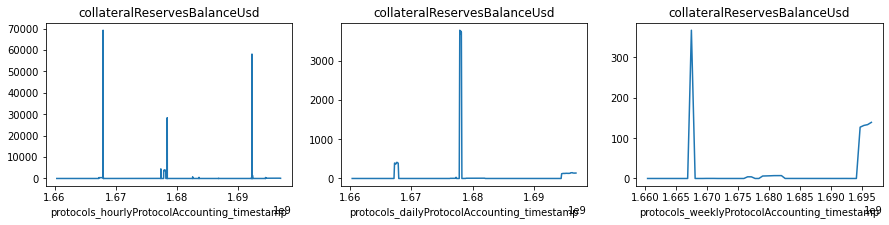

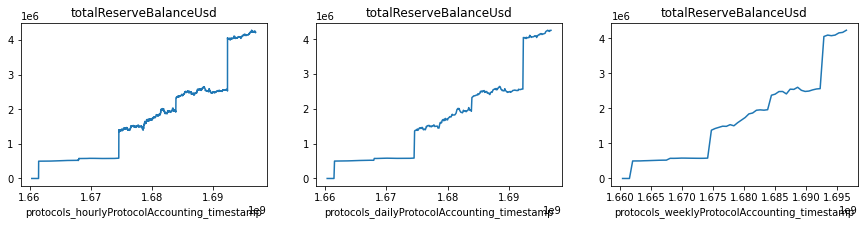

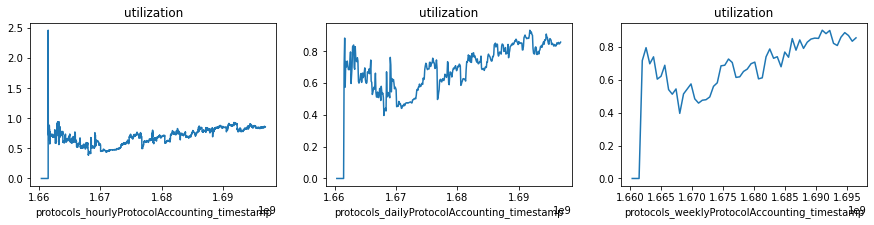

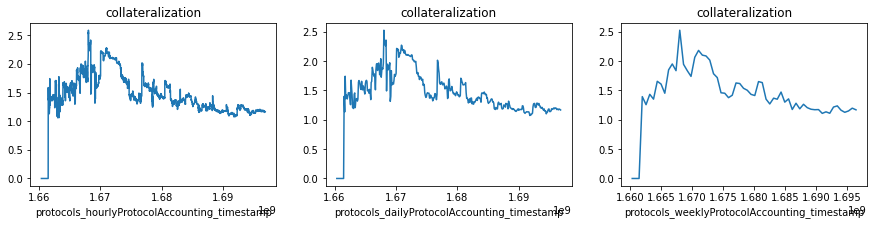

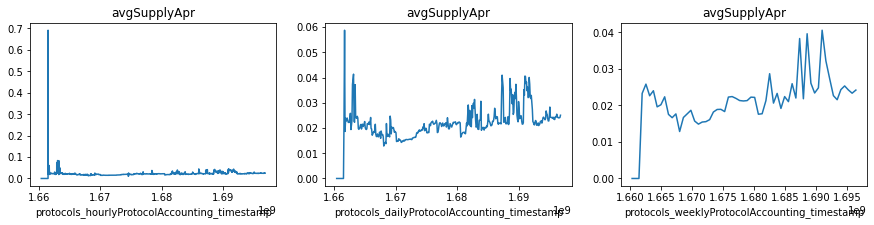

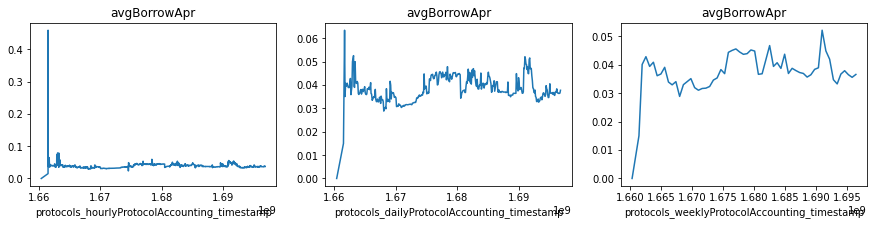

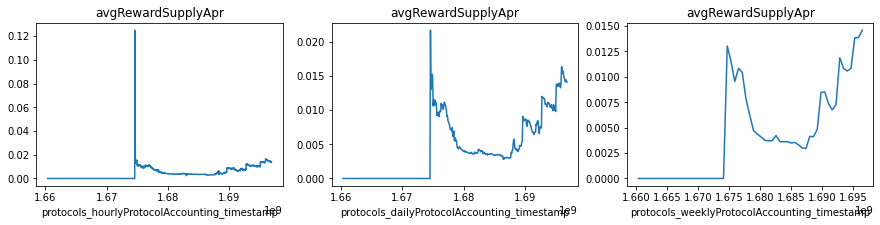

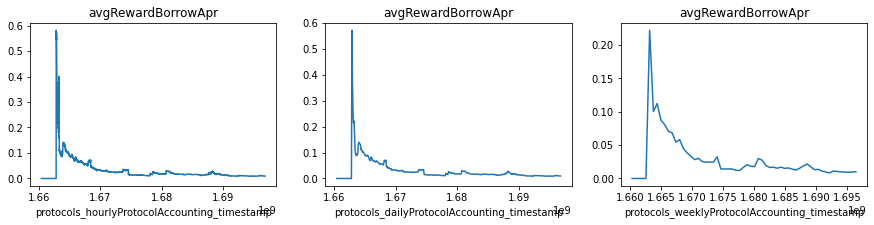

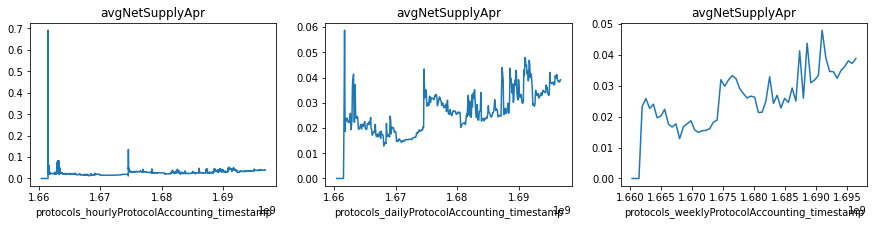

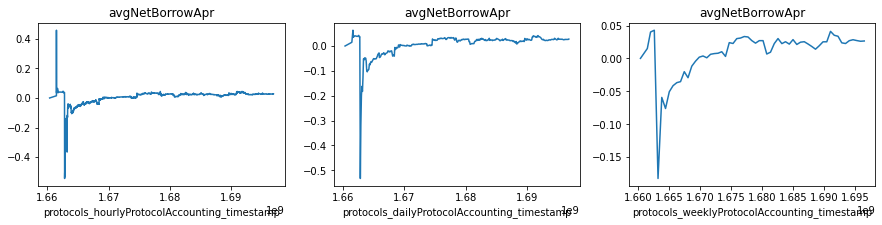

In [84]:
# Protocol Historical Accounting

hourly = comp_v3.Query.protocols.hourlyProtocolAccounting(orderBy="timestamp", first=100000000)
daily = comp_v3.Query.protocols.dailyProtocolAccounting(orderBy="timestamp", first=100000000)
weekly = comp_v3.Query.protocols.weeklyProtocolAccounting(orderBy="timestamp", first=100000000)

hourly_df = sg.query_df([hourly.timestamp, hourly.accounting], concat=True)
daily_df = sg.query_df([daily.timestamp, daily.accounting], concat=True)
weekly_df = sg.query_df([weekly.timestamp, weekly.accounting], concat=True)

plot_all([hourly_df, daily_df, weekly_df], ["protocols_hourlyProtocolAccounting_timestamp", "protocols_dailyProtocolAccounting_timestamp", "protocols_weeklyProtocolAccounting_timestamp"], "Protocol Accounting (hourly, daily, weekly)")


Protocol Usage (hourly, daily)


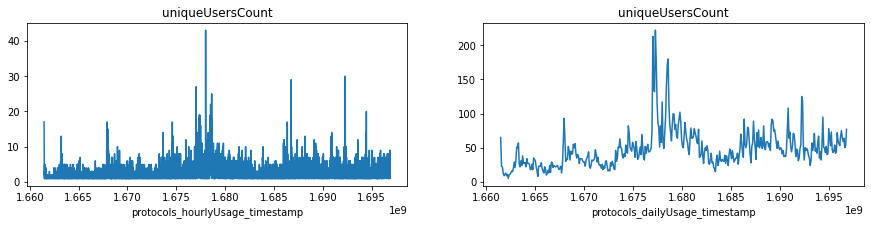

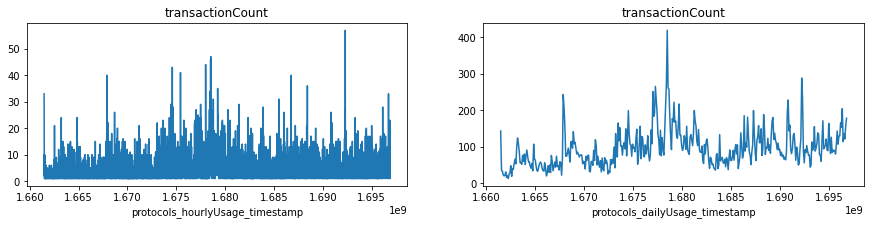

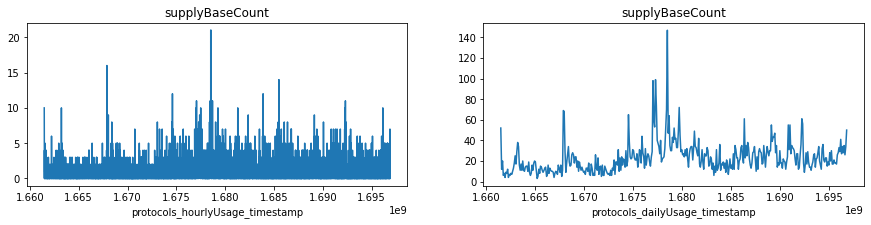

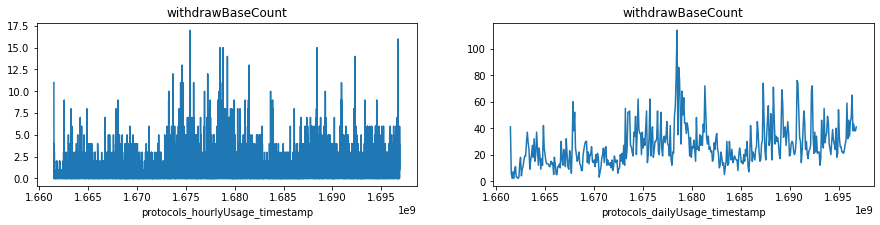

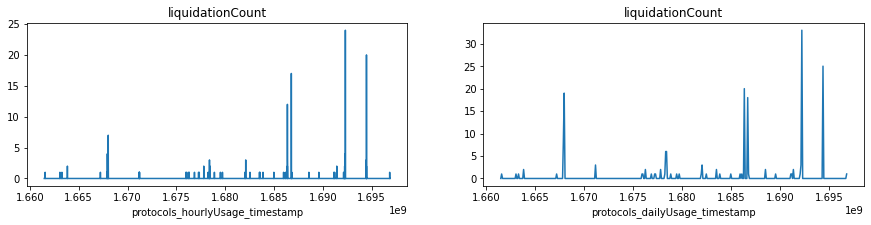

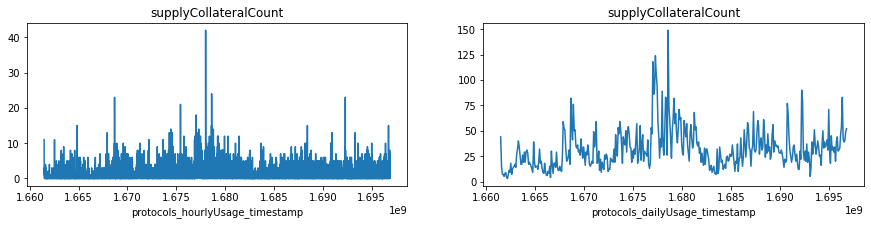

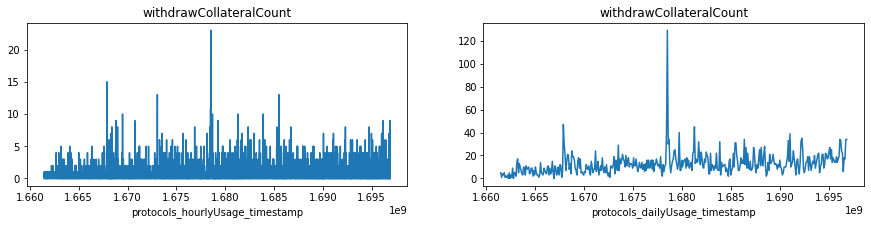

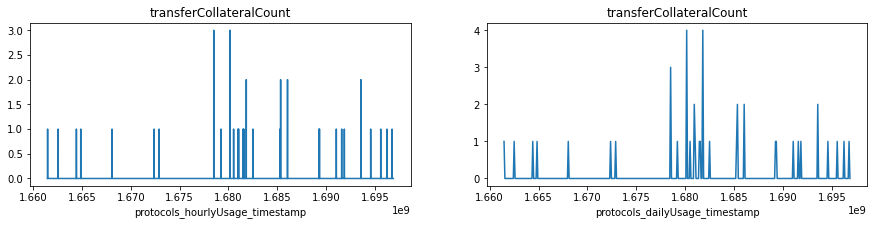

In [85]:
# Protocol historical usage

hourly = comp_v3.Query.protocols.hourlyUsage(orderBy="timestamp", first=100000000)
daily = comp_v3.Query.protocols.dailyUsage(orderBy="timestamp", first=100000000)

hourly_df = sg.query_df([hourly.timestamp, hourly.usage], concat=True)
daily_df = sg.query_df([daily.timestamp, daily.usage], concat=True)

# display(hourly_df)

plot_all([hourly_df, daily_df], ["protocols_hourlyUsage_timestamp", "protocols_dailyUsage_timestamp"], "Protocol Usage (hourly, daily)")


Compound WETH - Market Accounting (hourly, daily, weekly)


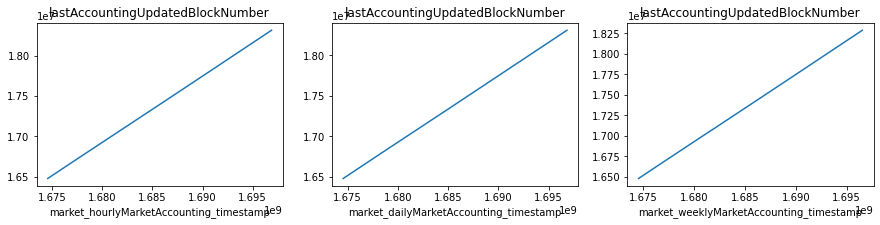

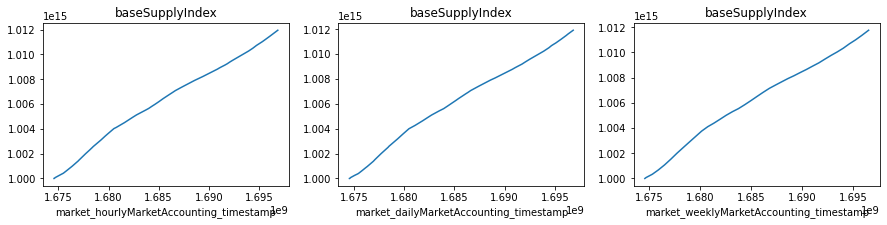

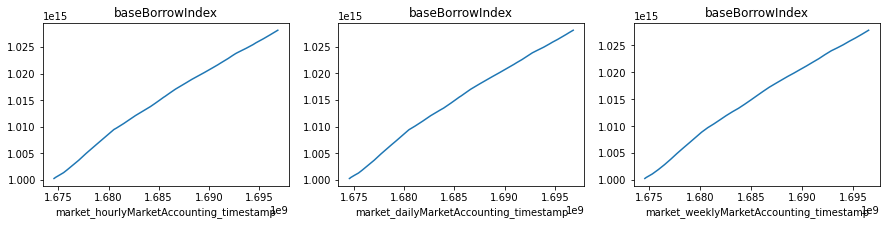

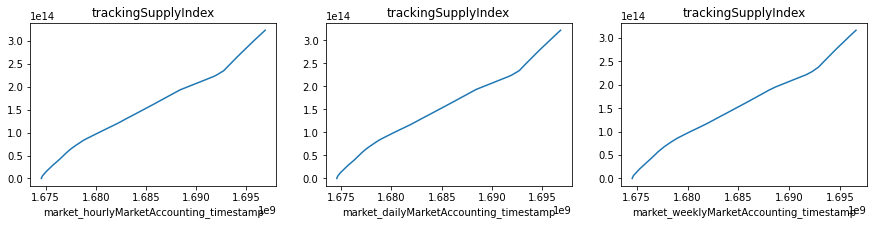

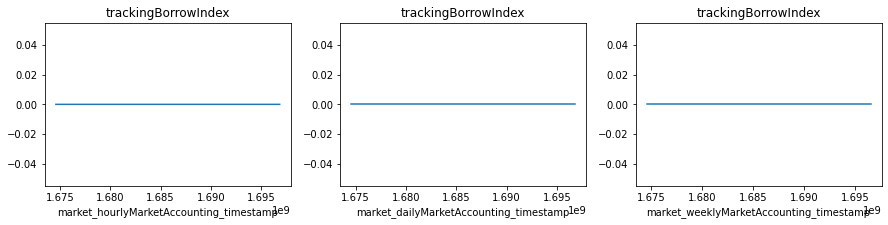

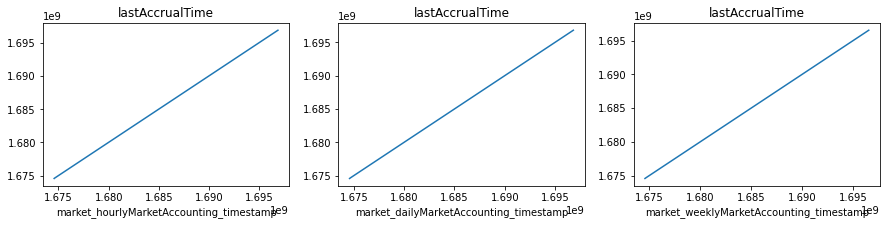

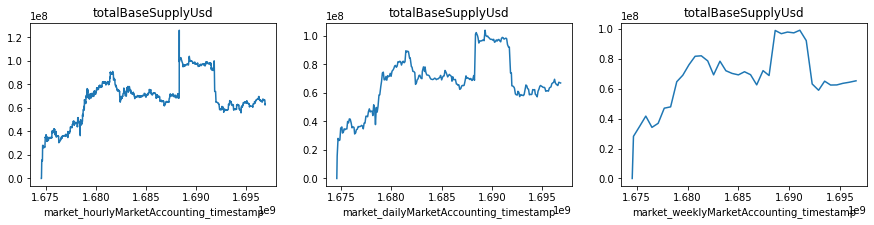

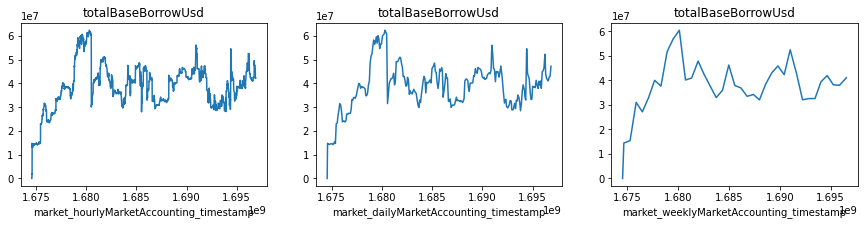

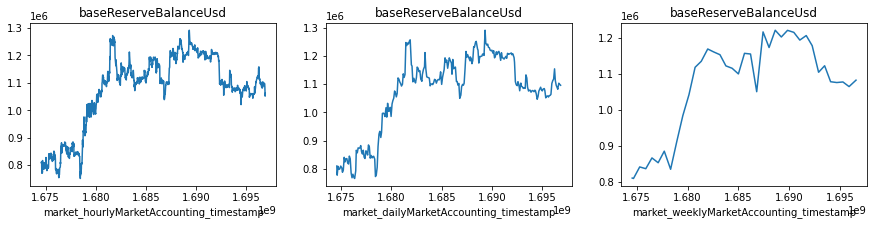

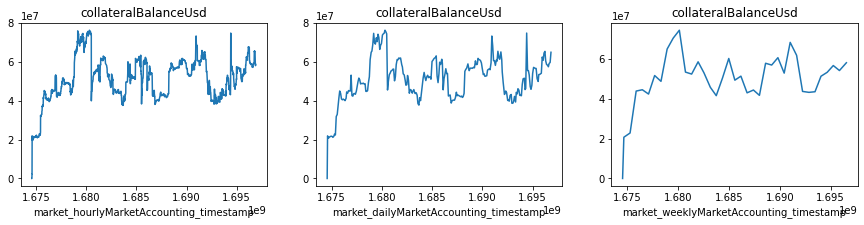

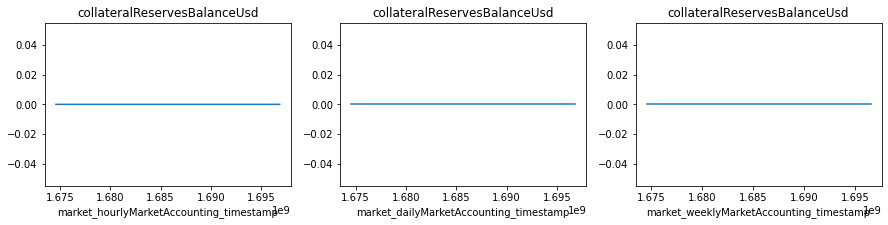

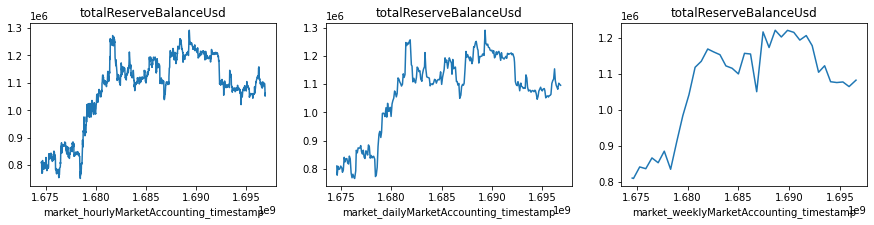

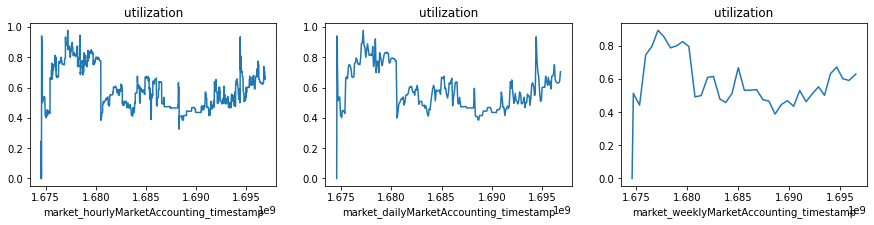

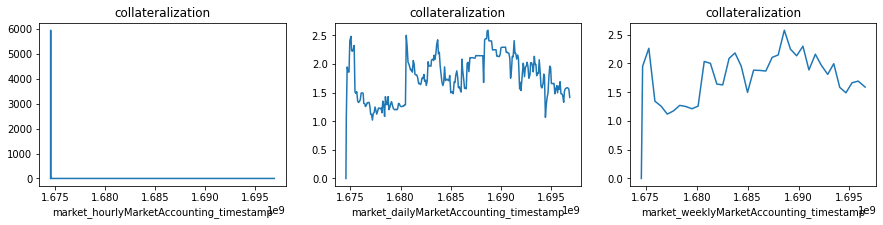

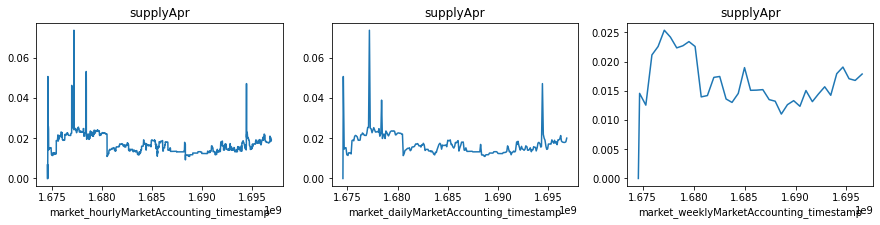

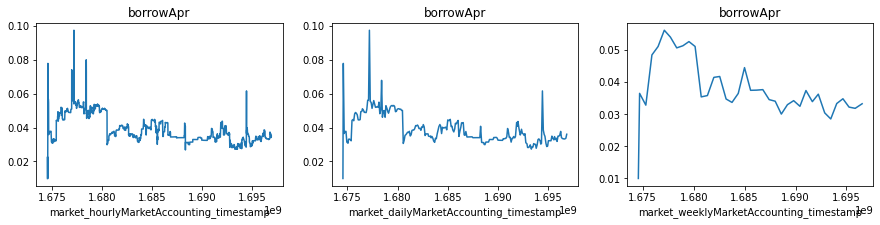

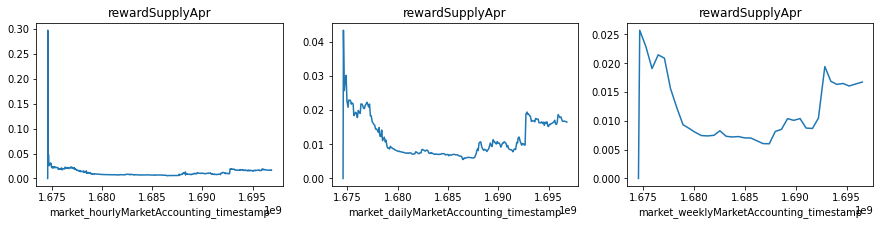

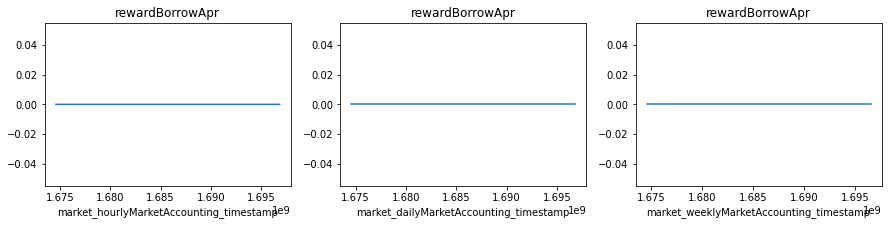

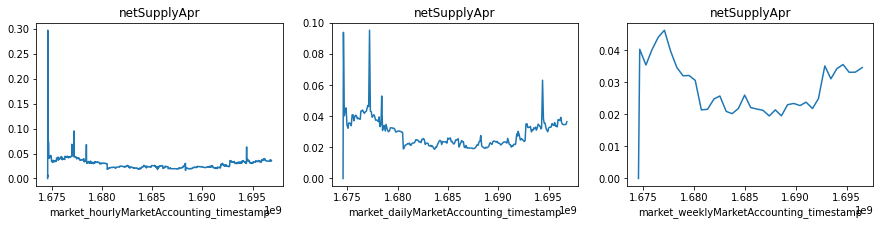

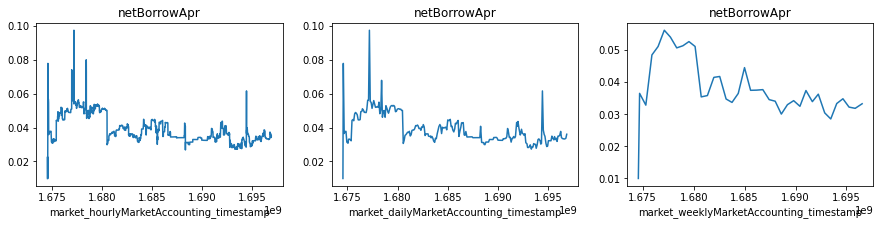

Compound USDC - Market Accounting (hourly, daily, weekly)


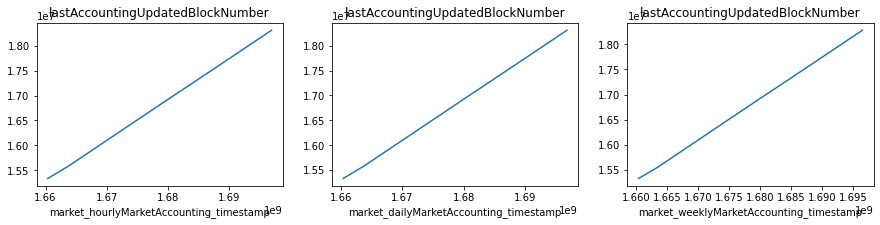

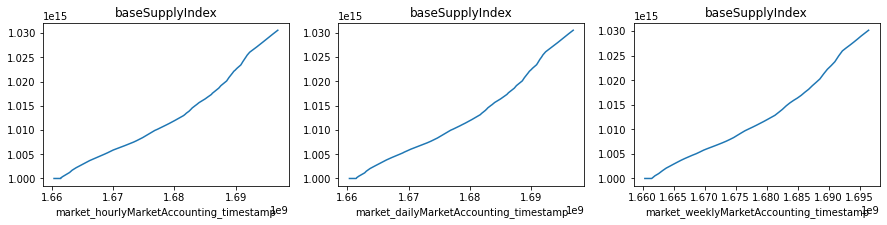

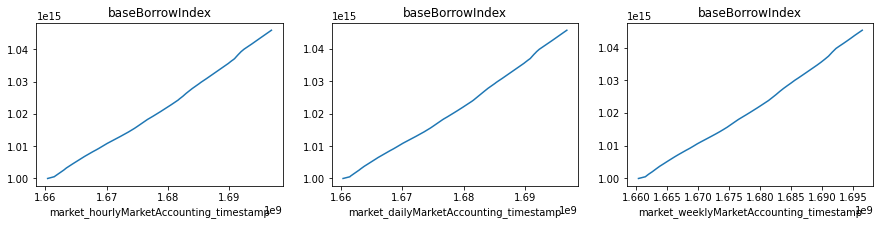

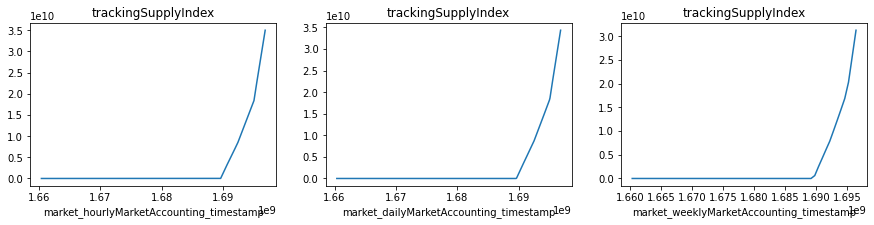

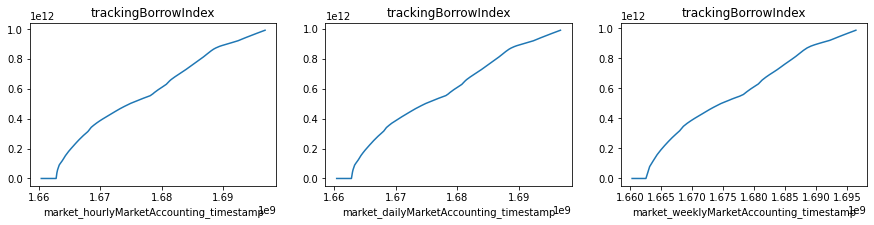

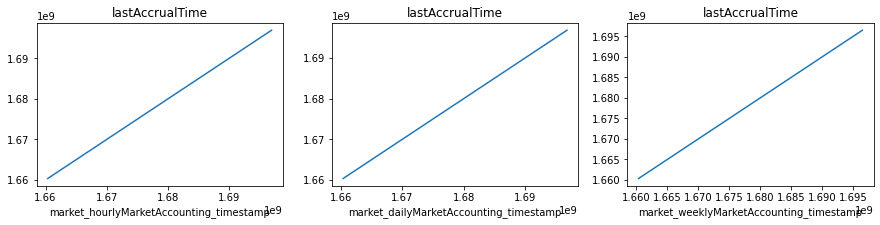

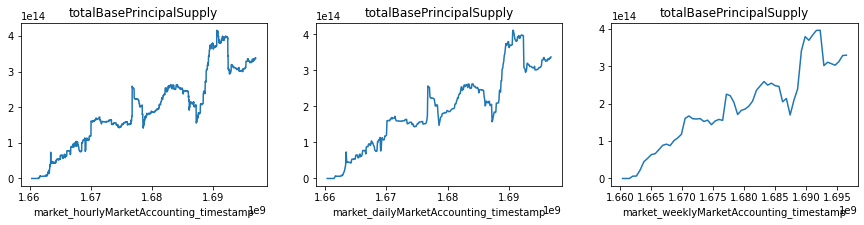

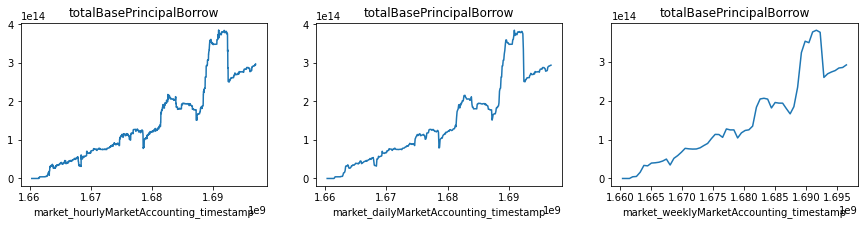

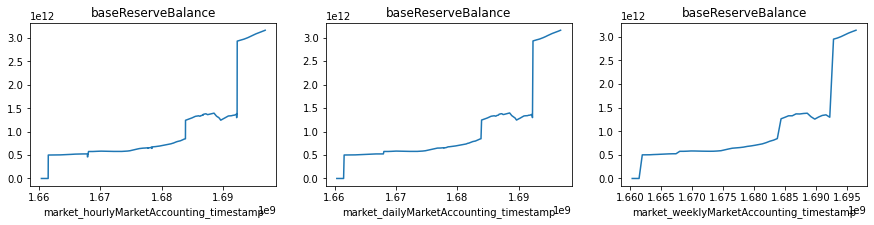

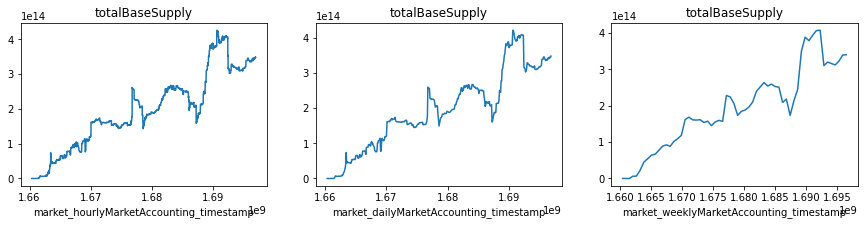

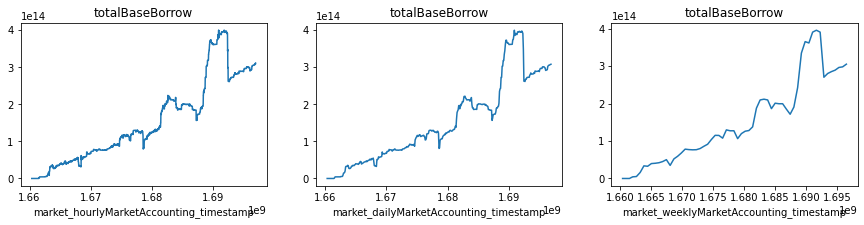

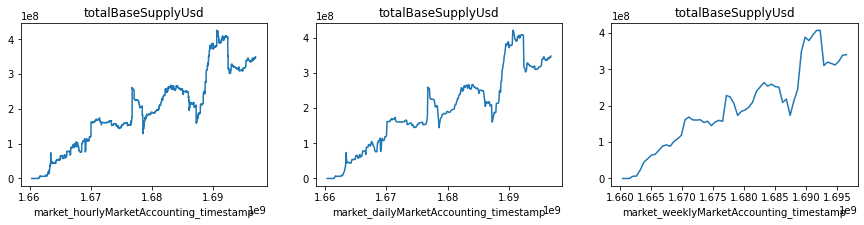

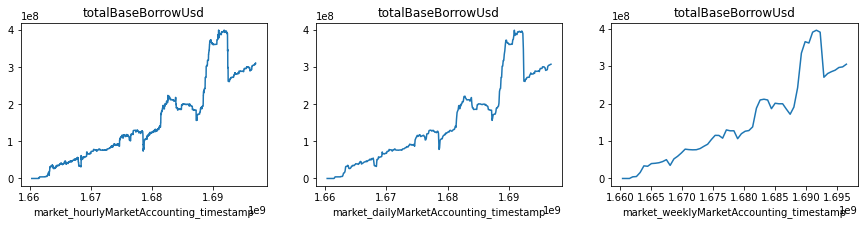

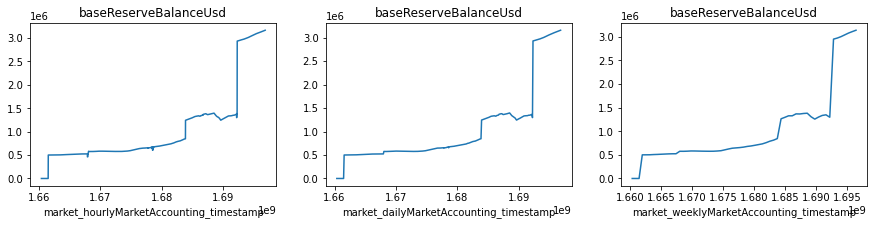

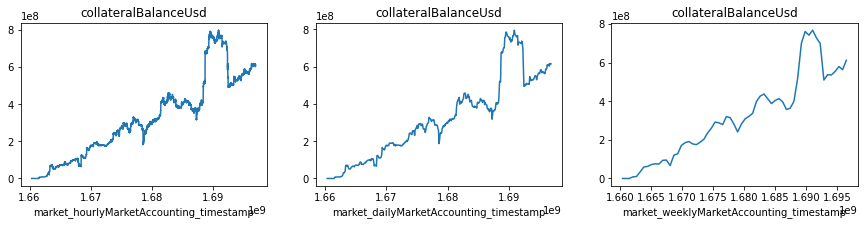

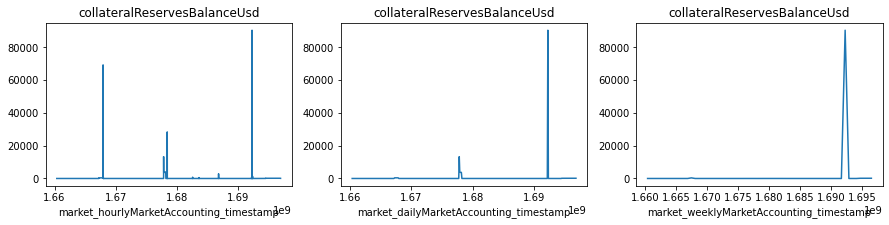

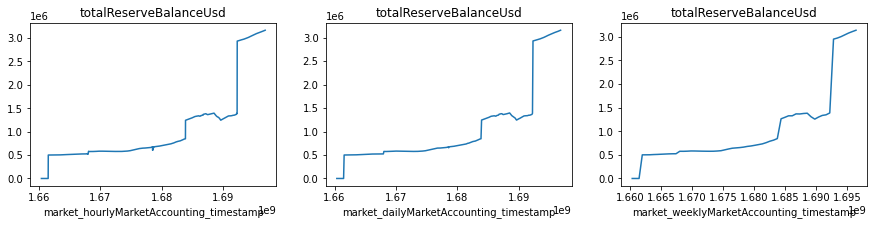

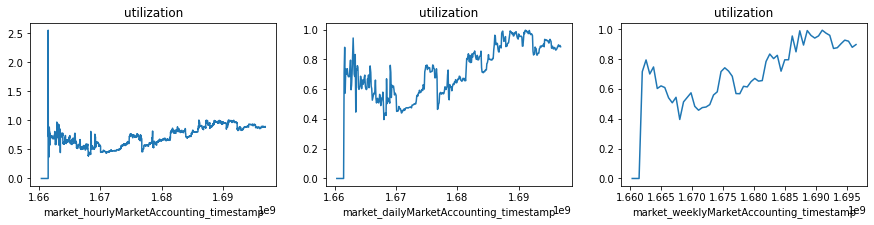

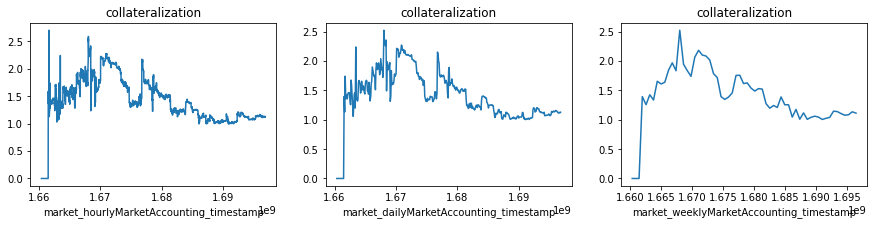

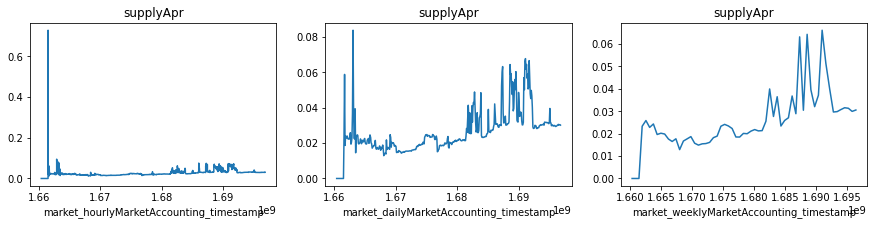

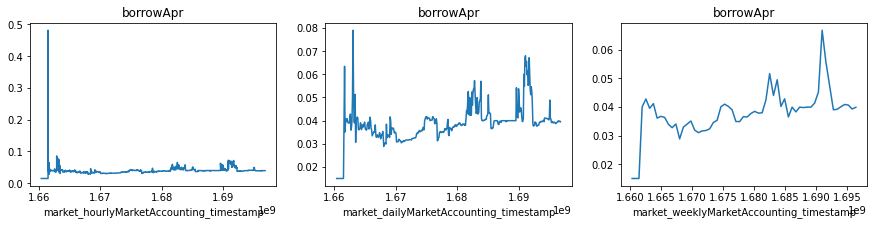

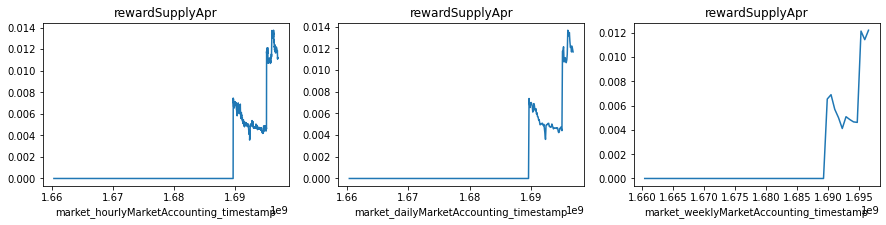

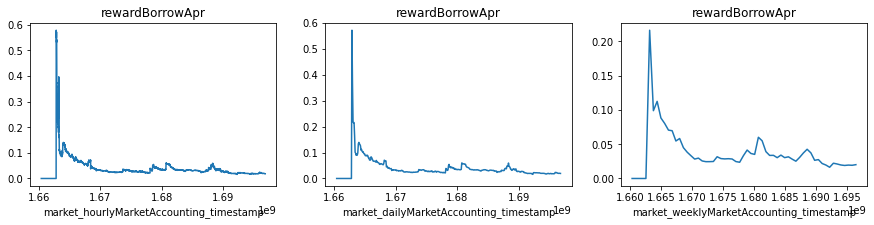

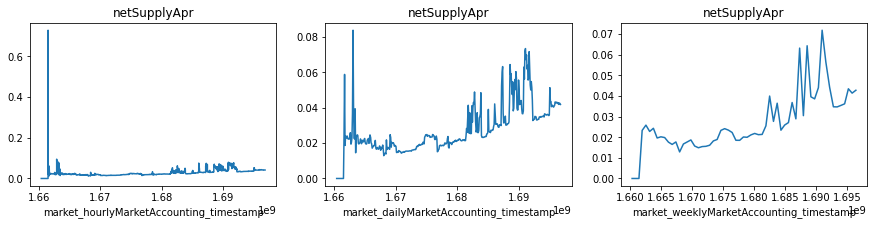

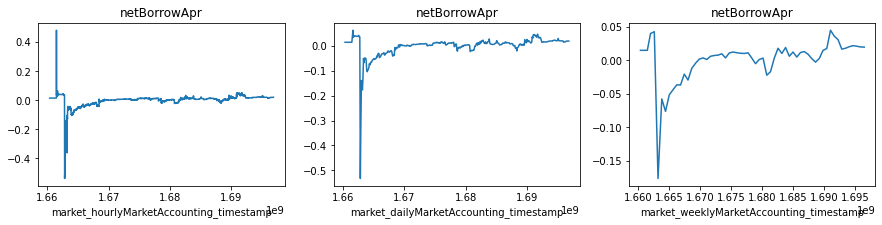

In [86]:
# Market Historical Accounting

markets = comp_v3.Query.markets()
markets_info = sg.query_df([markets.id, markets.configuration.name])

for index, row in markets_info.iterrows():
    market_name = row["markets_configuration_name"]
    market_id = row["markets_id"]

    market = comp_v3.Query.market(id=market_id)
    hourly = market.hourlyMarketAccounting(orderBy="timestamp", first=100000000)
    daily = market.dailyMarketAccounting(orderBy="timestamp", first=100000000)
    weekly = market.weeklyMarketAccounting(orderBy="timestamp", first=100000000)

    hourly_df = sg.query_df([hourly.timestamp, hourly.accounting], concat=True)
    daily_df = sg.query_df([daily.timestamp, daily.accounting], concat=True)
    weekly_df = sg.query_df([weekly.timestamp, weekly.accounting], concat=True)

    plot_all([hourly_df, daily_df, weekly_df], ["market_hourlyMarketAccounting_timestamp", "market_dailyMarketAccounting_timestamp", "market_weeklyMarketAccounting_timestamp"], f"{market_name} - Market Accounting (hourly, daily, weekly)")

Compound WETH - Market Configuration


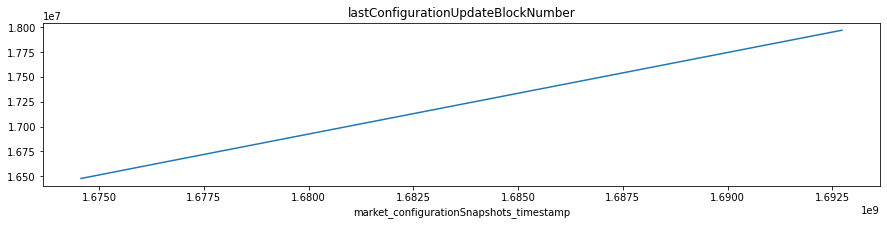

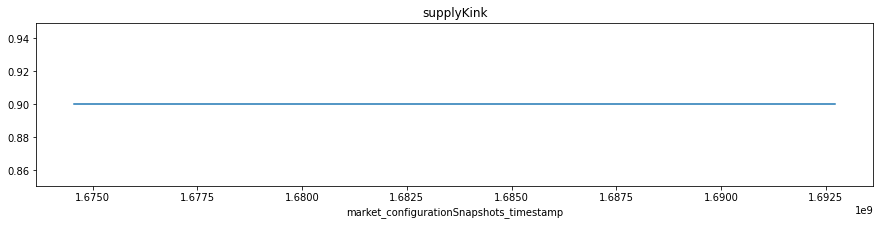

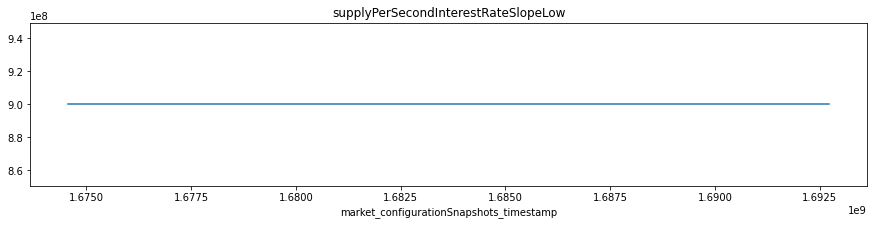

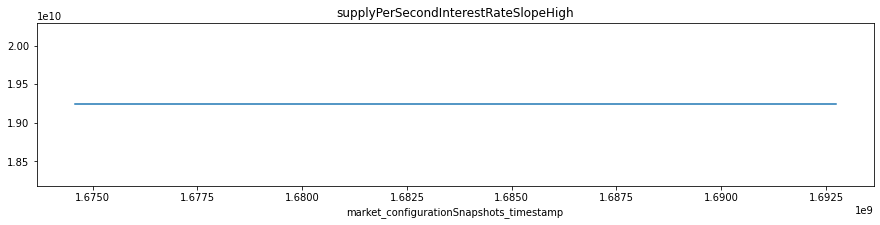

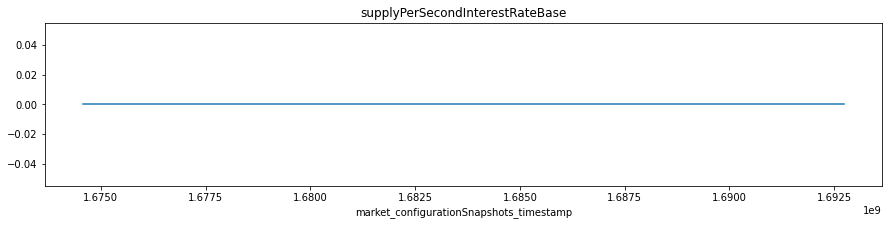

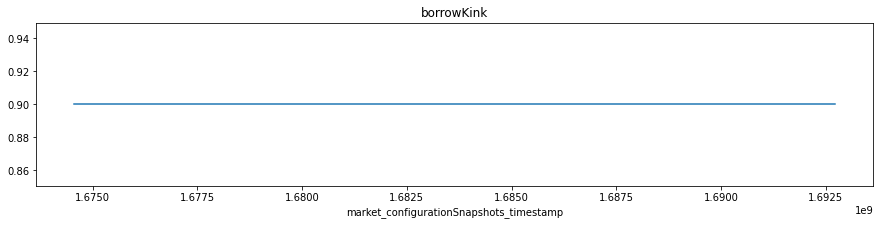

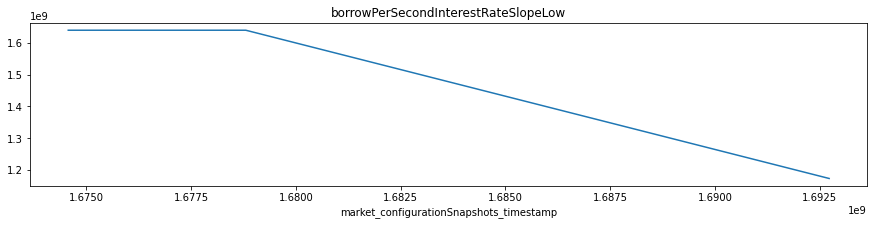

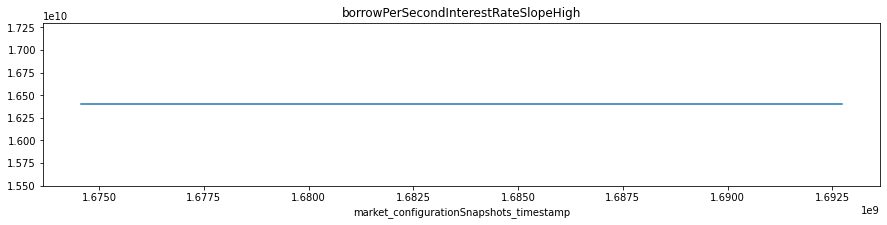

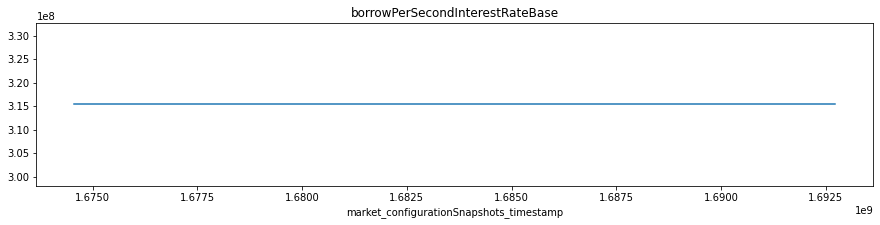

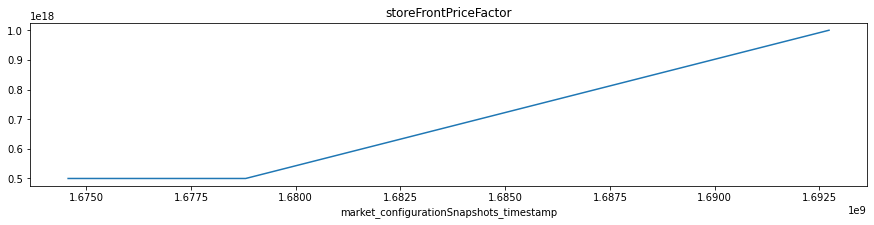

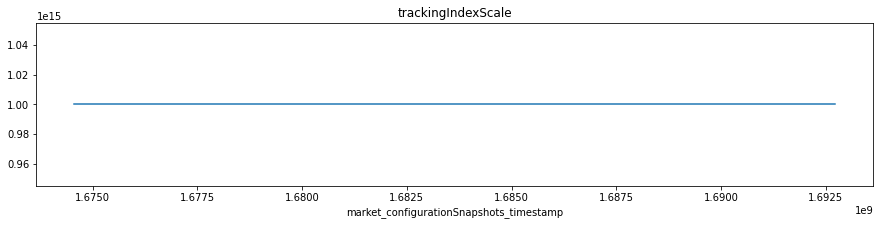

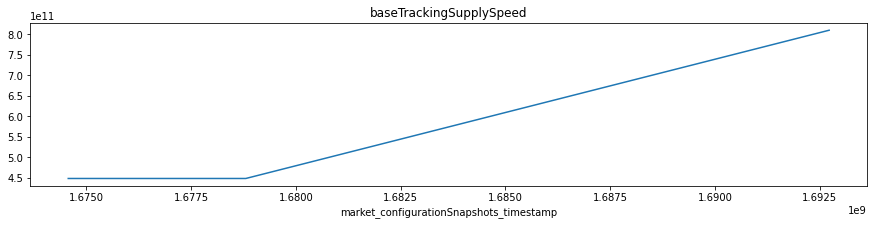

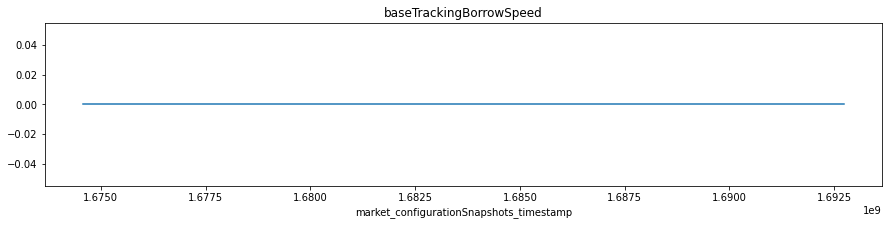

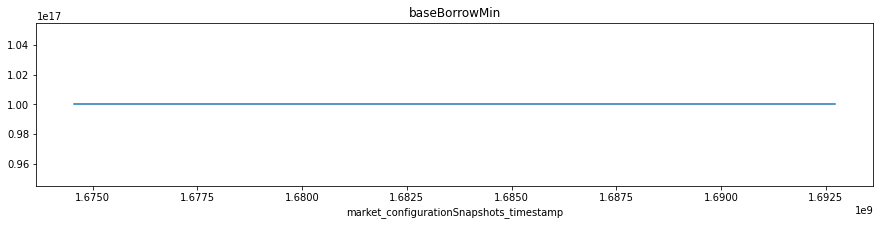

Compound USDC - Market Configuration


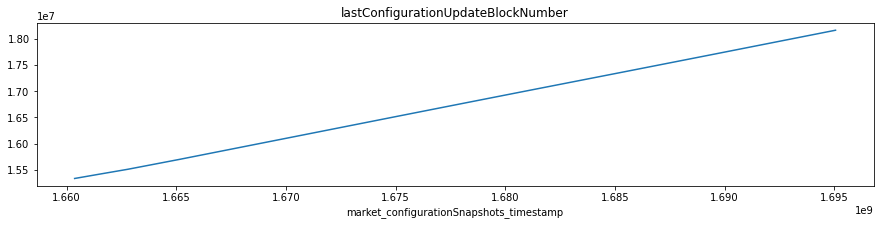

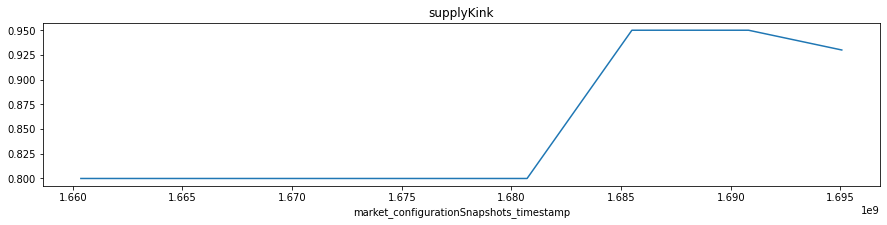

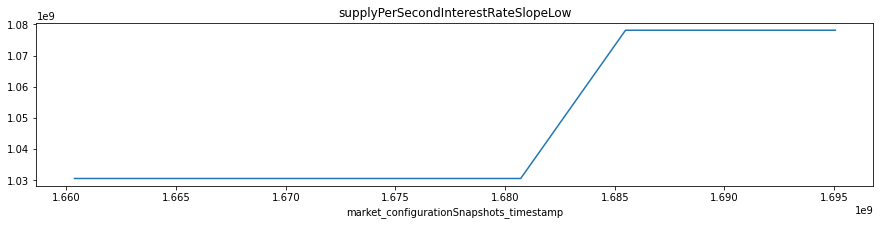

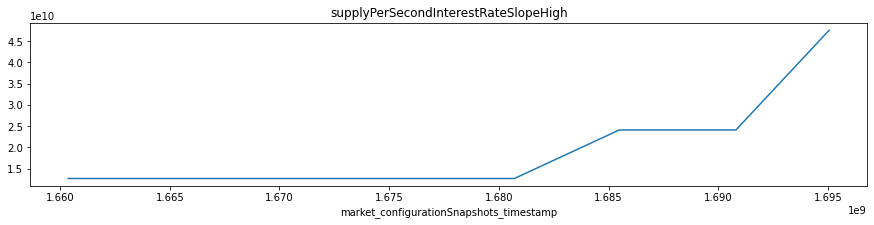

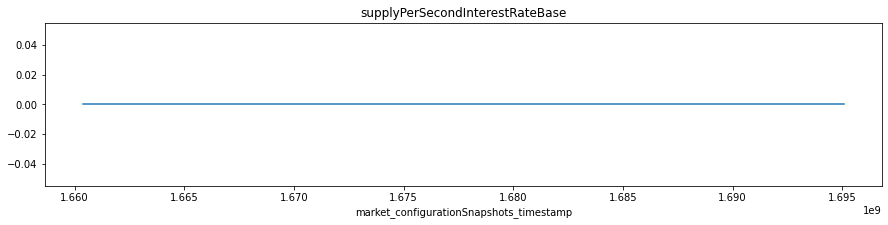

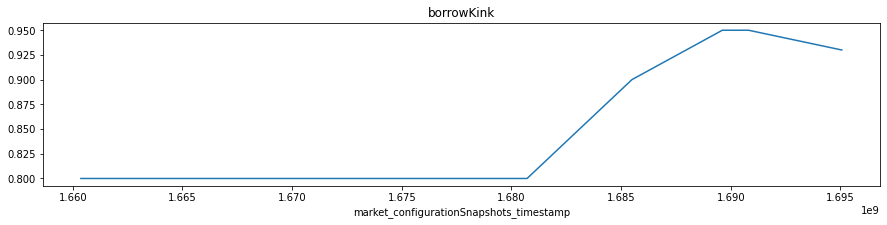

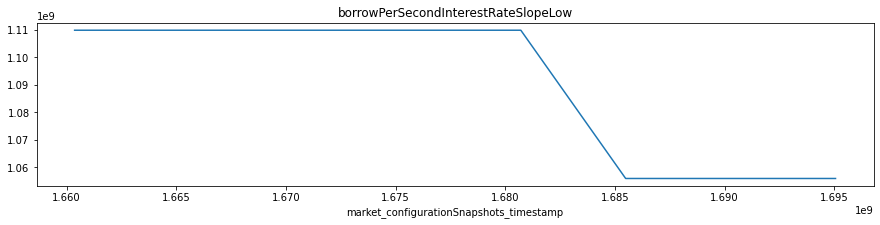

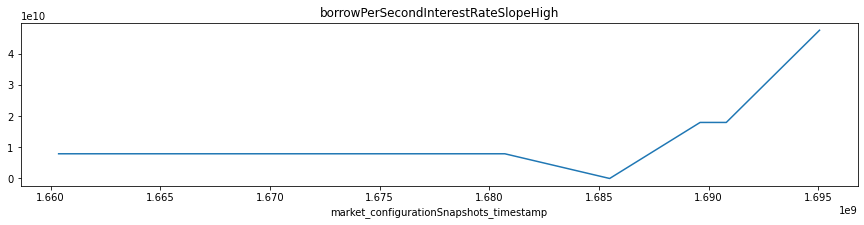

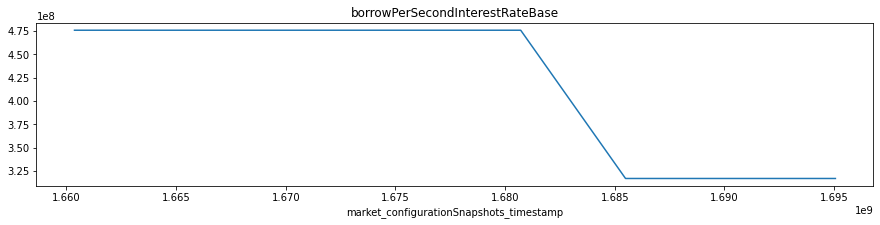

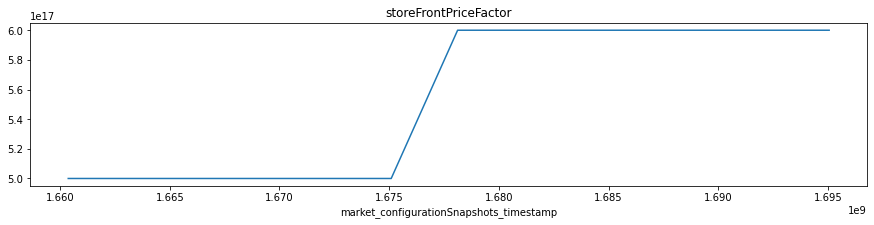

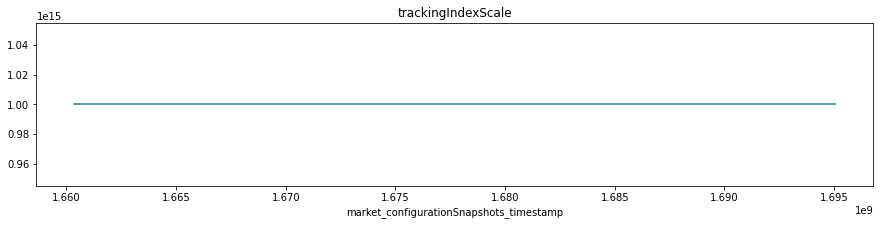

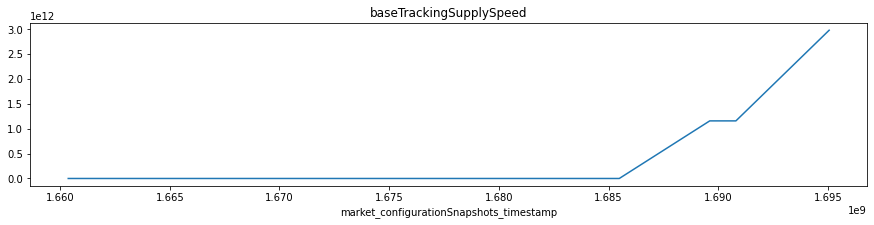

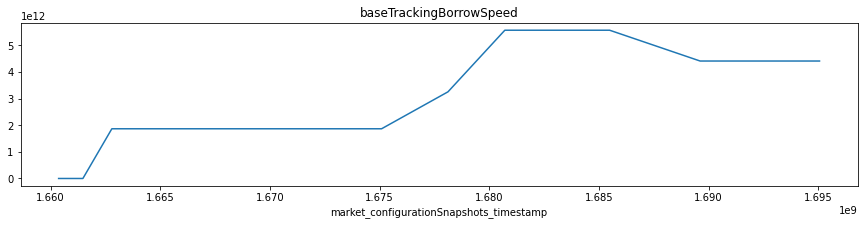

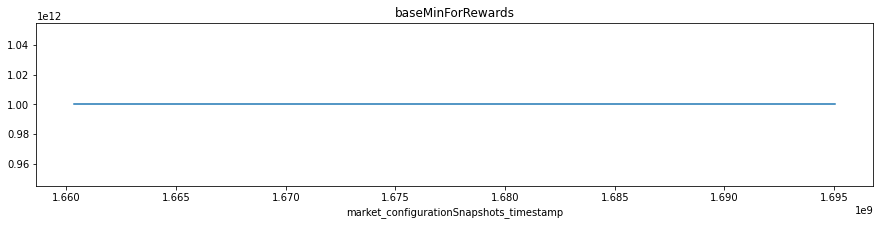

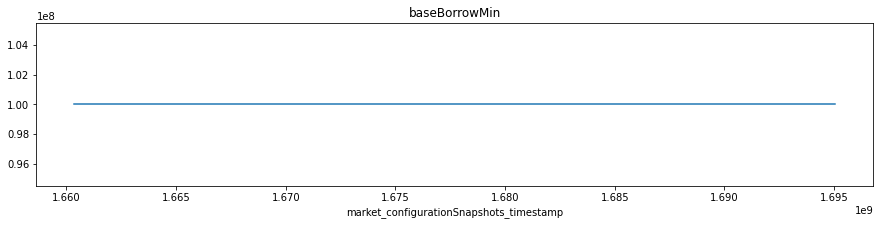

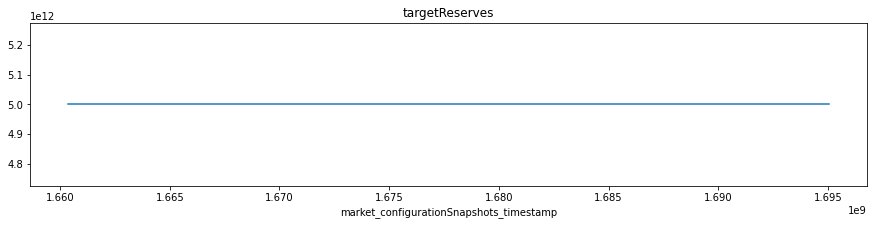

In [87]:
# Market Historical Configuration

markets = comp_v3.Query.markets()
markets_info = sg.query_df([markets.id, markets.configuration.name])

for index, row in markets_info.iterrows():
    market_name = row["markets_configuration_name"]
    market_id = row["markets_id"]

    market = comp_v3.Query.market(id=market_id)
    snapshots = market.configurationSnapshots(orderBy="timestamp", first=100000000)

    snapshots_df = sg.query_df([snapshots.timestamp, snapshots.configuration], concat=True)

    # display(snapshots_df)

    plot_all([snapshots_df], ["market_configurationSnapshots_timestamp"], f"{market_name} - Market Configuration") 

Compound WETH - Market Usage (hourly, daily)


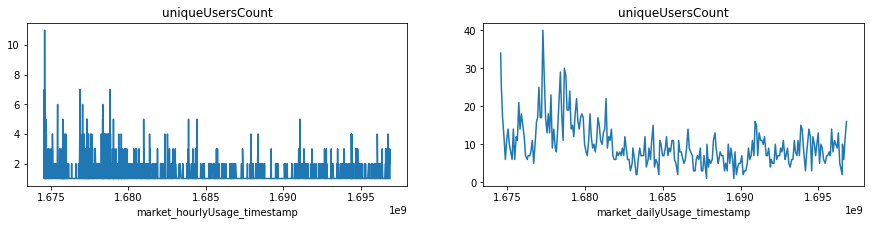

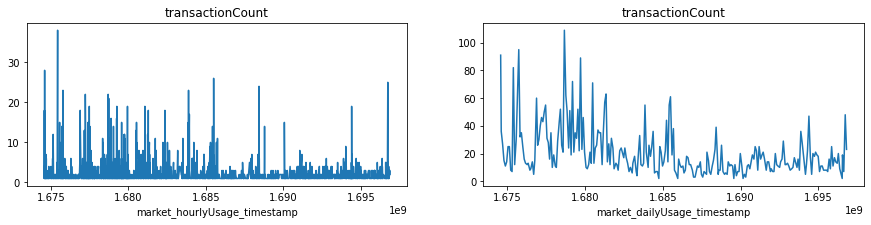

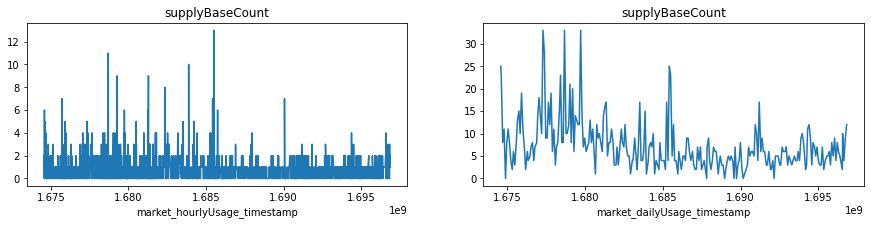

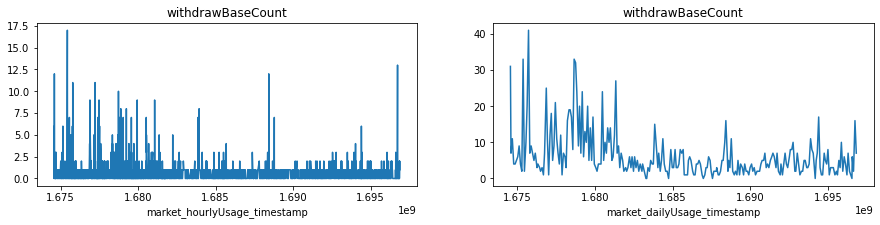

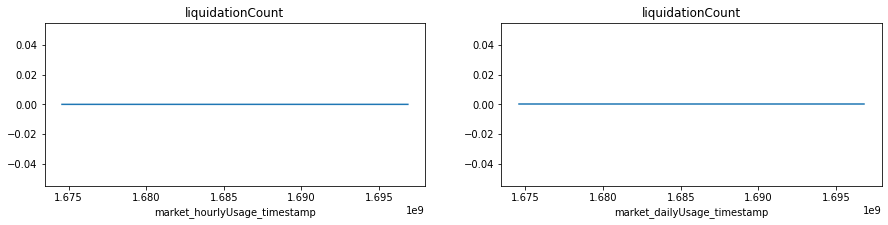

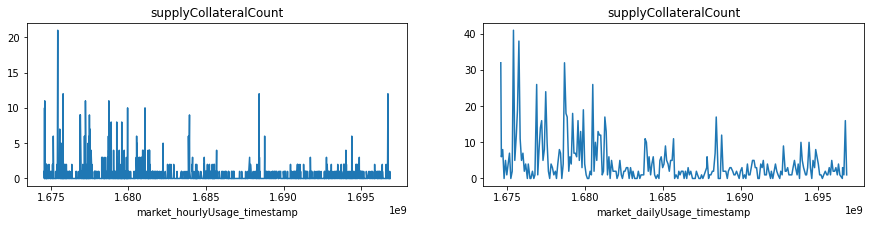

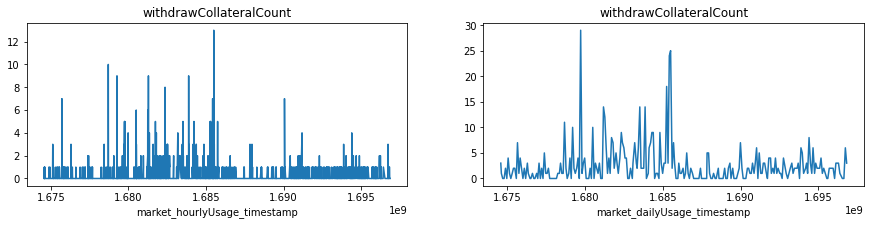

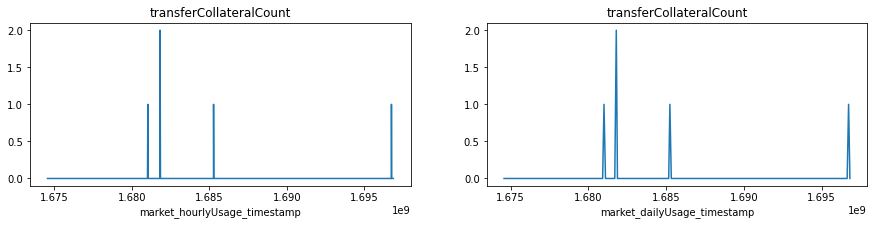

Compound USDC - Market Usage (hourly, daily)


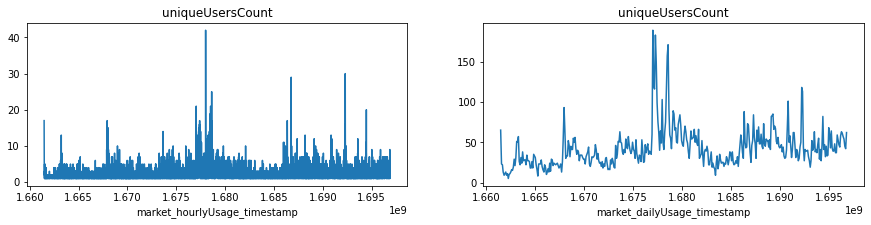

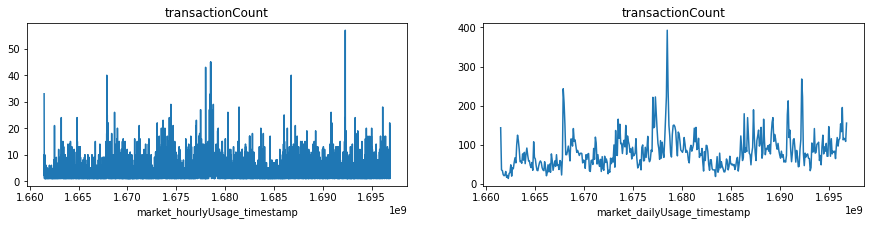

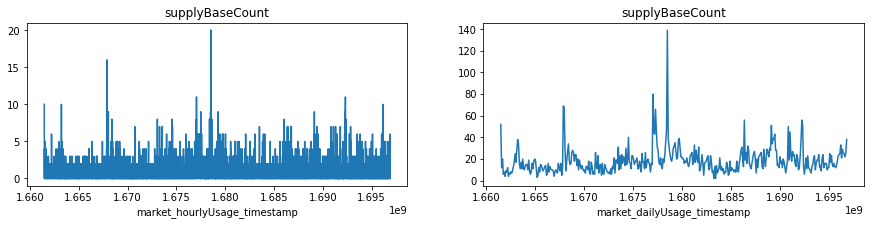

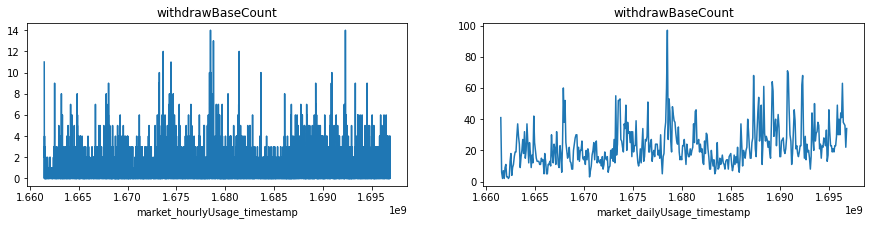

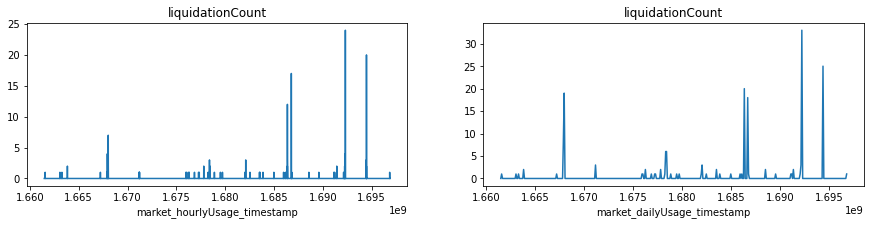

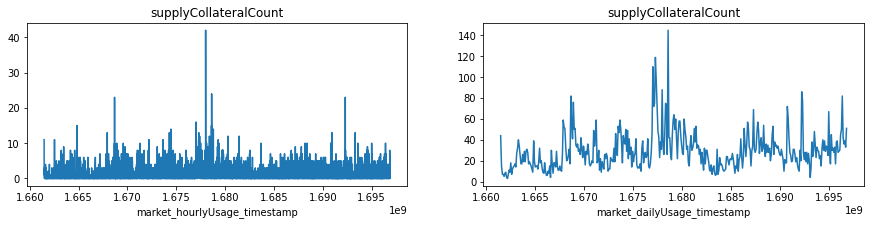

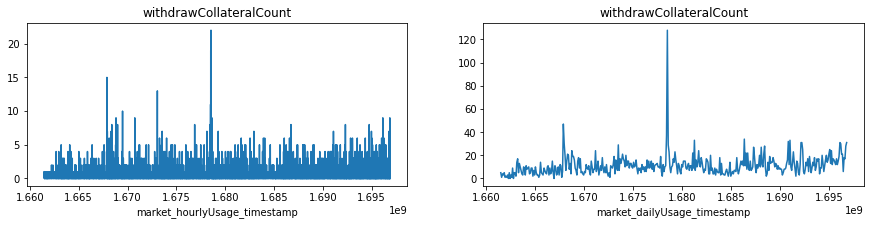

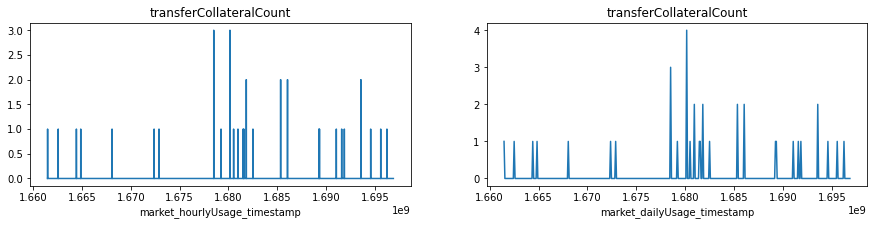

In [88]:
# Market Historical Usage

markets = comp_v3.Query.markets()
markets_info = sg.query_df([markets.id, markets.configuration.name])

for index, row in markets_info.iterrows():
    market_name = row["markets_configuration_name"]
    market_id = row["markets_id"]

    market = comp_v3.Query.market(id=market_id)
    hourly = market.hourlyUsage(orderBy="timestamp", first=100000000)
    daily = market.dailyUsage(orderBy="timestamp", first=100000000)

    hourly_df = sg.query_df([hourly.timestamp, hourly.usage], concat=True)
    daily_df = sg.query_df([daily.timestamp, daily.usage], concat=True)

    # display(hourly_df)

    plot_all([hourly_df, daily_df], ["market_hourlyUsage_timestamp", "market_dailyUsage_timestamp"], f"{market_name} - Market Usage (hourly, daily)")

position_positionAccountingSnapshots_timestamp  \
0                                      1674602939   
1                                      1674603359   
2                                      1676034623   
3                                      1688312639   

  position_positionAccountingSnapshots_accounting_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae9410d8...   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae9410d8...   
2  0xa17581a9e3356d9a858b789d68b4d866e593ae9410d8...   
3  0xa17581a9e3356d9a858b789d68b4d866e593ae9410d8...   

   position_positionAccountingSnapshots_accounting_lastUpdatedBlockNumber  \
0                                           16479956                        
1                                           16479991                        
2                                           16598568                        
3                                           17607287                        

  position_positionAccountingSnapshots_accounting_position_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae9410d8...            
1  0xa17581a9e3356d9a858b789d68b4d866e593ae9410d8...            
2  0xa17581a9e3356d9a858b789d68b4d866e593ae9410d8...            
3  0xa17581a9e3356d9a858b789d68b4d866e593ae9410d8...            

  position_positionAccountingSnapshots_accounting_basePrincipal  \
0                                                  0              
1                            -2699152246434178339105              
2                                                  0              
3                            29767562379533695489604              

  position_positionAccountingSnapshots_accounting_baseBalance  \
0                                                  0            
1                            -2699998106643255971550            
2                                                  0            
3                            29999928024283075857734            

   position_positionAccountingSnapshots_accounting_baseTrackingIndex  \
0                                                  0                   
1                                                  0                   
2                                     34872010497335                   
3                                    192401479542966                   

   position_positionAccountingSnapshots_accounting_baseTrackingAccrued  \
0                                                  0                     
1                                                  0                     
2                                                  0                     
3                                                  0                     

   position_positionAccountingSnapshots_accounting_baseBalanceUsd  \
0                                       0.000000e+00                
1                                      -4.198082e+06                
2                                       0.000000e+00                
3                                       5.753476e+07                

   position_positionAccountingSnapshots_accounting_collateralBalanceUsd  
0                                       8.543577e+06                     
1                                       8.587201e+06                     
2                                       8.495690e+06                     
3                                       0.000000e+00

0x10d88638be3c26f3a47d861b8b5641508501035d - Position Accounting


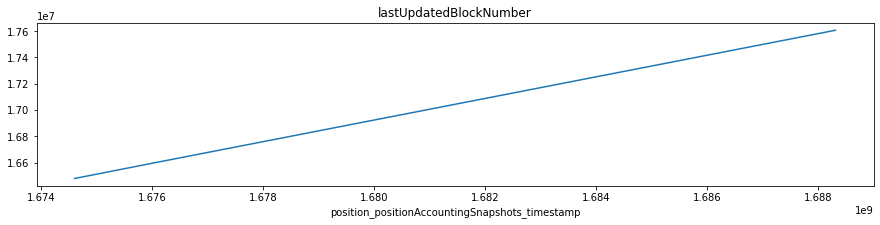

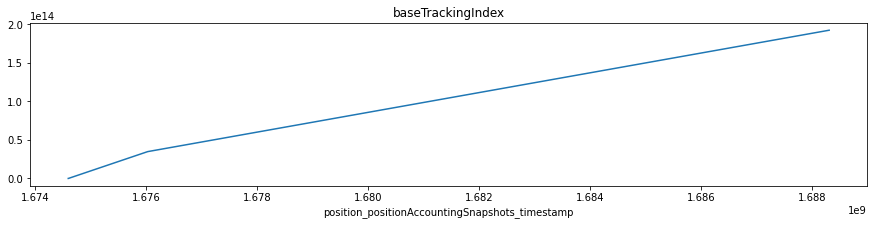

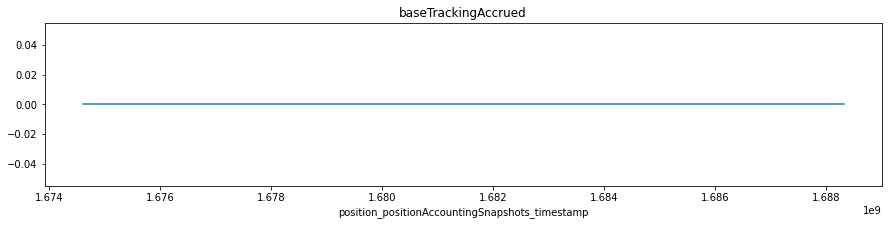

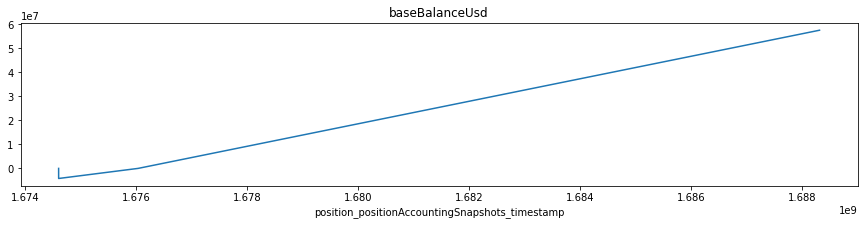

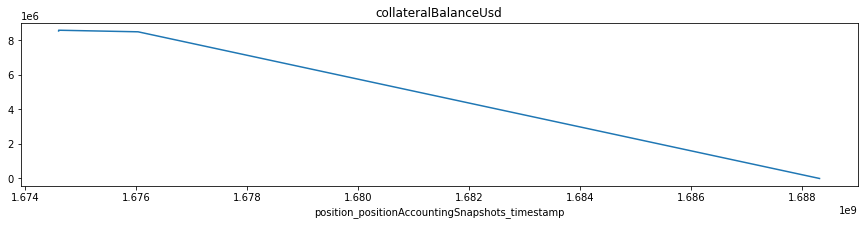

position_positionAccountingSnapshots_timestamp  \
0                                      1674955307   
1                                      1678188611   
2                                      1679226011   

  position_positionAccountingSnapshots_accounting_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae9459a6...   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae9459a6...   
2  0xa17581a9e3356d9a858b789d68b4d866e593ae9459a6...   

   position_positionAccountingSnapshots_accounting_lastUpdatedBlockNumber  \
0                                           16509163                        
1                                           16776136                        
2                                           16861529                        

  position_positionAccountingSnapshots_accounting_position_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae9459a6...            
1  0xa17581a9e3356d9a858b789d68b4d866e593ae9459a6...            
2  0xa17581a9e3356d9a858b789d68b4d866e593ae9459a6...            

  position_positionAccountingSnapshots_accounting_basePrincipal  \
0                             4998992912709162021052              
1                             9987274672306803706351              
2                             6488079088093233054305              

  position_positionAccountingSnapshots_accounting_baseBalance  \
0                             4999911608071404274188            
1                            10010652824233716372746            
2                             6508075815131431149190            

   position_positionAccountingSnapshots_accounting_baseTrackingIndex  \
0                                     13160348387806                   
1                                     74986062056113                   
2                                     88416382695334                   

   position_positionAccountingSnapshots_accounting_baseTrackingAccrued  \
0                                                  0                     
1                                          309066304                     
2                                          443198605                     

   position_positionAccountingSnapshots_accounting_baseBalanceUsd  \
0                                       8.074072e+06                
1                                       1.565155e+07                
2                                       1.157396e+07                

   position_positionAccountingSnapshots_accounting_collateralBalanceUsd  
0                                                0.0                     
1                                                0.0                     
2                                                0.0

0x59a661f1c909ca13ba3e9114bfdd81e5a420705d - Position Accounting


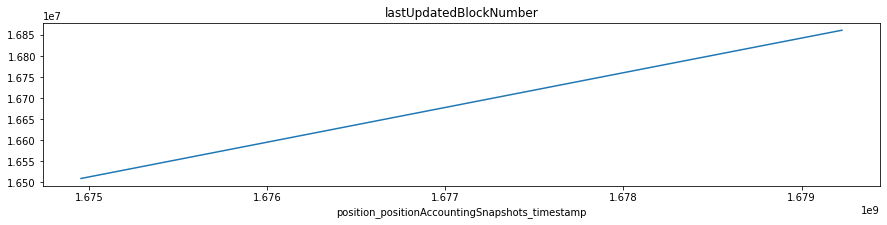

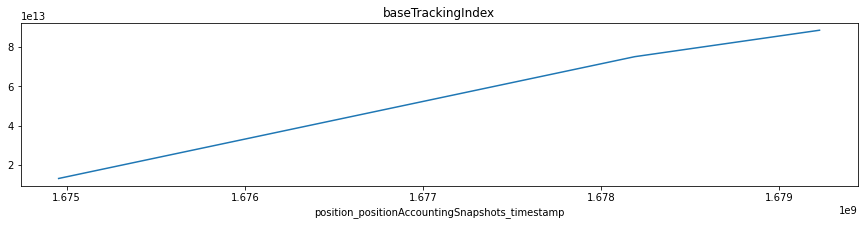

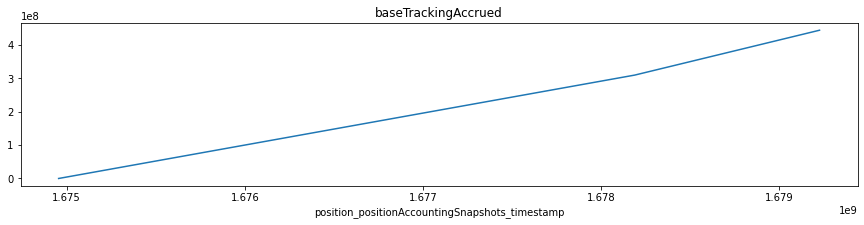

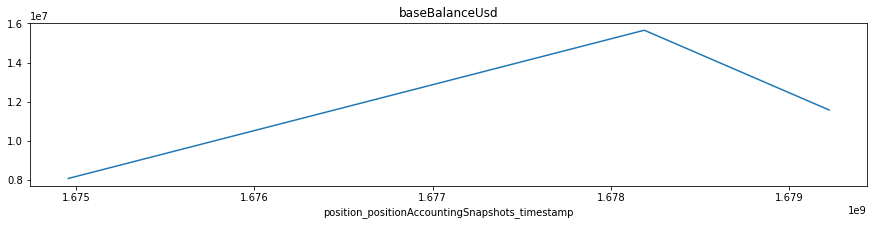

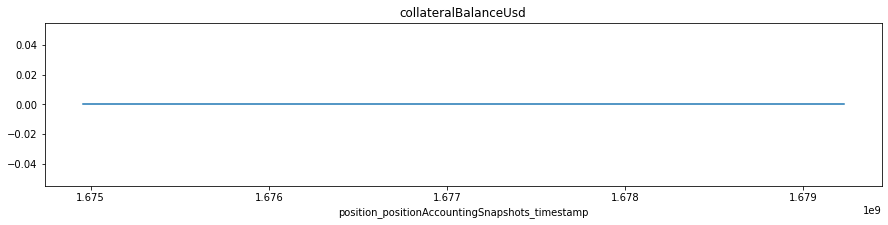

position_positionAccountingSnapshots_timestamp  \
0                                      1679002895   
1                                      1679100707   
2                                      1679360075   
3                                      1679442551   
4                                      1679885543   
5                                      1682127167   
6                                      1684661087   
7                                      1685230535   

  position_positionAccountingSnapshots_accounting_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb...   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb...   
2  0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb...   
3  0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb...   
4  0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb...   
5  0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb...   
6  0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb...   
7  0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb...   

   position_positionAccountingSnapshots_accounting_lastUpdatedBlockNumber  \
0                                           16843139                        
1                                           16851201                        
2                                           16872582                        
3                                           16879374                        
4                                           16915875                        
5                                           17098634                        
6                                           17306840                        
7                                           17353697                        

  position_positionAccountingSnapshots_accounting_position_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb...            
1  0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb...            
2  0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb...            
3  0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb...            
4  0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb...            
5  0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb...            
6  0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb...            
7  0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb...            

  position_positionAccountingSnapshots_accounting_basePrincipal  \
0                             1495611660639103045586              
1                             2492619296932021036835              
2                             2991031405264710325736              
3                             3190383911296082389104              
4                             3489316150252825313068              
5                             3986932876790128048818              
6                             4483952340191455567254              
7                             4980811694321167274634              

  position_positionAccountingSnapshots_accounting_baseBalance  \
0                             1499990178355031585977            
1                             2500088549794042714902            
2                             3000552292453074893445            
3                             3200711974448191151470            
4                             3501766242833111436321            
5                             4005965943630807550749            
6                             4510820644717455882591            
7                             5012280015104866714001            

   position_positionAccountingSnapshots_accounting_baseTrackingIndex  \
0                                     85982717498315                   
1                                     87069160046370                   
2                                     89962606939617                   
3                                     90900692417078                   
4                                     95842004816751                   
5                                    119572607681471                   
6                                    149083070

0x53fb0162bc8d5eec2fb1532923c4f8997bace111 - Position Accounting


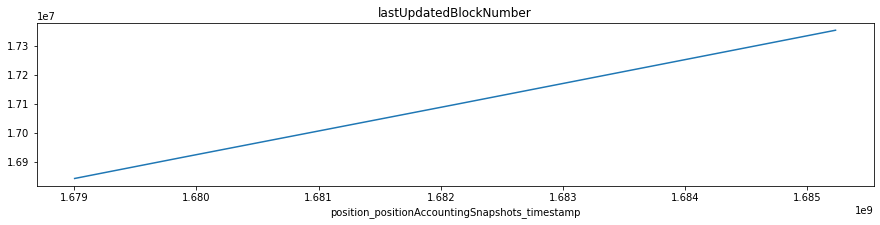

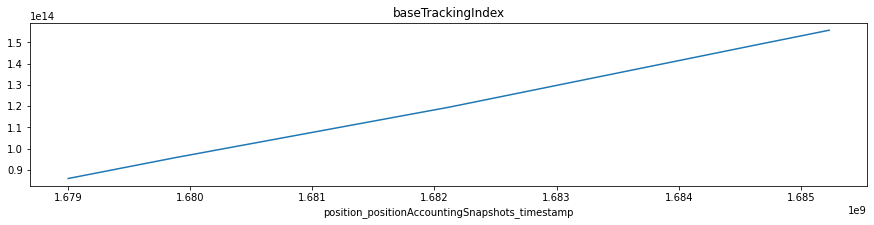

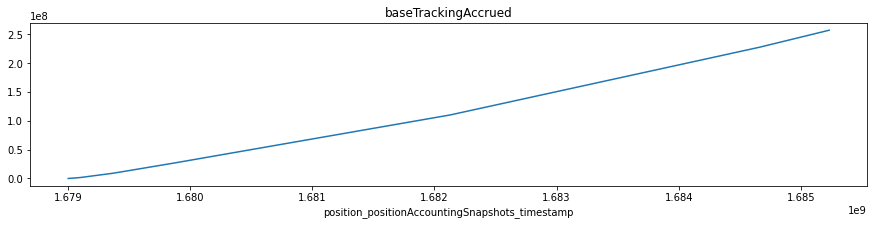

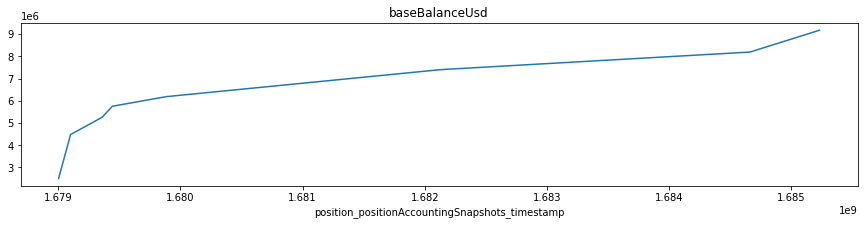

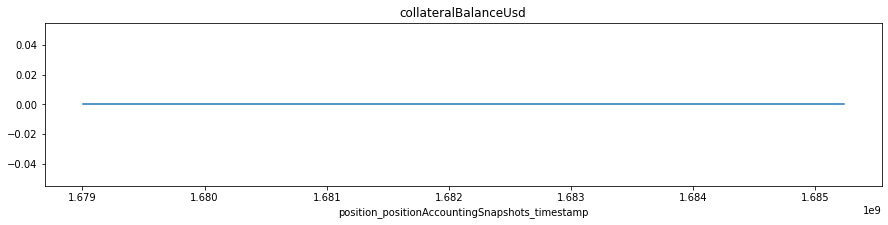

In [89]:
# Position Accounting 

positions = comp_v3.Query.positions(first=3, orderBy=comp_v3.Position.accounting.baseBalance, orderDirection="desc")
positions_df = sg.query_df([positions.id, positions.account.address])

# display(positions_df)

for index, row in positions_df.iterrows():
    position_address = row["positions_account_address"]
    position_id = row["positions_id"]

    snapshots = comp_v3.Query.position(id=position_id).positionAccountingSnapshots(orderBy="timestamp", first=10000)

    snapshots_df = sg.query_df([snapshots.timestamp, snapshots.accounting], concat=True)

    display(snapshots_df)

    plot_all([snapshots_df], ["position_positionAccountingSnapshots_timestamp"], f"{position_address} - Position Accounting") 